In [1]:
import numpy as np
import matplotlib.pyplot as plt

from environments.pricing_env import PricingEnvironment
from learners.greedy import Greedy
from learners.ucb import UCB

from data_generators.basic_generator import BasicDataGenerator
%matplotlib inline 

In [2]:
data_gen = BasicDataGenerator(filename='src/basic002.json')
prices = data_gen.get_prices()
bids = data_gen.get_bids()
margins = data_gen.get_margins()
conv_rates = data_gen.get_conversion_rates(mode='aggregate')
n_clicks = data_gen.get_daily_clicks(mode='aggregate')
costs_per_click = data_gen.get_costs_per_click(mode='aggregate')
aggr_tau = data_gen.get_future_purchases(mode='aggregate')

print(15*'-','DATA', '-'*15)
print(f'{prices=}')
print(f'{bids=}')
print(f'{margins=}')
print(f'{conv_rates=}')
print(f'{costs_per_click=}')
print(f'{n_clicks=}')
print(f'{aggr_tau=}')

sel_bid = 3
print(f'\nSelected bid: {bids[sel_bid]}({sel_bid})')
print(f'Fixed CPC: {costs_per_click[sel_bid]}')
print(f'Fixed num_clicks: {n_clicks[sel_bid]} -> {np.rint(n_clicks[sel_bid]).astype(int)}')

print('\n',15*'-','SIMULATION PARAMS', '-'*15)
T = 365
n_experiments = 100
print(f'Time horizon: {T} days')
print(f'Num. experiments: {n_experiments}')

--------------- DATA ---------------
prices=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids=[0.03, 0.04, 0.07, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]
margins=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
conv_rates=array([0.204, 0.211, 0.205, 0.189, 0.176, 0.152, 0.128, 0.113, 0.097,
       0.09 ])
costs_per_click=array([0.03 , 0.04 , 0.069, 0.097, 0.189, 0.44 , 0.626, 0.796, 1.1  ,
       1.367])
n_clicks=array([ 20.018,  26.03 ,  42.358,  56.468,  91.773, 143.8  , 163.133,
       174.226, 185.61 , 190.621])
aggr_tau=array([2.85 , 2.485, 2.12 , 1.755, 1.39 , 1.025, 0.84 , 0.69 , 0.65 ,
       0.65 ])

Selected bid: 0.1(3)
Fixed CPC: 0.097
Fixed num_clicks: 56.468 -> 56

 --------------- SIMULATION PARAMS ---------------
Time horizon: 365 days
Num. experiments: 100


In [3]:
rewards_per_experiment = {}
rewards_per_experiment['Greedy'] = []
rewards_per_experiment['UCB'] = []

In [4]:
n_arms = len(prices) 
env_params = {
        'n_arms': n_arms,
        'conversion_rates': conv_rates,
        'cost_per_click': costs_per_click[sel_bid],
        'n_clicks': np.rint(n_clicks[sel_bid]).astype(int),
        'margins': margins, 
        'tau': aggr_tau
    }
for e in range(n_experiments):
    # Initialization of the learners to test and their related environment:
    # the list is composed of tuples (Learner, Environment)
    test_instances = [
        ("Greedy", Greedy(n_arms), PricingEnvironment(**env_params)),
        ("UCB", UCB(n_arms), PricingEnvironment(**env_params))
    ]
    
    for t in range(T):
        for name, learner, env in test_instances:
            pulled_arm = learner.pull_arm()
            daily_reward = env.day_round(pulled_arm)
            learner.update(pulled_arm, daily_reward)
            if t % 1 == 0 and name == 'UCB':
                print(f'[exp#{e}] t: {t}\n{name}\n{pulled_arm=}\n{daily_reward=}')
                print(30*'-')

    for learner_name, learner, _ in test_instances:
        rewards_per_experiment[learner_name].append(learner.collected_rewards)

[exp#0] t: 0
UCB
pulled_arm=0
daily_reward=303.8511137076961
------------------------------
[exp#0] t: 1
UCB
pulled_arm=1
daily_reward=928.2086106789463
------------------------------
[exp#0] t: 2
UCB
pulled_arm=2
daily_reward=538.4388521610933
------------------------------
[exp#0] t: 3
UCB
pulled_arm=3
daily_reward=509.8678336507185
------------------------------
[exp#0] t: 4
UCB
pulled_arm=4
daily_reward=437.4182890057755
------------------------------
[exp#0] t: 5
UCB
pulled_arm=5
daily_reward=660.7401013295215
------------------------------
[exp#0] t: 6
UCB
pulled_arm=6
daily_reward=360.00890050509327
------------------------------
[exp#0] t: 7
UCB
pulled_arm=7
daily_reward=181.3736891134307
------------------------------
[exp#0] t: 8
UCB
pulled_arm=8
daily_reward=467.40753617540315
------------------------------
[exp#0] t: 9
UCB
pulled_arm=9
daily_reward=218.19533976813565
------------------------------
[exp#0] t: 10
UCB
pulled_arm=9
daily_reward=163.16722610005664
--------------

[exp#0] t: 103
UCB
pulled_arm=1
daily_reward=722.7869438287955
------------------------------
[exp#0] t: 104
UCB
pulled_arm=1
daily_reward=693.0806558173556
------------------------------
[exp#0] t: 105
UCB
pulled_arm=1
daily_reward=549.32392213042
------------------------------
[exp#0] t: 106
UCB
pulled_arm=1
daily_reward=575.2234879931511
------------------------------
[exp#0] t: 107
UCB
pulled_arm=1
daily_reward=572.0428528075583
------------------------------
[exp#0] t: 108
UCB
pulled_arm=1
daily_reward=804.8661315905395
------------------------------
[exp#0] t: 109
UCB
pulled_arm=1
daily_reward=736.2376337997782
------------------------------
[exp#0] t: 110
UCB
pulled_arm=1
daily_reward=597.5347219844228
------------------------------
[exp#0] t: 111
UCB
pulled_arm=1
daily_reward=298.9802582413343
------------------------------
[exp#0] t: 112
UCB
pulled_arm=1
daily_reward=627.054751074366
------------------------------
[exp#0] t: 113
UCB
pulled_arm=1
daily_reward=569.2519139827444


[exp#0] t: 191
UCB
pulled_arm=1
daily_reward=458.5172030695394
------------------------------
[exp#0] t: 192
UCB
pulled_arm=1
daily_reward=773.6087207780936
------------------------------
[exp#0] t: 193
UCB
pulled_arm=1
daily_reward=467.5598571530962
------------------------------
[exp#0] t: 194
UCB
pulled_arm=1
daily_reward=872.8872980703488
------------------------------
[exp#0] t: 195
UCB
pulled_arm=1
daily_reward=685.4743952220235
------------------------------
[exp#0] t: 196
UCB
pulled_arm=1
daily_reward=735.8708012222809
------------------------------
[exp#0] t: 197
UCB
pulled_arm=1
daily_reward=767.013903188275
------------------------------
[exp#0] t: 198
UCB
pulled_arm=1
daily_reward=496.94713846027037
------------------------------
[exp#0] t: 199
UCB
pulled_arm=1
daily_reward=787.3329019602827
------------------------------
[exp#0] t: 200
UCB
pulled_arm=1
daily_reward=719.6314762362052
------------------------------
[exp#0] t: 201
UCB
pulled_arm=1
daily_reward=689.95069617365

daily_reward=510.7853292217725
------------------------------
[exp#0] t: 292
UCB
pulled_arm=1
daily_reward=423.1645779572268
------------------------------
[exp#0] t: 293
UCB
pulled_arm=1
daily_reward=860.8163164463732
------------------------------
[exp#0] t: 294
UCB
pulled_arm=1
daily_reward=564.9292234602126
------------------------------
[exp#0] t: 295
UCB
pulled_arm=1
daily_reward=528.9756251098418
------------------------------
[exp#0] t: 296
UCB
pulled_arm=1
daily_reward=886.6277970842098
------------------------------
[exp#0] t: 297
UCB
pulled_arm=1
daily_reward=789.6598740491783
------------------------------
[exp#0] t: 298
UCB
pulled_arm=1
daily_reward=650.6979088545673
------------------------------
[exp#0] t: 299
UCB
pulled_arm=1
daily_reward=656.0312812945468
------------------------------
[exp#0] t: 300
UCB
pulled_arm=1
daily_reward=527.5708901950495
------------------------------
[exp#0] t: 301
UCB
pulled_arm=1
daily_reward=647.0716958463422
-----------------------------

daily_reward=725.9145480045697
------------------------------
[exp#1] t: 34
UCB
pulled_arm=0
daily_reward=899.7421917120201
------------------------------
[exp#1] t: 35
UCB
pulled_arm=0
daily_reward=600.8523011130874
------------------------------
[exp#1] t: 36
UCB
pulled_arm=0
daily_reward=869.9548577303665
------------------------------
[exp#1] t: 37
UCB
pulled_arm=0
daily_reward=538.3891481271198
------------------------------
[exp#1] t: 38
UCB
pulled_arm=0
daily_reward=705.1663323572056
------------------------------
[exp#1] t: 39
UCB
pulled_arm=0
daily_reward=646.7110976546717
------------------------------
[exp#1] t: 40
UCB
pulled_arm=0
daily_reward=767.1123121256186
------------------------------
[exp#1] t: 41
UCB
pulled_arm=0
daily_reward=1109.334250419738
------------------------------
[exp#1] t: 42
UCB
pulled_arm=0
daily_reward=572.4435551073242
------------------------------
[exp#1] t: 43
UCB
pulled_arm=0
daily_reward=745.4519451913022
------------------------------
[exp#1] 

daily_reward=491.08938912774875
------------------------------
[exp#1] t: 129
UCB
pulled_arm=0
daily_reward=575.2043205091729
------------------------------
[exp#1] t: 130
UCB
pulled_arm=0
daily_reward=889.2939161217746
------------------------------
[exp#1] t: 131
UCB
pulled_arm=0
daily_reward=766.6348989128287
------------------------------
[exp#1] t: 132
UCB
pulled_arm=0
daily_reward=762.7110331302083
------------------------------
[exp#1] t: 133
UCB
pulled_arm=0
daily_reward=546.3017560163903
------------------------------
[exp#1] t: 134
UCB
pulled_arm=0
daily_reward=655.8025370138427
------------------------------
[exp#1] t: 135
UCB
pulled_arm=0
daily_reward=452.9309826191536
------------------------------
[exp#1] t: 136
UCB
pulled_arm=0
daily_reward=744.767728649942
------------------------------
[exp#1] t: 137
UCB
pulled_arm=0
daily_reward=642.0074288372448
------------------------------
[exp#1] t: 138
UCB
pulled_arm=0
daily_reward=663.3086927871884
-----------------------------

daily_reward=829.5800595286248
------------------------------
[exp#1] t: 224
UCB
pulled_arm=0
daily_reward=1092.3727951575381
------------------------------
[exp#1] t: 225
UCB
pulled_arm=0
daily_reward=586.3571697025905
------------------------------
[exp#1] t: 226
UCB
pulled_arm=0
daily_reward=743.7406607471594
------------------------------
[exp#1] t: 227
UCB
pulled_arm=0
daily_reward=461.87846166728133
------------------------------
[exp#1] t: 228
UCB
pulled_arm=0
daily_reward=651.8138323919414
------------------------------
[exp#1] t: 229
UCB
pulled_arm=0
daily_reward=679.0289086236694
------------------------------
[exp#1] t: 230
UCB
pulled_arm=0
daily_reward=813.0766658359408
------------------------------
[exp#1] t: 231
UCB
pulled_arm=0
daily_reward=405.64051936751207
------------------------------
[exp#1] t: 232
UCB
pulled_arm=0
daily_reward=619.3727194790538
------------------------------
[exp#1] t: 233
UCB
pulled_arm=0
daily_reward=621.4364942727068
--------------------------

[exp#1] t: 312
UCB
pulled_arm=0
daily_reward=546.5668041914018
------------------------------
[exp#1] t: 313
UCB
pulled_arm=0
daily_reward=457.9798607746494
------------------------------
[exp#1] t: 314
UCB
pulled_arm=0
daily_reward=647.997052582094
------------------------------
[exp#1] t: 315
UCB
pulled_arm=0
daily_reward=633.6874105697568
------------------------------
[exp#1] t: 316
UCB
pulled_arm=0
daily_reward=431.2374117967436
------------------------------
[exp#1] t: 317
UCB
pulled_arm=0
daily_reward=533.7702694325808
------------------------------
[exp#1] t: 318
UCB
pulled_arm=0
daily_reward=598.3746679425592
------------------------------
[exp#1] t: 319
UCB
pulled_arm=0
daily_reward=559.411083256715
------------------------------
[exp#1] t: 320
UCB
pulled_arm=0
daily_reward=813.573910980271
------------------------------
[exp#1] t: 321
UCB
pulled_arm=0
daily_reward=522.1158811040831
------------------------------
[exp#1] t: 322
UCB
pulled_arm=0
daily_reward=472.9598148503845


daily_reward=188.69968191740412
------------------------------
[exp#2] t: 88
UCB
pulled_arm=0
daily_reward=708.8658532961049
------------------------------
[exp#2] t: 89
UCB
pulled_arm=0
daily_reward=417.605798026295
------------------------------
[exp#2] t: 90
UCB
pulled_arm=0
daily_reward=728.8031236645329
------------------------------
[exp#2] t: 91
UCB
pulled_arm=0
daily_reward=978.917969750689
------------------------------
[exp#2] t: 92
UCB
pulled_arm=0
daily_reward=1040.803101706705
------------------------------
[exp#2] t: 93
UCB
pulled_arm=0
daily_reward=779.2042649972742
------------------------------
[exp#2] t: 94
UCB
pulled_arm=0
daily_reward=606.903147486377
------------------------------
[exp#2] t: 95
UCB
pulled_arm=0
daily_reward=505.7065878889583
------------------------------
[exp#2] t: 96
UCB
pulled_arm=0
daily_reward=941.059753149894
------------------------------
[exp#2] t: 97
UCB
pulled_arm=0
daily_reward=799.3897520369828
------------------------------
[exp#2] t: 

daily_reward=605.5555051210143
------------------------------
[exp#2] t: 181
UCB
pulled_arm=0
daily_reward=502.9014462249796
------------------------------
[exp#2] t: 182
UCB
pulled_arm=0
daily_reward=470.29677902769697
------------------------------
[exp#2] t: 183
UCB
pulled_arm=0
daily_reward=542.4643244501442
------------------------------
[exp#2] t: 184
UCB
pulled_arm=0
daily_reward=651.4991826326185
------------------------------
[exp#2] t: 185
UCB
pulled_arm=0
daily_reward=690.8534834400837
------------------------------
[exp#2] t: 186
UCB
pulled_arm=0
daily_reward=182.00057571027358
------------------------------
[exp#2] t: 187
UCB
pulled_arm=0
daily_reward=861.7536902498316
------------------------------
[exp#2] t: 188
UCB
pulled_arm=0
daily_reward=658.1422955919454
------------------------------
[exp#2] t: 189
UCB
pulled_arm=0
daily_reward=759.7868351144559
------------------------------
[exp#2] t: 190
UCB
pulled_arm=0
daily_reward=412.2053933055821
---------------------------

daily_reward=463.4447624599531
------------------------------
[exp#2] t: 286
UCB
pulled_arm=0
daily_reward=820.060098473878
------------------------------
[exp#2] t: 287
UCB
pulled_arm=0
daily_reward=742.0262478126374
------------------------------
[exp#2] t: 288
UCB
pulled_arm=0
daily_reward=425.76465377664863
------------------------------
[exp#2] t: 289
UCB
pulled_arm=0
daily_reward=624.5136805149326
------------------------------
[exp#2] t: 290
UCB
pulled_arm=0
daily_reward=450.08552784703136
------------------------------
[exp#2] t: 291
UCB
pulled_arm=0
daily_reward=818.5995393243247
------------------------------
[exp#2] t: 292
UCB
pulled_arm=0
daily_reward=859.6707043430112
------------------------------
[exp#2] t: 293
UCB
pulled_arm=0
daily_reward=593.8080078000769
------------------------------
[exp#2] t: 294
UCB
pulled_arm=0
daily_reward=874.7175694492972
------------------------------
[exp#2] t: 295
UCB
pulled_arm=0
daily_reward=546.359732550403
-----------------------------

daily_reward=509.8078871323964
------------------------------
[exp#3] t: 41
UCB
pulled_arm=0
daily_reward=670.0171931869215
------------------------------
[exp#3] t: 42
UCB
pulled_arm=0
daily_reward=1179.4869441953335
------------------------------
[exp#3] t: 43
UCB
pulled_arm=0
daily_reward=160.00027753489024
------------------------------
[exp#3] t: 44
UCB
pulled_arm=0
daily_reward=364.8258396830226
------------------------------
[exp#3] t: 45
UCB
pulled_arm=0
daily_reward=1134.5993768629337
------------------------------
[exp#3] t: 46
UCB
pulled_arm=0
daily_reward=689.7391233918465
------------------------------
[exp#3] t: 47
UCB
pulled_arm=0
daily_reward=893.3122078926494
------------------------------
[exp#3] t: 48
UCB
pulled_arm=0
daily_reward=557.03968138078
------------------------------
[exp#3] t: 49
UCB
pulled_arm=0
daily_reward=614.8548453373053
------------------------------
[exp#3] t: 50
UCB
pulled_arm=0
daily_reward=656.3835343256253
------------------------------
[exp#3]

daily_reward=566.6074939409273
------------------------------
[exp#3] t: 169
UCB
pulled_arm=0
daily_reward=512.0325544817994
------------------------------
[exp#3] t: 170
UCB
pulled_arm=0
daily_reward=536.813036953583
------------------------------
[exp#3] t: 171
UCB
pulled_arm=0
daily_reward=360.43233431635565
------------------------------
[exp#3] t: 172
UCB
pulled_arm=0
daily_reward=774.3475455343064
------------------------------
[exp#3] t: 173
UCB
pulled_arm=0
daily_reward=894.0352473841522
------------------------------
[exp#3] t: 174
UCB
pulled_arm=0
daily_reward=1046.8517508955279
------------------------------
[exp#3] t: 175
UCB
pulled_arm=0
daily_reward=597.4994894719375
------------------------------
[exp#3] t: 176
UCB
pulled_arm=0
daily_reward=932.2918970284816
------------------------------
[exp#3] t: 177
UCB
pulled_arm=0
daily_reward=531.8221902524718
------------------------------
[exp#3] t: 178
UCB
pulled_arm=0
daily_reward=662.8660206060895
----------------------------

daily_reward=750.1913223890853
------------------------------
[exp#3] t: 297
UCB
pulled_arm=0
daily_reward=744.3424616207898
------------------------------
[exp#3] t: 298
UCB
pulled_arm=0
daily_reward=414.5338400030472
------------------------------
[exp#3] t: 299
UCB
pulled_arm=0
daily_reward=269.3771354031111
------------------------------
[exp#3] t: 300
UCB
pulled_arm=0
daily_reward=694.6405232612392
------------------------------
[exp#3] t: 301
UCB
pulled_arm=0
daily_reward=783.3736590523927
------------------------------
[exp#3] t: 302
UCB
pulled_arm=0
daily_reward=931.9111373157383
------------------------------
[exp#3] t: 303
UCB
pulled_arm=0
daily_reward=458.4930674948737
------------------------------
[exp#3] t: 304
UCB
pulled_arm=0
daily_reward=606.3477215547275
------------------------------
[exp#3] t: 305
UCB
pulled_arm=0
daily_reward=679.6250437277056
------------------------------
[exp#3] t: 306
UCB
pulled_arm=0
daily_reward=683.0849893904399
-----------------------------

daily_reward=952.7479977891965
------------------------------
[exp#4] t: 65
UCB
pulled_arm=0
daily_reward=621.9186780146781
------------------------------
[exp#4] t: 66
UCB
pulled_arm=0
daily_reward=637.4652835876485
------------------------------
[exp#4] t: 67
UCB
pulled_arm=0
daily_reward=590.2352761227044
------------------------------
[exp#4] t: 68
UCB
pulled_arm=0
daily_reward=714.1497549794481
------------------------------
[exp#4] t: 69
UCB
pulled_arm=0
daily_reward=669.5501862561416
------------------------------
[exp#4] t: 70
UCB
pulled_arm=0
daily_reward=712.0293951787398
------------------------------
[exp#4] t: 71
UCB
pulled_arm=0
daily_reward=658.3789743180421
------------------------------
[exp#4] t: 72
UCB
pulled_arm=0
daily_reward=625.8566722576568
------------------------------
[exp#4] t: 73
UCB
pulled_arm=0
daily_reward=449.0411842957942
------------------------------
[exp#4] t: 74
UCB
pulled_arm=0
daily_reward=942.5771600350065
------------------------------
[exp#4] 

daily_reward=948.7641615886813
------------------------------
[exp#4] t: 156
UCB
pulled_arm=0
daily_reward=460.63464403322473
------------------------------
[exp#4] t: 157
UCB
pulled_arm=0
daily_reward=579.4726153822802
------------------------------
[exp#4] t: 158
UCB
pulled_arm=0
daily_reward=774.7144142871832
------------------------------
[exp#4] t: 159
UCB
pulled_arm=0
daily_reward=619.4164295621155
------------------------------
[exp#4] t: 160
UCB
pulled_arm=0
daily_reward=644.4291967609427
------------------------------
[exp#4] t: 161
UCB
pulled_arm=0
daily_reward=530.0719413031622
------------------------------
[exp#4] t: 162
UCB
pulled_arm=0
daily_reward=608.5061430417354
------------------------------
[exp#4] t: 163
UCB
pulled_arm=0
daily_reward=720.9216491994882
------------------------------
[exp#4] t: 164
UCB
pulled_arm=0
daily_reward=573.332703403442
------------------------------
[exp#4] t: 165
UCB
pulled_arm=0
daily_reward=728.3131299800034
-----------------------------

daily_reward=534.3646221980199
------------------------------
[exp#4] t: 253
UCB
pulled_arm=0
daily_reward=247.17640588945193
------------------------------
[exp#4] t: 254
UCB
pulled_arm=0
daily_reward=275.42958302385864
------------------------------
[exp#4] t: 255
UCB
pulled_arm=0
daily_reward=649.9812848708448
------------------------------
[exp#4] t: 256
UCB
pulled_arm=0
daily_reward=685.8705571293949
------------------------------
[exp#4] t: 257
UCB
pulled_arm=0
daily_reward=558.8993766335125
------------------------------
[exp#4] t: 258
UCB
pulled_arm=0
daily_reward=679.0110137685858
------------------------------
[exp#4] t: 259
UCB
pulled_arm=0
daily_reward=648.2799438290989
------------------------------
[exp#4] t: 260
UCB
pulled_arm=0
daily_reward=559.3701585982852
------------------------------
[exp#4] t: 261
UCB
pulled_arm=0
daily_reward=388.4615713281255
------------------------------
[exp#4] t: 262
UCB
pulled_arm=0
daily_reward=531.7262724135668
---------------------------

daily_reward=535.388483928411
------------------------------
[exp#4] t: 352
UCB
pulled_arm=0
daily_reward=489.91395838499835
------------------------------
[exp#4] t: 353
UCB
pulled_arm=0
daily_reward=544.4479744307419
------------------------------
[exp#4] t: 354
UCB
pulled_arm=0
daily_reward=857.7651378429766
------------------------------
[exp#4] t: 355
UCB
pulled_arm=0
daily_reward=767.3579377101664
------------------------------
[exp#4] t: 356
UCB
pulled_arm=0
daily_reward=912.0174535743239
------------------------------
[exp#4] t: 357
UCB
pulled_arm=0
daily_reward=829.005888195753
------------------------------
[exp#4] t: 358
UCB
pulled_arm=0
daily_reward=746.0094422661483
------------------------------
[exp#4] t: 359
UCB
pulled_arm=0
daily_reward=866.1263910366981
------------------------------
[exp#4] t: 360
UCB
pulled_arm=0
daily_reward=473.3234313584894
------------------------------
[exp#4] t: 361
UCB
pulled_arm=0
daily_reward=524.6056227785975
------------------------------

daily_reward=684.3070974633329
------------------------------
[exp#5] t: 78
UCB
pulled_arm=0
daily_reward=747.9173225696143
------------------------------
[exp#5] t: 79
UCB
pulled_arm=0
daily_reward=680.1146761063915
------------------------------
[exp#5] t: 80
UCB
pulled_arm=0
daily_reward=466.44713394416146
------------------------------
[exp#5] t: 81
UCB
pulled_arm=0
daily_reward=531.5526234970231
------------------------------
[exp#5] t: 82
UCB
pulled_arm=0
daily_reward=891.8895094220958
------------------------------
[exp#5] t: 83
UCB
pulled_arm=0
daily_reward=626.4847122792135
------------------------------
[exp#5] t: 84
UCB
pulled_arm=0
daily_reward=776.7236038298026
------------------------------
[exp#5] t: 85
UCB
pulled_arm=0
daily_reward=516.3156808961544
------------------------------
[exp#5] t: 86
UCB
pulled_arm=0
daily_reward=498.0823977756434
------------------------------
[exp#5] t: 87
UCB
pulled_arm=0
daily_reward=332.9388862450177
------------------------------
[exp#5]

daily_reward=693.2240963362096
------------------------------
[exp#5] t: 168
UCB
pulled_arm=0
daily_reward=740.8187240310226
------------------------------
[exp#5] t: 169
UCB
pulled_arm=0
daily_reward=849.148231036366
------------------------------
[exp#5] t: 170
UCB
pulled_arm=0
daily_reward=702.4822790127339
------------------------------
[exp#5] t: 171
UCB
pulled_arm=0
daily_reward=457.00415349797254
------------------------------
[exp#5] t: 172
UCB
pulled_arm=0
daily_reward=810.6837250865874
------------------------------
[exp#5] t: 173
UCB
pulled_arm=0
daily_reward=659.8652410085958
------------------------------
[exp#5] t: 174
UCB
pulled_arm=0
daily_reward=408.7265004578906
------------------------------
[exp#5] t: 175
UCB
pulled_arm=0
daily_reward=898.9334527174867
------------------------------
[exp#5] t: 176
UCB
pulled_arm=0
daily_reward=388.2501618417738
------------------------------
[exp#5] t: 177
UCB
pulled_arm=0
daily_reward=517.5499010610167
-----------------------------

daily_reward=615.2331010302149
------------------------------
[exp#5] t: 255
UCB
pulled_arm=0
daily_reward=780.5432888807951
------------------------------
[exp#5] t: 256
UCB
pulled_arm=0
daily_reward=743.047477263094
------------------------------
[exp#5] t: 257
UCB
pulled_arm=0
daily_reward=863.8353820356554
------------------------------
[exp#5] t: 258
UCB
pulled_arm=0
daily_reward=569.1598134214646
------------------------------
[exp#5] t: 259
UCB
pulled_arm=0
daily_reward=480.9783612391774
------------------------------
[exp#5] t: 260
UCB
pulled_arm=0
daily_reward=497.16398273815764
------------------------------
[exp#5] t: 261
UCB
pulled_arm=0
daily_reward=568.4050089469495
------------------------------
[exp#5] t: 262
UCB
pulled_arm=0
daily_reward=634.5744517568386
------------------------------
[exp#5] t: 263
UCB
pulled_arm=0
daily_reward=705.1677665277787
------------------------------
[exp#5] t: 264
UCB
pulled_arm=0
daily_reward=732.731761176772
------------------------------

daily_reward=580.8418968630392
------------------------------
[exp#5] t: 350
UCB
pulled_arm=0
daily_reward=644.3271820426701
------------------------------
[exp#5] t: 351
UCB
pulled_arm=0
daily_reward=631.1392827584041
------------------------------
[exp#5] t: 352
UCB
pulled_arm=0
daily_reward=510.45590858817434
------------------------------
[exp#5] t: 353
UCB
pulled_arm=0
daily_reward=890.8739252518877
------------------------------
[exp#5] t: 354
UCB
pulled_arm=0
daily_reward=808.939871826895
------------------------------
[exp#5] t: 355
UCB
pulled_arm=0
daily_reward=503.2148114496506
------------------------------
[exp#5] t: 356
UCB
pulled_arm=0
daily_reward=638.0433066118565
------------------------------
[exp#5] t: 357
UCB
pulled_arm=0
daily_reward=829.8640302478847
------------------------------
[exp#5] t: 358
UCB
pulled_arm=0
daily_reward=682.0332263316559
------------------------------
[exp#5] t: 359
UCB
pulled_arm=0
daily_reward=719.2009474838098
-----------------------------

daily_reward=675.6204457275174
------------------------------
[exp#6] t: 76
UCB
pulled_arm=0
daily_reward=472.80985517816777
------------------------------
[exp#6] t: 77
UCB
pulled_arm=0
daily_reward=744.7918984749692
------------------------------
[exp#6] t: 78
UCB
pulled_arm=0
daily_reward=680.0570806768528
------------------------------
[exp#6] t: 79
UCB
pulled_arm=0
daily_reward=774.688199498444
------------------------------
[exp#6] t: 80
UCB
pulled_arm=0
daily_reward=424.81752837353827
------------------------------
[exp#6] t: 81
UCB
pulled_arm=0
daily_reward=655.5969990598089
------------------------------
[exp#6] t: 82
UCB
pulled_arm=0
daily_reward=662.983345457832
------------------------------
[exp#6] t: 83
UCB
pulled_arm=0
daily_reward=857.689466202336
------------------------------
[exp#6] t: 84
UCB
pulled_arm=0
daily_reward=765.9978180893704
------------------------------
[exp#6] t: 85
UCB
pulled_arm=0
daily_reward=475.12141020229797
------------------------------
[exp#6] 

daily_reward=648.9327832937113
------------------------------
[exp#6] t: 213
UCB
pulled_arm=0
daily_reward=676.6740482935252
------------------------------
[exp#6] t: 214
UCB
pulled_arm=0
daily_reward=587.8902140519438
------------------------------
[exp#6] t: 215
UCB
pulled_arm=0
daily_reward=778.4363460156776
------------------------------
[exp#6] t: 216
UCB
pulled_arm=0
daily_reward=572.9433588293923
------------------------------
[exp#6] t: 217
UCB
pulled_arm=0
daily_reward=748.1685098133489
------------------------------
[exp#6] t: 218
UCB
pulled_arm=0
daily_reward=962.2679593934322
------------------------------
[exp#6] t: 219
UCB
pulled_arm=0
daily_reward=644.5542063672426
------------------------------
[exp#6] t: 220
UCB
pulled_arm=0
daily_reward=711.0673607435726
------------------------------
[exp#6] t: 221
UCB
pulled_arm=0
daily_reward=781.5054741866961
------------------------------
[exp#6] t: 222
UCB
pulled_arm=0
daily_reward=680.9959242069702
-----------------------------

daily_reward=612.1569704305565
------------------------------
[exp#6] t: 307
UCB
pulled_arm=0
daily_reward=665.1442741000742
------------------------------
[exp#6] t: 308
UCB
pulled_arm=0
daily_reward=806.0964677207614
------------------------------
[exp#6] t: 309
UCB
pulled_arm=0
daily_reward=388.189877201062
------------------------------
[exp#6] t: 310
UCB
pulled_arm=0
daily_reward=503.8711003760965
------------------------------
[exp#6] t: 311
UCB
pulled_arm=0
daily_reward=392.0040088305582
------------------------------
[exp#6] t: 312
UCB
pulled_arm=0
daily_reward=948.3374630361675
------------------------------
[exp#6] t: 313
UCB
pulled_arm=0
daily_reward=651.3483257541478
------------------------------
[exp#6] t: 314
UCB
pulled_arm=0
daily_reward=560.7759908679617
------------------------------
[exp#6] t: 315
UCB
pulled_arm=0
daily_reward=649.8674175453076
------------------------------
[exp#6] t: 316
UCB
pulled_arm=0
daily_reward=293.0223494191131
------------------------------

daily_reward=612.4993551664107
------------------------------
[exp#7] t: 39
UCB
pulled_arm=0
daily_reward=576.7630485511634
------------------------------
[exp#7] t: 40
UCB
pulled_arm=0
daily_reward=753.8138909270028
------------------------------
[exp#7] t: 41
UCB
pulled_arm=0
daily_reward=770.2209199587304
------------------------------
[exp#7] t: 42
UCB
pulled_arm=0
daily_reward=941.1271996911146
------------------------------
[exp#7] t: 43
UCB
pulled_arm=0
daily_reward=712.2774567585939
------------------------------
[exp#7] t: 44
UCB
pulled_arm=0
daily_reward=733.708488331067
------------------------------
[exp#7] t: 45
UCB
pulled_arm=0
daily_reward=569.1897431873815
------------------------------
[exp#7] t: 46
UCB
pulled_arm=0
daily_reward=479.06009989970556
------------------------------
[exp#7] t: 47
UCB
pulled_arm=0
daily_reward=631.0623907171291
------------------------------
[exp#7] t: 48
UCB
pulled_arm=0
daily_reward=593.0496266613118
------------------------------
[exp#7] 

daily_reward=653.671102537751
------------------------------
[exp#7] t: 164
UCB
pulled_arm=0
daily_reward=548.5963292550057
------------------------------
[exp#7] t: 165
UCB
pulled_arm=0
daily_reward=961.1623154557825
------------------------------
[exp#7] t: 166
UCB
pulled_arm=0
daily_reward=819.0966299443751
------------------------------
[exp#7] t: 167
UCB
pulled_arm=0
daily_reward=390.6956563473818
------------------------------
[exp#7] t: 168
UCB
pulled_arm=0
daily_reward=299.34250256909075
------------------------------
[exp#7] t: 169
UCB
pulled_arm=0
daily_reward=590.765636671832
------------------------------
[exp#7] t: 170
UCB
pulled_arm=0
daily_reward=613.5070383609984
------------------------------
[exp#7] t: 171
UCB
pulled_arm=0
daily_reward=581.3785437565055
------------------------------
[exp#7] t: 172
UCB
pulled_arm=0
daily_reward=789.0917577838236
------------------------------
[exp#7] t: 173
UCB
pulled_arm=0
daily_reward=888.6173912098764
------------------------------

daily_reward=646.815865953406
------------------------------
[exp#7] t: 299
UCB
pulled_arm=0
daily_reward=736.5682554715095
------------------------------
[exp#7] t: 300
UCB
pulled_arm=0
daily_reward=483.31001673965613
------------------------------
[exp#7] t: 301
UCB
pulled_arm=0
daily_reward=896.0327541459745
------------------------------
[exp#7] t: 302
UCB
pulled_arm=0
daily_reward=1038.6946250930032
------------------------------
[exp#7] t: 303
UCB
pulled_arm=0
daily_reward=672.3961108751539
------------------------------
[exp#7] t: 304
UCB
pulled_arm=0
daily_reward=916.7721970045554
------------------------------
[exp#7] t: 305
UCB
pulled_arm=0
daily_reward=736.6669253373143
------------------------------
[exp#7] t: 306
UCB
pulled_arm=0
daily_reward=600.4122421818447
------------------------------
[exp#7] t: 307
UCB
pulled_arm=0
daily_reward=347.24827194487466
------------------------------
[exp#7] t: 308
UCB
pulled_arm=0
daily_reward=666.0838549170027
---------------------------

daily_reward=802.2894961160875
------------------------------
[exp#8] t: 30
UCB
pulled_arm=0
daily_reward=475.02336408507085
------------------------------
[exp#8] t: 31
UCB
pulled_arm=0
daily_reward=778.2913579220783
------------------------------
[exp#8] t: 32
UCB
pulled_arm=0
daily_reward=383.56636442110135
------------------------------
[exp#8] t: 33
UCB
pulled_arm=0
daily_reward=480.2562077486574
------------------------------
[exp#8] t: 34
UCB
pulled_arm=0
daily_reward=368.69011897763176
------------------------------
[exp#8] t: 35
UCB
pulled_arm=0
daily_reward=404.4597963099461
------------------------------
[exp#8] t: 36
UCB
pulled_arm=0
daily_reward=489.3319409359119
------------------------------
[exp#8] t: 37
UCB
pulled_arm=0
daily_reward=453.6745981361848
------------------------------
[exp#8] t: 38
UCB
pulled_arm=0
daily_reward=382.01807794871485
------------------------------
[exp#8] t: 39
UCB
pulled_arm=0
daily_reward=365.1882335152037
------------------------------
[exp

daily_reward=792.8658051252003
------------------------------
[exp#8] t: 121
UCB
pulled_arm=0
daily_reward=570.5310040934162
------------------------------
[exp#8] t: 122
UCB
pulled_arm=0
daily_reward=707.7528763879282
------------------------------
[exp#8] t: 123
UCB
pulled_arm=0
daily_reward=506.1093332111646
------------------------------
[exp#8] t: 124
UCB
pulled_arm=0
daily_reward=484.60765820895534
------------------------------
[exp#8] t: 125
UCB
pulled_arm=0
daily_reward=564.3410038950917
------------------------------
[exp#8] t: 126
UCB
pulled_arm=0
daily_reward=1010.889102414731
------------------------------
[exp#8] t: 127
UCB
pulled_arm=0
daily_reward=566.36079435995
------------------------------
[exp#8] t: 128
UCB
pulled_arm=0
daily_reward=587.4151774241537
------------------------------
[exp#8] t: 129
UCB
pulled_arm=0
daily_reward=789.4419098785469
------------------------------
[exp#8] t: 130
UCB
pulled_arm=0
daily_reward=697.2024569692803
------------------------------

daily_reward=759.1510922343356
------------------------------
[exp#8] t: 216
UCB
pulled_arm=0
daily_reward=752.8470369552706
------------------------------
[exp#8] t: 217
UCB
pulled_arm=0
daily_reward=440.00306061557626
------------------------------
[exp#8] t: 218
UCB
pulled_arm=0
daily_reward=572.8096953387077
------------------------------
[exp#8] t: 219
UCB
pulled_arm=0
daily_reward=712.1513857441976
------------------------------
[exp#8] t: 220
UCB
pulled_arm=0
daily_reward=894.5792147004452
------------------------------
[exp#8] t: 221
UCB
pulled_arm=0
daily_reward=777.2204552320868
------------------------------
[exp#8] t: 222
UCB
pulled_arm=0
daily_reward=511.05264742303854
------------------------------
[exp#8] t: 223
UCB
pulled_arm=0
daily_reward=709.800078931131
------------------------------
[exp#8] t: 224
UCB
pulled_arm=0
daily_reward=529.3768430844774
------------------------------
[exp#8] t: 225
UCB
pulled_arm=0
daily_reward=969.5769498243983
----------------------------

daily_reward=683.3486711600225
------------------------------
[exp#8] t: 342
UCB
pulled_arm=0
daily_reward=730.6229369768241
------------------------------
[exp#8] t: 343
UCB
pulled_arm=0
daily_reward=520.0865637521683
------------------------------
[exp#8] t: 344
UCB
pulled_arm=0
daily_reward=531.5480642801879
------------------------------
[exp#8] t: 345
UCB
pulled_arm=0
daily_reward=734.2005212703668
------------------------------
[exp#8] t: 346
UCB
pulled_arm=0
daily_reward=381.638800097695
------------------------------
[exp#8] t: 347
UCB
pulled_arm=0
daily_reward=379.9591628078756
------------------------------
[exp#8] t: 348
UCB
pulled_arm=0
daily_reward=647.4944903716038
------------------------------
[exp#8] t: 349
UCB
pulled_arm=0
daily_reward=822.9794672178815
------------------------------
[exp#8] t: 350
UCB
pulled_arm=0
daily_reward=608.7088943412623
------------------------------
[exp#8] t: 351
UCB
pulled_arm=0
daily_reward=909.1764444635917
------------------------------

daily_reward=1193.5203335712008
------------------------------
[exp#9] t: 69
UCB
pulled_arm=0
daily_reward=255.46044598638025
------------------------------
[exp#9] t: 70
UCB
pulled_arm=0
daily_reward=563.8884496350222
------------------------------
[exp#9] t: 71
UCB
pulled_arm=0
daily_reward=563.728152026353
------------------------------
[exp#9] t: 72
UCB
pulled_arm=0
daily_reward=603.3814894424689
------------------------------
[exp#9] t: 73
UCB
pulled_arm=0
daily_reward=961.535815744898
------------------------------
[exp#9] t: 74
UCB
pulled_arm=0
daily_reward=488.13706527957095
------------------------------
[exp#9] t: 75
UCB
pulled_arm=0
daily_reward=667.1242385531614
------------------------------
[exp#9] t: 76
UCB
pulled_arm=0
daily_reward=719.9046487206089
------------------------------
[exp#9] t: 77
UCB
pulled_arm=0
daily_reward=744.3978398208549
------------------------------
[exp#9] t: 78
UCB
pulled_arm=0
daily_reward=645.6795603459968
------------------------------
[exp#9]

daily_reward=833.4891799151719
------------------------------
[exp#9] t: 205
UCB
pulled_arm=0
daily_reward=751.5454513237921
------------------------------
[exp#9] t: 206
UCB
pulled_arm=0
daily_reward=408.78062546499336
------------------------------
[exp#9] t: 207
UCB
pulled_arm=0
daily_reward=290.24044866079925
------------------------------
[exp#9] t: 208
UCB
pulled_arm=0
daily_reward=482.91184814415317
------------------------------
[exp#9] t: 209
UCB
pulled_arm=0
daily_reward=475.5342830118716
------------------------------
[exp#9] t: 210
UCB
pulled_arm=0
daily_reward=482.7715092341426
------------------------------
[exp#9] t: 211
UCB
pulled_arm=0
daily_reward=845.1557348688923
------------------------------
[exp#9] t: 212
UCB
pulled_arm=0
daily_reward=499.3049432083974
------------------------------
[exp#9] t: 213
UCB
pulled_arm=0
daily_reward=684.2213703585503
------------------------------
[exp#9] t: 214
UCB
pulled_arm=0
daily_reward=687.1393330321371
--------------------------

daily_reward=660.2034839668693
------------------------------
[exp#9] t: 296
UCB
pulled_arm=0
daily_reward=701.206029615946
------------------------------
[exp#9] t: 297
UCB
pulled_arm=0
daily_reward=1168.77334428624
------------------------------
[exp#9] t: 298
UCB
pulled_arm=0
daily_reward=568.6432575209624
------------------------------
[exp#9] t: 299
UCB
pulled_arm=0
daily_reward=560.9302565609022
------------------------------
[exp#9] t: 300
UCB
pulled_arm=0
daily_reward=936.4281039351094
------------------------------
[exp#9] t: 301
UCB
pulled_arm=0
daily_reward=709.2663958979633
------------------------------
[exp#9] t: 302
UCB
pulled_arm=0
daily_reward=751.4485182665172
------------------------------
[exp#9] t: 303
UCB
pulled_arm=0
daily_reward=1008.101538929752
------------------------------
[exp#9] t: 304
UCB
pulled_arm=0
daily_reward=794.327539664296
------------------------------
[exp#9] t: 305
UCB
pulled_arm=0
daily_reward=520.5592074577023
------------------------------
[

daily_reward=716.7285660004281
------------------------------
[exp#10] t: 19
UCB
pulled_arm=0
daily_reward=744.265881444665
------------------------------
[exp#10] t: 20
UCB
pulled_arm=0
daily_reward=657.9611169097388
------------------------------
[exp#10] t: 21
UCB
pulled_arm=0
daily_reward=787.574172421035
------------------------------
[exp#10] t: 22
UCB
pulled_arm=0
daily_reward=851.7945419590446
------------------------------
[exp#10] t: 23
UCB
pulled_arm=0
daily_reward=761.3537367330077
------------------------------
[exp#10] t: 24
UCB
pulled_arm=0
daily_reward=371.86045333636565
------------------------------
[exp#10] t: 25
UCB
pulled_arm=0
daily_reward=374.29938753034946
------------------------------
[exp#10] t: 26
UCB
pulled_arm=0
daily_reward=1247.6570112491336
------------------------------
[exp#10] t: 27
UCB
pulled_arm=0
daily_reward=668.8537207606935
------------------------------
[exp#10] t: 28
UCB
pulled_arm=0
daily_reward=490.6505769215258
----------------------------

daily_reward=710.4456108983236
------------------------------
[exp#10] t: 113
UCB
pulled_arm=0
daily_reward=546.7567880542209
------------------------------
[exp#10] t: 114
UCB
pulled_arm=0
daily_reward=815.1936066447031
------------------------------
[exp#10] t: 115
UCB
pulled_arm=0
daily_reward=367.3378262189558
------------------------------
[exp#10] t: 116
UCB
pulled_arm=0
daily_reward=861.6822535093495
------------------------------
[exp#10] t: 117
UCB
pulled_arm=0
daily_reward=776.2491614777664
------------------------------
[exp#10] t: 118
UCB
pulled_arm=0
daily_reward=570.8867440154097
------------------------------
[exp#10] t: 119
UCB
pulled_arm=0
daily_reward=535.1327683345557
------------------------------
[exp#10] t: 120
UCB
pulled_arm=0
daily_reward=414.89326182920314
------------------------------
[exp#10] t: 121
UCB
pulled_arm=0
daily_reward=608.8118455695084
------------------------------
[exp#10] t: 122
UCB
pulled_arm=0
daily_reward=532.3931417290371
------------------

daily_reward=574.3174952360698
------------------------------
[exp#10] t: 208
UCB
pulled_arm=0
daily_reward=632.9770591273145
------------------------------
[exp#10] t: 209
UCB
pulled_arm=0
daily_reward=700.5732188013328
------------------------------
[exp#10] t: 210
UCB
pulled_arm=0
daily_reward=498.3089649500356
------------------------------
[exp#10] t: 211
UCB
pulled_arm=0
daily_reward=773.763884309773
------------------------------
[exp#10] t: 212
UCB
pulled_arm=0
daily_reward=1041.882866825767
------------------------------
[exp#10] t: 213
UCB
pulled_arm=0
daily_reward=337.7123329468774
------------------------------
[exp#10] t: 214
UCB
pulled_arm=0
daily_reward=770.5930096638087
------------------------------
[exp#10] t: 215
UCB
pulled_arm=0
daily_reward=406.7329594145
------------------------------
[exp#10] t: 216
UCB
pulled_arm=0
daily_reward=894.2482194285564
------------------------------
[exp#10] t: 217
UCB
pulled_arm=0
daily_reward=674.7908231114761
-----------------------

daily_reward=582.4071263236929
------------------------------
[exp#10] t: 295
UCB
pulled_arm=0
daily_reward=754.7878171590364
------------------------------
[exp#10] t: 296
UCB
pulled_arm=0
daily_reward=697.4604568500536
------------------------------
[exp#10] t: 297
UCB
pulled_arm=0
daily_reward=865.4448260355928
------------------------------
[exp#10] t: 298
UCB
pulled_arm=0
daily_reward=622.8789354634145
------------------------------
[exp#10] t: 299
UCB
pulled_arm=0
daily_reward=446.69123282149906
------------------------------
[exp#10] t: 300
UCB
pulled_arm=0
daily_reward=561.5133605415359
------------------------------
[exp#10] t: 301
UCB
pulled_arm=0
daily_reward=837.942891520627
------------------------------
[exp#10] t: 302
UCB
pulled_arm=0
daily_reward=1003.5266678180343
------------------------------
[exp#10] t: 303
UCB
pulled_arm=0
daily_reward=719.1149664523692
------------------------------
[exp#10] t: 304
UCB
pulled_arm=0
daily_reward=569.0314956591387
------------------

daily_reward=869.1237662083587
------------------------------
[exp#11] t: 23
UCB
pulled_arm=0
daily_reward=772.1719280934115
------------------------------
[exp#11] t: 24
UCB
pulled_arm=0
daily_reward=363.5889478304593
------------------------------
[exp#11] t: 25
UCB
pulled_arm=0
daily_reward=885.3377866271192
------------------------------
[exp#11] t: 26
UCB
pulled_arm=0
daily_reward=556.6008152612067
------------------------------
[exp#11] t: 27
UCB
pulled_arm=0
daily_reward=760.1889810991711
------------------------------
[exp#11] t: 28
UCB
pulled_arm=0
daily_reward=480.5440184121012
------------------------------
[exp#11] t: 29
UCB
pulled_arm=0
daily_reward=978.0471189458045
------------------------------
[exp#11] t: 30
UCB
pulled_arm=0
daily_reward=691.9042678238509
------------------------------
[exp#11] t: 31
UCB
pulled_arm=0
daily_reward=685.7945737905291
------------------------------
[exp#11] t: 32
UCB
pulled_arm=0
daily_reward=753.3131675663356
-----------------------------

daily_reward=507.51079515799785
------------------------------
[exp#11] t: 116
UCB
pulled_arm=0
daily_reward=524.4385750539552
------------------------------
[exp#11] t: 117
UCB
pulled_arm=0
daily_reward=1016.7021244018624
------------------------------
[exp#11] t: 118
UCB
pulled_arm=0
daily_reward=431.2894546297358
------------------------------
[exp#11] t: 119
UCB
pulled_arm=0
daily_reward=676.9408156372593
------------------------------
[exp#11] t: 120
UCB
pulled_arm=0
daily_reward=529.7495788466015
------------------------------
[exp#11] t: 121
UCB
pulled_arm=0
daily_reward=524.8905719557263
------------------------------
[exp#11] t: 122
UCB
pulled_arm=0
daily_reward=824.6530512426779
------------------------------
[exp#11] t: 123
UCB
pulled_arm=0
daily_reward=646.9609837319482
------------------------------
[exp#11] t: 124
UCB
pulled_arm=0
daily_reward=441.7653005257689
------------------------------
[exp#11] t: 125
UCB
pulled_arm=0
daily_reward=816.6057159607709
-----------------

daily_reward=439.4695079776356
------------------------------
[exp#11] t: 211
UCB
pulled_arm=0
daily_reward=918.8190345603433
------------------------------
[exp#11] t: 212
UCB
pulled_arm=0
daily_reward=141.7842036091213
------------------------------
[exp#11] t: 213
UCB
pulled_arm=0
daily_reward=734.0532915367426
------------------------------
[exp#11] t: 214
UCB
pulled_arm=0
daily_reward=712.588981484877
------------------------------
[exp#11] t: 215
UCB
pulled_arm=0
daily_reward=482.9241840237145
------------------------------
[exp#11] t: 216
UCB
pulled_arm=0
daily_reward=680.928183847187
------------------------------
[exp#11] t: 217
UCB
pulled_arm=0
daily_reward=671.6086997258823
------------------------------
[exp#11] t: 218
UCB
pulled_arm=0
daily_reward=752.4518302987443
------------------------------
[exp#11] t: 219
UCB
pulled_arm=0
daily_reward=632.4572030537372
------------------------------
[exp#11] t: 220
UCB
pulled_arm=0
daily_reward=639.4680741998624
---------------------

daily_reward=431.5083203417828
------------------------------
[exp#11] t: 322
UCB
pulled_arm=0
daily_reward=879.1678596052603
------------------------------
[exp#11] t: 323
UCB
pulled_arm=0
daily_reward=683.015098878436
------------------------------
[exp#11] t: 324
UCB
pulled_arm=0
daily_reward=616.2816257254073
------------------------------
[exp#11] t: 325
UCB
pulled_arm=0
daily_reward=661.4146421136904
------------------------------
[exp#11] t: 326
UCB
pulled_arm=0
daily_reward=545.8238282158989
------------------------------
[exp#11] t: 327
UCB
pulled_arm=0
daily_reward=654.4951614411309
------------------------------
[exp#11] t: 328
UCB
pulled_arm=0
daily_reward=869.4526342541609
------------------------------
[exp#11] t: 329
UCB
pulled_arm=0
daily_reward=662.1454752552895
------------------------------
[exp#11] t: 330
UCB
pulled_arm=0
daily_reward=784.590797242956
------------------------------
[exp#11] t: 331
UCB
pulled_arm=0
daily_reward=782.3383728820984
---------------------

daily_reward=849.2307019048691
------------------------------
[exp#12] t: 78
UCB
pulled_arm=0
daily_reward=881.730967316504
------------------------------
[exp#12] t: 79
UCB
pulled_arm=0
daily_reward=657.5982740698229
------------------------------
[exp#12] t: 80
UCB
pulled_arm=0
daily_reward=718.159597008582
------------------------------
[exp#12] t: 81
UCB
pulled_arm=0
daily_reward=569.984684499437
------------------------------
[exp#12] t: 82
UCB
pulled_arm=0
daily_reward=852.661901209865
------------------------------
[exp#12] t: 83
UCB
pulled_arm=0
daily_reward=922.4914117831513
------------------------------
[exp#12] t: 84
UCB
pulled_arm=0
daily_reward=414.11074988091445
------------------------------
[exp#12] t: 85
UCB
pulled_arm=0
daily_reward=621.9389635301208
------------------------------
[exp#12] t: 86
UCB
pulled_arm=0
daily_reward=974.8749905360994
------------------------------
[exp#12] t: 87
UCB
pulled_arm=0
daily_reward=1010.8231679790839
------------------------------


daily_reward=527.9475730767565
------------------------------
[exp#12] t: 180
UCB
pulled_arm=0
daily_reward=522.6833487550956
------------------------------
[exp#12] t: 181
UCB
pulled_arm=0
daily_reward=897.4954893536819
------------------------------
[exp#12] t: 182
UCB
pulled_arm=0
daily_reward=1007.2028515754827
------------------------------
[exp#12] t: 183
UCB
pulled_arm=0
daily_reward=771.781769465536
------------------------------
[exp#12] t: 184
UCB
pulled_arm=0
daily_reward=795.020558315739
------------------------------
[exp#12] t: 185
UCB
pulled_arm=0
daily_reward=336.0216592541808
------------------------------
[exp#12] t: 186
UCB
pulled_arm=0
daily_reward=518.3051432657173
------------------------------
[exp#12] t: 187
UCB
pulled_arm=0
daily_reward=725.9137708525573
------------------------------
[exp#12] t: 188
UCB
pulled_arm=0
daily_reward=347.2630555568895
------------------------------
[exp#12] t: 189
UCB
pulled_arm=0
daily_reward=725.7084674600026
--------------------

daily_reward=641.5766756035596
------------------------------
[exp#12] t: 266
UCB
pulled_arm=0
daily_reward=920.6217037167619
------------------------------
[exp#12] t: 267
UCB
pulled_arm=0
daily_reward=637.7611839541393
------------------------------
[exp#12] t: 268
UCB
pulled_arm=0
daily_reward=662.953730038188
------------------------------
[exp#12] t: 269
UCB
pulled_arm=0
daily_reward=655.4861272374167
------------------------------
[exp#12] t: 270
UCB
pulled_arm=0
daily_reward=520.2394057408312
------------------------------
[exp#12] t: 271
UCB
pulled_arm=0
daily_reward=652.3008256117645
------------------------------
[exp#12] t: 272
UCB
pulled_arm=0
daily_reward=400.69655676309657
------------------------------
[exp#12] t: 273
UCB
pulled_arm=0
daily_reward=490.41006296762
------------------------------
[exp#12] t: 274
UCB
pulled_arm=0
daily_reward=673.7635390320199
------------------------------
[exp#12] t: 275
UCB
pulled_arm=0
daily_reward=383.22967059073244
--------------------

daily_reward=116.53233209733966
------------------------------
[exp#13] t: 7
UCB
pulled_arm=7
daily_reward=197.01984259872842
------------------------------
[exp#13] t: 8
UCB
pulled_arm=8
daily_reward=205.4517289132538
------------------------------
[exp#13] t: 9
UCB
pulled_arm=9
daily_reward=291.3044837549387
------------------------------
[exp#13] t: 10
UCB
pulled_arm=9
daily_reward=134.39349775176373
------------------------------
[exp#13] t: 11
UCB
pulled_arm=0
daily_reward=492.1982073945903
------------------------------
[exp#13] t: 12
UCB
pulled_arm=0
daily_reward=405.38894153346183
------------------------------
[exp#13] t: 13
UCB
pulled_arm=0
daily_reward=704.4848390729115
------------------------------
[exp#13] t: 14
UCB
pulled_arm=0
daily_reward=444.13016037715187
------------------------------
[exp#13] t: 15
UCB
pulled_arm=0
daily_reward=824.1518425839726
------------------------------
[exp#13] t: 16
UCB
pulled_arm=0
daily_reward=644.6041469708267
---------------------------

daily_reward=449.8596313016865
------------------------------
[exp#13] t: 120
UCB
pulled_arm=0
daily_reward=662.9227079022278
------------------------------
[exp#13] t: 121
UCB
pulled_arm=0
daily_reward=681.3041789328354
------------------------------
[exp#13] t: 122
UCB
pulled_arm=0
daily_reward=659.8953048757395
------------------------------
[exp#13] t: 123
UCB
pulled_arm=0
daily_reward=948.1409734593611
------------------------------
[exp#13] t: 124
UCB
pulled_arm=0
daily_reward=573.6244494761078
------------------------------
[exp#13] t: 125
UCB
pulled_arm=0
daily_reward=544.1437862944629
------------------------------
[exp#13] t: 126
UCB
pulled_arm=0
daily_reward=416.5357307633772
------------------------------
[exp#13] t: 127
UCB
pulled_arm=0
daily_reward=709.440014665015
------------------------------
[exp#13] t: 128
UCB
pulled_arm=0
daily_reward=561.9690851434732
------------------------------
[exp#13] t: 129
UCB
pulled_arm=0
daily_reward=595.2680380247123
--------------------

daily_reward=918.5285603043974
------------------------------
[exp#13] t: 214
UCB
pulled_arm=0
daily_reward=630.3082744571782
------------------------------
[exp#13] t: 215
UCB
pulled_arm=0
daily_reward=701.5361048713146
------------------------------
[exp#13] t: 216
UCB
pulled_arm=0
daily_reward=489.76878874720467
------------------------------
[exp#13] t: 217
UCB
pulled_arm=0
daily_reward=773.5604819235873
------------------------------
[exp#13] t: 218
UCB
pulled_arm=0
daily_reward=708.6045089666893
------------------------------
[exp#13] t: 219
UCB
pulled_arm=0
daily_reward=728.7282545657943
------------------------------
[exp#13] t: 220
UCB
pulled_arm=0
daily_reward=769.0856184394235
------------------------------
[exp#13] t: 221
UCB
pulled_arm=0
daily_reward=417.6794287510859
------------------------------
[exp#13] t: 222
UCB
pulled_arm=0
daily_reward=419.77858067415275
------------------------------
[exp#13] t: 223
UCB
pulled_arm=0
daily_reward=961.3539496719286
-----------------

daily_reward=414.9417175649687
------------------------------
[exp#13] t: 346
UCB
pulled_arm=0
daily_reward=714.665918585725
------------------------------
[exp#13] t: 347
UCB
pulled_arm=0
daily_reward=932.0453913418078
------------------------------
[exp#13] t: 348
UCB
pulled_arm=0
daily_reward=829.3066102649809
------------------------------
[exp#13] t: 349
UCB
pulled_arm=0
daily_reward=412.5732106266123
------------------------------
[exp#13] t: 350
UCB
pulled_arm=0
daily_reward=730.132710721402
------------------------------
[exp#13] t: 351
UCB
pulled_arm=0
daily_reward=1008.8672754487025
------------------------------
[exp#13] t: 352
UCB
pulled_arm=0
daily_reward=726.7752754250682
------------------------------
[exp#13] t: 353
UCB
pulled_arm=0
daily_reward=848.1271472379134
------------------------------
[exp#13] t: 354
UCB
pulled_arm=0
daily_reward=818.804513647459
------------------------------
[exp#13] t: 355
UCB
pulled_arm=0
daily_reward=859.8240279458485
---------------------

daily_reward=775.214664284019
------------------------------
[exp#14] t: 74
UCB
pulled_arm=0
daily_reward=489.64740361759607
------------------------------
[exp#14] t: 75
UCB
pulled_arm=0
daily_reward=706.7770648263902
------------------------------
[exp#14] t: 76
UCB
pulled_arm=0
daily_reward=738.8299278583722
------------------------------
[exp#14] t: 77
UCB
pulled_arm=0
daily_reward=706.1791928099758
------------------------------
[exp#14] t: 78
UCB
pulled_arm=0
daily_reward=521.7867471608522
------------------------------
[exp#14] t: 79
UCB
pulled_arm=0
daily_reward=642.0247798917028
------------------------------
[exp#14] t: 80
UCB
pulled_arm=0
daily_reward=956.9073378460906
------------------------------
[exp#14] t: 81
UCB
pulled_arm=0
daily_reward=582.4880169857303
------------------------------
[exp#14] t: 82
UCB
pulled_arm=0
daily_reward=627.739485800134
------------------------------
[exp#14] t: 83
UCB
pulled_arm=0
daily_reward=742.7135845255062
------------------------------

daily_reward=444.8225365354487
------------------------------
[exp#14] t: 162
UCB
pulled_arm=0
daily_reward=687.2178395289336
------------------------------
[exp#14] t: 163
UCB
pulled_arm=0
daily_reward=362.7579663548122
------------------------------
[exp#14] t: 164
UCB
pulled_arm=0
daily_reward=381.7188173583155
------------------------------
[exp#14] t: 165
UCB
pulled_arm=0
daily_reward=731.1151901941264
------------------------------
[exp#14] t: 166
UCB
pulled_arm=0
daily_reward=538.6619269842315
------------------------------
[exp#14] t: 167
UCB
pulled_arm=0
daily_reward=662.4863410727555
------------------------------
[exp#14] t: 168
UCB
pulled_arm=0
daily_reward=669.726394274594
------------------------------
[exp#14] t: 169
UCB
pulled_arm=0
daily_reward=568.6226021234872
------------------------------
[exp#14] t: 170
UCB
pulled_arm=0
daily_reward=460.34270236225666
------------------------------
[exp#14] t: 171
UCB
pulled_arm=0
daily_reward=793.8680100836312
-------------------

daily_reward=814.4132020568886
------------------------------
[exp#14] t: 248
UCB
pulled_arm=0
daily_reward=672.0432372595872
------------------------------
[exp#14] t: 249
UCB
pulled_arm=0
daily_reward=590.0032755076785
------------------------------
[exp#14] t: 250
UCB
pulled_arm=0
daily_reward=763.4002683939434
------------------------------
[exp#14] t: 251
UCB
pulled_arm=0
daily_reward=650.4529475659263
------------------------------
[exp#14] t: 252
UCB
pulled_arm=0
daily_reward=767.6953163705344
------------------------------
[exp#14] t: 253
UCB
pulled_arm=0
daily_reward=669.8781437145643
------------------------------
[exp#14] t: 254
UCB
pulled_arm=0
daily_reward=611.7864569269261
------------------------------
[exp#14] t: 255
UCB
pulled_arm=0
daily_reward=1136.7933216374408
------------------------------
[exp#14] t: 256
UCB
pulled_arm=0
daily_reward=603.4802137938339
------------------------------
[exp#14] t: 257
UCB
pulled_arm=0
daily_reward=834.544423101192
-------------------

daily_reward=587.6404276489928
------------------------------
[exp#14] t: 338
UCB
pulled_arm=0
daily_reward=564.8346015540617
------------------------------
[exp#14] t: 339
UCB
pulled_arm=0
daily_reward=548.7927052173795
------------------------------
[exp#14] t: 340
UCB
pulled_arm=0
daily_reward=438.8471207909519
------------------------------
[exp#14] t: 341
UCB
pulled_arm=0
daily_reward=623.9301719621341
------------------------------
[exp#14] t: 342
UCB
pulled_arm=0
daily_reward=709.5211816674235
------------------------------
[exp#14] t: 343
UCB
pulled_arm=0
daily_reward=788.0308127857238
------------------------------
[exp#14] t: 344
UCB
pulled_arm=0
daily_reward=495.37542012666825
------------------------------
[exp#14] t: 345
UCB
pulled_arm=0
daily_reward=809.4914000131087
------------------------------
[exp#14] t: 346
UCB
pulled_arm=0
daily_reward=519.7827023487891
------------------------------
[exp#14] t: 347
UCB
pulled_arm=0
daily_reward=583.451584425655
-------------------

daily_reward=851.5807494238852
------------------------------
[exp#15] t: 71
UCB
pulled_arm=0
daily_reward=972.1886113656199
------------------------------
[exp#15] t: 72
UCB
pulled_arm=0
daily_reward=311.64399754224854
------------------------------
[exp#15] t: 73
UCB
pulled_arm=0
daily_reward=872.8380950996536
------------------------------
[exp#15] t: 74
UCB
pulled_arm=0
daily_reward=1066.7200118926057
------------------------------
[exp#15] t: 75
UCB
pulled_arm=0
daily_reward=603.3266832710083
------------------------------
[exp#15] t: 76
UCB
pulled_arm=0
daily_reward=664.3761375884707
------------------------------
[exp#15] t: 77
UCB
pulled_arm=0
daily_reward=751.4712984872634
------------------------------
[exp#15] t: 78
UCB
pulled_arm=0
daily_reward=468.5210708322501
------------------------------
[exp#15] t: 79
UCB
pulled_arm=0
daily_reward=587.6334811851647
------------------------------
[exp#15] t: 80
UCB
pulled_arm=0
daily_reward=815.0143789049733
---------------------------

daily_reward=612.6534098459542
------------------------------
[exp#15] t: 158
UCB
pulled_arm=0
daily_reward=774.2282166833045
------------------------------
[exp#15] t: 159
UCB
pulled_arm=0
daily_reward=808.0079429348448
------------------------------
[exp#15] t: 160
UCB
pulled_arm=0
daily_reward=640.9538243075863
------------------------------
[exp#15] t: 161
UCB
pulled_arm=0
daily_reward=463.3304970228998
------------------------------
[exp#15] t: 162
UCB
pulled_arm=0
daily_reward=460.5314339943968
------------------------------
[exp#15] t: 163
UCB
pulled_arm=0
daily_reward=499.88635263238655
------------------------------
[exp#15] t: 164
UCB
pulled_arm=0
daily_reward=810.9195259934822
------------------------------
[exp#15] t: 165
UCB
pulled_arm=0
daily_reward=738.9151952185441
------------------------------
[exp#15] t: 166
UCB
pulled_arm=0
daily_reward=815.4032337651317
------------------------------
[exp#15] t: 167
UCB
pulled_arm=0
daily_reward=926.0777303260063
------------------

daily_reward=764.7954296845153
------------------------------
[exp#15] t: 256
UCB
pulled_arm=0
daily_reward=419.04776652341076
------------------------------
[exp#15] t: 257
UCB
pulled_arm=0
daily_reward=508.59107459430777
------------------------------
[exp#15] t: 258
UCB
pulled_arm=0
daily_reward=780.8312751899543
------------------------------
[exp#15] t: 259
UCB
pulled_arm=0
daily_reward=533.9447498732484
------------------------------
[exp#15] t: 260
UCB
pulled_arm=0
daily_reward=513.6662181763302
------------------------------
[exp#15] t: 261
UCB
pulled_arm=0
daily_reward=663.6358600727358
------------------------------
[exp#15] t: 262
UCB
pulled_arm=0
daily_reward=781.7276985982157
------------------------------
[exp#15] t: 263
UCB
pulled_arm=0
daily_reward=811.8769438719029
------------------------------
[exp#15] t: 264
UCB
pulled_arm=0
daily_reward=493.53564895201816
------------------------------
[exp#15] t: 265
UCB
pulled_arm=0
daily_reward=774.1892072958206
----------------

daily_reward=524.0123858009533
------------------------------
[exp#15] t: 344
UCB
pulled_arm=0
daily_reward=669.2344157075474
------------------------------
[exp#15] t: 345
UCB
pulled_arm=0
daily_reward=705.9786317803764
------------------------------
[exp#15] t: 346
UCB
pulled_arm=0
daily_reward=648.523479997963
------------------------------
[exp#15] t: 347
UCB
pulled_arm=0
daily_reward=272.40060127915064
------------------------------
[exp#15] t: 348
UCB
pulled_arm=0
daily_reward=643.9530684198073
------------------------------
[exp#15] t: 349
UCB
pulled_arm=0
daily_reward=869.5942075826628
------------------------------
[exp#15] t: 350
UCB
pulled_arm=0
daily_reward=763.968319899656
------------------------------
[exp#15] t: 351
UCB
pulled_arm=0
daily_reward=435.922809030376
------------------------------
[exp#15] t: 352
UCB
pulled_arm=0
daily_reward=336.26192877220615
------------------------------
[exp#15] t: 353
UCB
pulled_arm=0
daily_reward=466.5698408650236
--------------------

daily_reward=777.6862928129628
------------------------------
[exp#16] t: 87
UCB
pulled_arm=0
daily_reward=366.1386412340822
------------------------------
[exp#16] t: 88
UCB
pulled_arm=0
daily_reward=610.5184622300399
------------------------------
[exp#16] t: 89
UCB
pulled_arm=0
daily_reward=519.4663349511673
------------------------------
[exp#16] t: 90
UCB
pulled_arm=0
daily_reward=665.3790616157921
------------------------------
[exp#16] t: 91
UCB
pulled_arm=0
daily_reward=852.8258885719071
------------------------------
[exp#16] t: 92
UCB
pulled_arm=0
daily_reward=903.5570477992835
------------------------------
[exp#16] t: 93
UCB
pulled_arm=0
daily_reward=638.353725809882
------------------------------
[exp#16] t: 94
UCB
pulled_arm=0
daily_reward=674.692744345986
------------------------------
[exp#16] t: 95
UCB
pulled_arm=0
daily_reward=550.0684055374667
------------------------------
[exp#16] t: 96
UCB
pulled_arm=0
daily_reward=814.6948573950906
------------------------------


daily_reward=400.41270970975233
------------------------------
[exp#16] t: 193
UCB
pulled_arm=0
daily_reward=548.3958909759189
------------------------------
[exp#16] t: 194
UCB
pulled_arm=0
daily_reward=786.3395802347334
------------------------------
[exp#16] t: 195
UCB
pulled_arm=0
daily_reward=624.1021735014007
------------------------------
[exp#16] t: 196
UCB
pulled_arm=0
daily_reward=762.8393468247921
------------------------------
[exp#16] t: 197
UCB
pulled_arm=0
daily_reward=849.7479078789517
------------------------------
[exp#16] t: 198
UCB
pulled_arm=0
daily_reward=417.0698202344222
------------------------------
[exp#16] t: 199
UCB
pulled_arm=0
daily_reward=437.5726340163425
------------------------------
[exp#16] t: 200
UCB
pulled_arm=0
daily_reward=622.958429913167
------------------------------
[exp#16] t: 201
UCB
pulled_arm=0
daily_reward=707.669042903261
------------------------------
[exp#16] t: 202
UCB
pulled_arm=0
daily_reward=470.7386032173432
--------------------

daily_reward=581.3543663661717
------------------------------
[exp#16] t: 295
UCB
pulled_arm=0
daily_reward=957.8335908499614
------------------------------
[exp#16] t: 296
UCB
pulled_arm=0
daily_reward=560.9423271169602
------------------------------
[exp#16] t: 297
UCB
pulled_arm=0
daily_reward=783.4177921879509
------------------------------
[exp#16] t: 298
UCB
pulled_arm=0
daily_reward=601.1811111581655
------------------------------
[exp#16] t: 299
UCB
pulled_arm=0
daily_reward=458.0238977191681
------------------------------
[exp#16] t: 300
UCB
pulled_arm=0
daily_reward=885.328398352102
------------------------------
[exp#16] t: 301
UCB
pulled_arm=0
daily_reward=893.9699165285945
------------------------------
[exp#16] t: 302
UCB
pulled_arm=0
daily_reward=647.9280731222791
------------------------------
[exp#16] t: 303
UCB
pulled_arm=0
daily_reward=425.02930074881164
------------------------------
[exp#16] t: 304
UCB
pulled_arm=0
daily_reward=436.1356437513933
-------------------

daily_reward=851.001677952608
------------------------------
[exp#17] t: 69
UCB
pulled_arm=0
daily_reward=896.2423094200327
------------------------------
[exp#17] t: 70
UCB
pulled_arm=0
daily_reward=867.5785355705693
------------------------------
[exp#17] t: 71
UCB
pulled_arm=0
daily_reward=426.3741271213206
------------------------------
[exp#17] t: 72
UCB
pulled_arm=0
daily_reward=652.4683375270561
------------------------------
[exp#17] t: 73
UCB
pulled_arm=0
daily_reward=672.5878026251164
------------------------------
[exp#17] t: 74
UCB
pulled_arm=0
daily_reward=944.1958870126253
------------------------------
[exp#17] t: 75
UCB
pulled_arm=0
daily_reward=484.71043444260135
------------------------------
[exp#17] t: 76
UCB
pulled_arm=0
daily_reward=682.6056693150808
------------------------------
[exp#17] t: 77
UCB
pulled_arm=0
daily_reward=529.0506424495484
------------------------------
[exp#17] t: 78
UCB
pulled_arm=0
daily_reward=610.2356634478094
-----------------------------

daily_reward=715.2616606439803
------------------------------
[exp#17] t: 175
UCB
pulled_arm=0
daily_reward=690.6399868038454
------------------------------
[exp#17] t: 176
UCB
pulled_arm=0
daily_reward=498.7367343413345
------------------------------
[exp#17] t: 177
UCB
pulled_arm=0
daily_reward=992.4716083508663
------------------------------
[exp#17] t: 178
UCB
pulled_arm=0
daily_reward=576.1128331593941
------------------------------
[exp#17] t: 179
UCB
pulled_arm=0
daily_reward=696.1473156611823
------------------------------
[exp#17] t: 180
UCB
pulled_arm=0
daily_reward=549.907186275563
------------------------------
[exp#17] t: 181
UCB
pulled_arm=0
daily_reward=993.153759924597
------------------------------
[exp#17] t: 182
UCB
pulled_arm=0
daily_reward=740.0323268415833
------------------------------
[exp#17] t: 183
UCB
pulled_arm=0
daily_reward=562.9928184214841
------------------------------
[exp#17] t: 184
UCB
pulled_arm=0
daily_reward=296.3788500420215
---------------------

daily_reward=590.4046481059977
------------------------------
[exp#17] t: 298
UCB
pulled_arm=0
daily_reward=480.9971993662787
------------------------------
[exp#17] t: 299
UCB
pulled_arm=0
daily_reward=446.86635684867974
------------------------------
[exp#17] t: 300
UCB
pulled_arm=0
daily_reward=401.4572132487866
------------------------------
[exp#17] t: 301
UCB
pulled_arm=0
daily_reward=888.969157455137
------------------------------
[exp#17] t: 302
UCB
pulled_arm=0
daily_reward=527.5870171191177
------------------------------
[exp#17] t: 303
UCB
pulled_arm=0
daily_reward=882.675542988391
------------------------------
[exp#17] t: 304
UCB
pulled_arm=0
daily_reward=770.0094010168968
------------------------------
[exp#17] t: 305
UCB
pulled_arm=0
daily_reward=490.88594836052494
------------------------------
[exp#17] t: 306
UCB
pulled_arm=0
daily_reward=570.8173992061234
------------------------------
[exp#17] t: 307
UCB
pulled_arm=0
daily_reward=693.5716466000059
-------------------

daily_reward=383.58184297157396
------------------------------
[exp#18] t: 35
UCB
pulled_arm=0
daily_reward=739.975603345286
------------------------------
[exp#18] t: 36
UCB
pulled_arm=0
daily_reward=597.1581026082608
------------------------------
[exp#18] t: 37
UCB
pulled_arm=0
daily_reward=849.6936437941433
------------------------------
[exp#18] t: 38
UCB
pulled_arm=0
daily_reward=376.7682636393607
------------------------------
[exp#18] t: 39
UCB
pulled_arm=0
daily_reward=1014.0091213710471
------------------------------
[exp#18] t: 40
UCB
pulled_arm=0
daily_reward=640.1610812686107
------------------------------
[exp#18] t: 41
UCB
pulled_arm=0
daily_reward=379.2732585039757
------------------------------
[exp#18] t: 42
UCB
pulled_arm=0
daily_reward=798.2311480069942
------------------------------
[exp#18] t: 43
UCB
pulled_arm=0
daily_reward=684.8100815190808
------------------------------
[exp#18] t: 44
UCB
pulled_arm=0
daily_reward=302.5311986327611
----------------------------

[exp#18] t: 138
UCB
pulled_arm=0
daily_reward=682.4248710047059
------------------------------
[exp#18] t: 139
UCB
pulled_arm=0
daily_reward=701.7647652353727
------------------------------
[exp#18] t: 140
UCB
pulled_arm=0
daily_reward=613.9547274543875
------------------------------
[exp#18] t: 141
UCB
pulled_arm=0
daily_reward=903.9899406618038
------------------------------
[exp#18] t: 142
UCB
pulled_arm=0
daily_reward=479.6555264572431
------------------------------
[exp#18] t: 143
UCB
pulled_arm=0
daily_reward=572.1029646391542
------------------------------
[exp#18] t: 144
UCB
pulled_arm=0
daily_reward=890.387573984884
------------------------------
[exp#18] t: 145
UCB
pulled_arm=0
daily_reward=361.5833132952707
------------------------------
[exp#18] t: 146
UCB
pulled_arm=0
daily_reward=788.3953730417685
------------------------------
[exp#18] t: 147
UCB
pulled_arm=0
daily_reward=940.6551219455214
------------------------------
[exp#18] t: 148
UCB
pulled_arm=0
daily_reward=512.9

daily_reward=420.75601932221116
------------------------------
[exp#18] t: 232
UCB
pulled_arm=0
daily_reward=735.8830715151637
------------------------------
[exp#18] t: 233
UCB
pulled_arm=0
daily_reward=800.3939333230862
------------------------------
[exp#18] t: 234
UCB
pulled_arm=0
daily_reward=444.6374984356244
------------------------------
[exp#18] t: 235
UCB
pulled_arm=0
daily_reward=588.9381844165632
------------------------------
[exp#18] t: 236
UCB
pulled_arm=0
daily_reward=702.9931782078954
------------------------------
[exp#18] t: 237
UCB
pulled_arm=0
daily_reward=607.5779332165723
------------------------------
[exp#18] t: 238
UCB
pulled_arm=0
daily_reward=540.5537222783009
------------------------------
[exp#18] t: 239
UCB
pulled_arm=0
daily_reward=865.4653420953965
------------------------------
[exp#18] t: 240
UCB
pulled_arm=0
daily_reward=605.3512787252336
------------------------------
[exp#18] t: 241
UCB
pulled_arm=0
daily_reward=964.0999594212506
------------------

daily_reward=575.148800528993
------------------------------
[exp#19] t: 16
UCB
pulled_arm=0
daily_reward=754.185076406804
------------------------------
[exp#19] t: 17
UCB
pulled_arm=0
daily_reward=495.8136666053913
------------------------------
[exp#19] t: 18
UCB
pulled_arm=0
daily_reward=570.6422984918872
------------------------------
[exp#19] t: 19
UCB
pulled_arm=0
daily_reward=563.0423196662507
------------------------------
[exp#19] t: 20
UCB
pulled_arm=0
daily_reward=514.8341441574426
------------------------------
[exp#19] t: 21
UCB
pulled_arm=0
daily_reward=890.8836288288302
------------------------------
[exp#19] t: 22
UCB
pulled_arm=0
daily_reward=911.3968986862367
------------------------------
[exp#19] t: 23
UCB
pulled_arm=0
daily_reward=767.281659217722
------------------------------
[exp#19] t: 24
UCB
pulled_arm=0
daily_reward=911.875926157476
------------------------------
[exp#19] t: 25
UCB
pulled_arm=0
daily_reward=773.0331452279014
------------------------------
[e

daily_reward=752.0404760536038
------------------------------
[exp#19] t: 124
UCB
pulled_arm=0
daily_reward=1001.8169310080825
------------------------------
[exp#19] t: 125
UCB
pulled_arm=0
daily_reward=634.4941330967009
------------------------------
[exp#19] t: 126
UCB
pulled_arm=0
daily_reward=418.0917283703961
------------------------------
[exp#19] t: 127
UCB
pulled_arm=0
daily_reward=590.9169069469331
------------------------------
[exp#19] t: 128
UCB
pulled_arm=0
daily_reward=665.3094485371196
------------------------------
[exp#19] t: 129
UCB
pulled_arm=0
daily_reward=874.6215278177865
------------------------------
[exp#19] t: 130
UCB
pulled_arm=0
daily_reward=817.758217468125
------------------------------
[exp#19] t: 131
UCB
pulled_arm=0
daily_reward=355.5954262359032
------------------------------
[exp#19] t: 132
UCB
pulled_arm=0
daily_reward=504.41855749733895
------------------------------
[exp#19] t: 133
UCB
pulled_arm=0
daily_reward=693.3896680098735
------------------

daily_reward=833.9019179378478
------------------------------
[exp#19] t: 231
UCB
pulled_arm=0
daily_reward=577.1147722956243
------------------------------
[exp#19] t: 232
UCB
pulled_arm=0
daily_reward=793.7369048267522
------------------------------
[exp#19] t: 233
UCB
pulled_arm=0
daily_reward=541.2896246742336
------------------------------
[exp#19] t: 234
UCB
pulled_arm=0
daily_reward=516.2678584998523
------------------------------
[exp#19] t: 235
UCB
pulled_arm=0
daily_reward=344.37001908510484
------------------------------
[exp#19] t: 236
UCB
pulled_arm=0
daily_reward=753.4208946915121
------------------------------
[exp#19] t: 237
UCB
pulled_arm=0
daily_reward=783.8776207217384
------------------------------
[exp#19] t: 238
UCB
pulled_arm=0
daily_reward=636.4607266927615
------------------------------
[exp#19] t: 239
UCB
pulled_arm=0
daily_reward=536.5749733549424
------------------------------
[exp#19] t: 240
UCB
pulled_arm=0
daily_reward=653.547529807989
-------------------

daily_reward=685.2492428883936
------------------------------
[exp#19] t: 319
UCB
pulled_arm=0
daily_reward=770.6841046284944
------------------------------
[exp#19] t: 320
UCB
pulled_arm=0
daily_reward=752.7069099250516
------------------------------
[exp#19] t: 321
UCB
pulled_arm=0
daily_reward=430.5593331052296
------------------------------
[exp#19] t: 322
UCB
pulled_arm=0
daily_reward=647.0969163604068
------------------------------
[exp#19] t: 323
UCB
pulled_arm=0
daily_reward=718.7649514799652
------------------------------
[exp#19] t: 324
UCB
pulled_arm=0
daily_reward=349.8709549630856
------------------------------
[exp#19] t: 325
UCB
pulled_arm=0
daily_reward=505.4240886662072
------------------------------
[exp#19] t: 326
UCB
pulled_arm=0
daily_reward=413.18185004132624
------------------------------
[exp#19] t: 327
UCB
pulled_arm=0
daily_reward=211.34045637027776
------------------------------
[exp#19] t: 328
UCB
pulled_arm=0
daily_reward=619.574722073479
------------------

daily_reward=710.4545300630733
------------------------------
[exp#20] t: 46
UCB
pulled_arm=0
daily_reward=818.08110251574
------------------------------
[exp#20] t: 47
UCB
pulled_arm=0
daily_reward=707.9749790805264
------------------------------
[exp#20] t: 48
UCB
pulled_arm=0
daily_reward=673.0653807910609
------------------------------
[exp#20] t: 49
UCB
pulled_arm=0
daily_reward=669.0998158340076
------------------------------
[exp#20] t: 50
UCB
pulled_arm=0
daily_reward=594.3820699058454
------------------------------
[exp#20] t: 51
UCB
pulled_arm=0
daily_reward=488.1580607459015
------------------------------
[exp#20] t: 52
UCB
pulled_arm=0
daily_reward=731.4955038563778
------------------------------
[exp#20] t: 53
UCB
pulled_arm=0
daily_reward=417.22058209593604
------------------------------
[exp#20] t: 54
UCB
pulled_arm=0
daily_reward=525.5241038185819
------------------------------
[exp#20] t: 55
UCB
pulled_arm=0
daily_reward=459.7068217304325
------------------------------

daily_reward=493.3604075725388
------------------------------
[exp#20] t: 135
UCB
pulled_arm=0
daily_reward=581.3407504677627
------------------------------
[exp#20] t: 136
UCB
pulled_arm=0
daily_reward=698.4997686950386
------------------------------
[exp#20] t: 137
UCB
pulled_arm=0
daily_reward=202.2307577069291
------------------------------
[exp#20] t: 138
UCB
pulled_arm=0
daily_reward=590.1019772898121
------------------------------
[exp#20] t: 139
UCB
pulled_arm=0
daily_reward=860.2320141775658
------------------------------
[exp#20] t: 140
UCB
pulled_arm=0
daily_reward=1014.5116760526364
------------------------------
[exp#20] t: 141
UCB
pulled_arm=0
daily_reward=735.6202437151567
------------------------------
[exp#20] t: 142
UCB
pulled_arm=0
daily_reward=873.605770377203
------------------------------
[exp#20] t: 143
UCB
pulled_arm=0
daily_reward=586.4912020405957
------------------------------
[exp#20] t: 144
UCB
pulled_arm=0
daily_reward=1023.5026854654132
------------------

daily_reward=611.4625277078383
------------------------------
[exp#20] t: 249
UCB
pulled_arm=0
daily_reward=565.8704292040047
------------------------------
[exp#20] t: 250
UCB
pulled_arm=0
daily_reward=322.5296523572935
------------------------------
[exp#20] t: 251
UCB
pulled_arm=0
daily_reward=586.5868402676131
------------------------------
[exp#20] t: 252
UCB
pulled_arm=0
daily_reward=838.26586229992
------------------------------
[exp#20] t: 253
UCB
pulled_arm=0
daily_reward=407.64104307511514
------------------------------
[exp#20] t: 254
UCB
pulled_arm=0
daily_reward=1133.2773085140116
------------------------------
[exp#20] t: 255
UCB
pulled_arm=0
daily_reward=700.0118229365503
------------------------------
[exp#20] t: 256
UCB
pulled_arm=0
daily_reward=637.4925503054995
------------------------------
[exp#20] t: 257
UCB
pulled_arm=0
daily_reward=885.9686005036654
------------------------------
[exp#20] t: 258
UCB
pulled_arm=0
daily_reward=580.4560749867185
-------------------

daily_reward=437.65305668248425
------------------------------
[exp#21] t: 30
UCB
pulled_arm=0
daily_reward=682.6795193570088
------------------------------
[exp#21] t: 31
UCB
pulled_arm=0
daily_reward=559.7612968803884
------------------------------
[exp#21] t: 32
UCB
pulled_arm=0
daily_reward=493.8730232666128
------------------------------
[exp#21] t: 33
UCB
pulled_arm=0
daily_reward=495.0354072411202
------------------------------
[exp#21] t: 34
UCB
pulled_arm=0
daily_reward=422.50498266459937
------------------------------
[exp#21] t: 35
UCB
pulled_arm=0
daily_reward=902.9963269168907
------------------------------
[exp#21] t: 36
UCB
pulled_arm=0
daily_reward=549.3698730050494
------------------------------
[exp#21] t: 37
UCB
pulled_arm=0
daily_reward=377.33959779331656
------------------------------
[exp#21] t: 38
UCB
pulled_arm=0
daily_reward=533.5728808521174
------------------------------
[exp#21] t: 39
UCB
pulled_arm=0
daily_reward=783.2062479898711
--------------------------

daily_reward=796.0934180796457
------------------------------
[exp#21] t: 142
UCB
pulled_arm=0
daily_reward=324.48286553002526
------------------------------
[exp#21] t: 143
UCB
pulled_arm=0
daily_reward=402.6977623751942
------------------------------
[exp#21] t: 144
UCB
pulled_arm=0
daily_reward=914.7018542642465
------------------------------
[exp#21] t: 145
UCB
pulled_arm=0
daily_reward=529.4474992609904
------------------------------
[exp#21] t: 146
UCB
pulled_arm=0
daily_reward=427.95780456821217
------------------------------
[exp#21] t: 147
UCB
pulled_arm=0
daily_reward=489.49287112420586
------------------------------
[exp#21] t: 148
UCB
pulled_arm=0
daily_reward=463.4095636632874
------------------------------
[exp#21] t: 149
UCB
pulled_arm=0
daily_reward=370.5186294094485
------------------------------
[exp#21] t: 150
UCB
pulled_arm=0
daily_reward=168.58895729921983
------------------------------
[exp#21] t: 151
UCB
pulled_arm=0
daily_reward=859.1432328275645
---------------

daily_reward=454.51076817893966
------------------------------
[exp#21] t: 237
UCB
pulled_arm=0
daily_reward=617.1174390443383
------------------------------
[exp#21] t: 238
UCB
pulled_arm=0
daily_reward=863.9146256547049
------------------------------
[exp#21] t: 239
UCB
pulled_arm=0
daily_reward=941.2799239308076
------------------------------
[exp#21] t: 240
UCB
pulled_arm=0
daily_reward=965.5063698754246
------------------------------
[exp#21] t: 241
UCB
pulled_arm=0
daily_reward=791.8596775143271
------------------------------
[exp#21] t: 242
UCB
pulled_arm=0
daily_reward=932.3719944218903
------------------------------
[exp#21] t: 243
UCB
pulled_arm=0
daily_reward=827.950017737337
------------------------------
[exp#21] t: 244
UCB
pulled_arm=0
daily_reward=361.9516406182497
------------------------------
[exp#21] t: 245
UCB
pulled_arm=0
daily_reward=768.2691901865519
------------------------------
[exp#21] t: 246
UCB
pulled_arm=0
daily_reward=455.1065323074598
-------------------

daily_reward=493.1095501320683
------------------------------
[exp#22] t: 22
UCB
pulled_arm=0
daily_reward=701.0675691197496
------------------------------
[exp#22] t: 23
UCB
pulled_arm=0
daily_reward=903.8770526062276
------------------------------
[exp#22] t: 24
UCB
pulled_arm=0
daily_reward=536.1683335470166
------------------------------
[exp#22] t: 25
UCB
pulled_arm=0
daily_reward=636.8119700905577
------------------------------
[exp#22] t: 26
UCB
pulled_arm=0
daily_reward=595.8520557450695
------------------------------
[exp#22] t: 27
UCB
pulled_arm=0
daily_reward=876.5358328151094
------------------------------
[exp#22] t: 28
UCB
pulled_arm=0
daily_reward=570.1611848433953
------------------------------
[exp#22] t: 29
UCB
pulled_arm=0
daily_reward=1007.8345781424471
------------------------------
[exp#22] t: 30
UCB
pulled_arm=0
daily_reward=844.68710641951
------------------------------
[exp#22] t: 31
UCB
pulled_arm=0
daily_reward=905.9771314091319
------------------------------

daily_reward=676.748369098894
------------------------------
[exp#22] t: 116
UCB
pulled_arm=0
daily_reward=881.4168155468661
------------------------------
[exp#22] t: 117
UCB
pulled_arm=0
daily_reward=729.555704431833
------------------------------
[exp#22] t: 118
UCB
pulled_arm=0
daily_reward=801.2489066547773
------------------------------
[exp#22] t: 119
UCB
pulled_arm=0
daily_reward=658.4018510851454
------------------------------
[exp#22] t: 120
UCB
pulled_arm=0
daily_reward=493.74139628074937
------------------------------
[exp#22] t: 121
UCB
pulled_arm=0
daily_reward=827.4439387603434
------------------------------
[exp#22] t: 122
UCB
pulled_arm=0
daily_reward=758.3612574207737
------------------------------
[exp#22] t: 123
UCB
pulled_arm=0
daily_reward=900.8523002959334
------------------------------
[exp#22] t: 124
UCB
pulled_arm=0
daily_reward=692.9329801360589
------------------------------
[exp#22] t: 125
UCB
pulled_arm=0
daily_reward=676.5573090311993
--------------------

daily_reward=465.23957399408835
------------------------------
[exp#22] t: 213
UCB
pulled_arm=0
daily_reward=440.6717614097331
------------------------------
[exp#22] t: 214
UCB
pulled_arm=0
daily_reward=650.5013787999554
------------------------------
[exp#22] t: 215
UCB
pulled_arm=0
daily_reward=641.0985981293754
------------------------------
[exp#22] t: 216
UCB
pulled_arm=0
daily_reward=509.41347107207434
------------------------------
[exp#22] t: 217
UCB
pulled_arm=0
daily_reward=491.56124809520935
------------------------------
[exp#22] t: 218
UCB
pulled_arm=0
daily_reward=485.8164034460114
------------------------------
[exp#22] t: 219
UCB
pulled_arm=0
daily_reward=859.7072067513848
------------------------------
[exp#22] t: 220
UCB
pulled_arm=0
daily_reward=758.6776096717813
------------------------------
[exp#22] t: 221
UCB
pulled_arm=0
daily_reward=462.8764696494611
------------------------------
[exp#22] t: 222
UCB
pulled_arm=0
daily_reward=521.0611834151182
----------------

daily_reward=409.84354956640294
------------------------------
[exp#22] t: 308
UCB
pulled_arm=0
daily_reward=633.7415523951321
------------------------------
[exp#22] t: 309
UCB
pulled_arm=0
daily_reward=735.4960892823299
------------------------------
[exp#22] t: 310
UCB
pulled_arm=0
daily_reward=965.6996661112927
------------------------------
[exp#22] t: 311
UCB
pulled_arm=0
daily_reward=696.3553655376911
------------------------------
[exp#22] t: 312
UCB
pulled_arm=0
daily_reward=758.6204794610755
------------------------------
[exp#22] t: 313
UCB
pulled_arm=0
daily_reward=241.61986912554477
------------------------------
[exp#22] t: 314
UCB
pulled_arm=0
daily_reward=681.4193974007305
------------------------------
[exp#22] t: 315
UCB
pulled_arm=0
daily_reward=501.45931605977376
------------------------------
[exp#22] t: 316
UCB
pulled_arm=0
daily_reward=612.7017125579423
------------------------------
[exp#22] t: 317
UCB
pulled_arm=0
daily_reward=959.6154623298985
----------------

daily_reward=659.2272760191657
------------------------------
[exp#23] t: 32
UCB
pulled_arm=0
daily_reward=902.6937885056816
------------------------------
[exp#23] t: 33
UCB
pulled_arm=0
daily_reward=442.22129786754243
------------------------------
[exp#23] t: 34
UCB
pulled_arm=0
daily_reward=830.5542598956569
------------------------------
[exp#23] t: 35
UCB
pulled_arm=0
daily_reward=524.9737602875929
------------------------------
[exp#23] t: 36
UCB
pulled_arm=0
daily_reward=886.317661749598
------------------------------
[exp#23] t: 37
UCB
pulled_arm=0
daily_reward=367.4956561448619
------------------------------
[exp#23] t: 38
UCB
pulled_arm=0
daily_reward=669.1386472399528
------------------------------
[exp#23] t: 39
UCB
pulled_arm=0
daily_reward=932.7686097309606
------------------------------
[exp#23] t: 40
UCB
pulled_arm=0
daily_reward=497.7480528280312
------------------------------
[exp#23] t: 41
UCB
pulled_arm=0
daily_reward=806.4712292625021
-----------------------------

daily_reward=693.5620423999292
------------------------------
[exp#23] t: 148
UCB
pulled_arm=0
daily_reward=774.5356530107547
------------------------------
[exp#23] t: 149
UCB
pulled_arm=0
daily_reward=320.13732395915537
------------------------------
[exp#23] t: 150
UCB
pulled_arm=0
daily_reward=634.108735910459
------------------------------
[exp#23] t: 151
UCB
pulled_arm=0
daily_reward=751.4352450909805
------------------------------
[exp#23] t: 152
UCB
pulled_arm=0
daily_reward=659.4714207797819
------------------------------
[exp#23] t: 153
UCB
pulled_arm=0
daily_reward=480.43978592143327
------------------------------
[exp#23] t: 154
UCB
pulled_arm=0
daily_reward=710.1100201939812
------------------------------
[exp#23] t: 155
UCB
pulled_arm=0
daily_reward=640.7774606886205
------------------------------
[exp#23] t: 156
UCB
pulled_arm=0
daily_reward=543.7702483415953
------------------------------
[exp#23] t: 157
UCB
pulled_arm=0
daily_reward=666.5168559563907
------------------

daily_reward=969.0581776365154
------------------------------
[exp#23] t: 236
UCB
pulled_arm=0
daily_reward=512.2942252329697
------------------------------
[exp#23] t: 237
UCB
pulled_arm=0
daily_reward=419.56826071962666
------------------------------
[exp#23] t: 238
UCB
pulled_arm=0
daily_reward=777.3543490667712
------------------------------
[exp#23] t: 239
UCB
pulled_arm=0
daily_reward=551.0573478394809
------------------------------
[exp#23] t: 240
UCB
pulled_arm=0
daily_reward=563.048431650092
------------------------------
[exp#23] t: 241
UCB
pulled_arm=0
daily_reward=680.6841384750028
------------------------------
[exp#23] t: 242
UCB
pulled_arm=0
daily_reward=444.7886725510475
------------------------------
[exp#23] t: 243
UCB
pulled_arm=0
daily_reward=775.7097830205176
------------------------------
[exp#23] t: 244
UCB
pulled_arm=0
daily_reward=543.6452824797045
------------------------------
[exp#23] t: 245
UCB
pulled_arm=0
daily_reward=767.9431659885165
-------------------

daily_reward=737.4217477971195
------------------------------
[exp#24] t: 12
UCB
pulled_arm=1
daily_reward=717.7778057424098
------------------------------
[exp#24] t: 13
UCB
pulled_arm=1
daily_reward=581.6154767072951
------------------------------
[exp#24] t: 14
UCB
pulled_arm=1
daily_reward=548.928720766151
------------------------------
[exp#24] t: 15
UCB
pulled_arm=1
daily_reward=338.27919046264117
------------------------------
[exp#24] t: 16
UCB
pulled_arm=1
daily_reward=959.5693479546399
------------------------------
[exp#24] t: 17
UCB
pulled_arm=1
daily_reward=929.2346036579821
------------------------------
[exp#24] t: 18
UCB
pulled_arm=1
daily_reward=652.1813705444196
------------------------------
[exp#24] t: 19
UCB
pulled_arm=1
daily_reward=452.9471609541176
------------------------------
[exp#24] t: 20
UCB
pulled_arm=1
daily_reward=482.46773629233843
------------------------------
[exp#24] t: 21
UCB
pulled_arm=1
daily_reward=759.6549106170025
----------------------------

daily_reward=804.9890995561257
------------------------------
[exp#24] t: 126
UCB
pulled_arm=1
daily_reward=607.9558082000785
------------------------------
[exp#24] t: 127
UCB
pulled_arm=1
daily_reward=653.39568587271
------------------------------
[exp#24] t: 128
UCB
pulled_arm=1
daily_reward=663.6165592781264
------------------------------
[exp#24] t: 129
UCB
pulled_arm=1
daily_reward=674.5831166129615
------------------------------
[exp#24] t: 130
UCB
pulled_arm=1
daily_reward=709.5939816729617
------------------------------
[exp#24] t: 131
UCB
pulled_arm=1
daily_reward=713.2370840014864
------------------------------
[exp#24] t: 132
UCB
pulled_arm=1
daily_reward=676.2938412906769
------------------------------
[exp#24] t: 133
UCB
pulled_arm=1
daily_reward=801.3767078422195
------------------------------
[exp#24] t: 134
UCB
pulled_arm=1
daily_reward=675.2161486122473
------------------------------
[exp#24] t: 135
UCB
pulled_arm=1
daily_reward=639.9534808660143
---------------------

daily_reward=885.3567113056422
------------------------------
[exp#24] t: 219
UCB
pulled_arm=1
daily_reward=652.3725598631495
------------------------------
[exp#24] t: 220
UCB
pulled_arm=1
daily_reward=412.21395323158515
------------------------------
[exp#24] t: 221
UCB
pulled_arm=1
daily_reward=719.2187859728917
------------------------------
[exp#24] t: 222
UCB
pulled_arm=1
daily_reward=848.5432388931783
------------------------------
[exp#24] t: 223
UCB
pulled_arm=1
daily_reward=924.7139693599546
------------------------------
[exp#24] t: 224
UCB
pulled_arm=1
daily_reward=437.76924582968087
------------------------------
[exp#24] t: 225
UCB
pulled_arm=1
daily_reward=826.4113611993636
------------------------------
[exp#24] t: 226
UCB
pulled_arm=1
daily_reward=677.8435582681326
------------------------------
[exp#24] t: 227
UCB
pulled_arm=1
daily_reward=896.1027551856157
------------------------------
[exp#24] t: 228
UCB
pulled_arm=1
daily_reward=699.307688579917
------------------

daily_reward=497.78452344841116
------------------------------
[exp#24] t: 308
UCB
pulled_arm=1
daily_reward=755.2298182697521
------------------------------
[exp#24] t: 309
UCB
pulled_arm=1
daily_reward=516.5082659981686
------------------------------
[exp#24] t: 310
UCB
pulled_arm=1
daily_reward=596.3795496504144
------------------------------
[exp#24] t: 311
UCB
pulled_arm=1
daily_reward=318.3864685593667
------------------------------
[exp#24] t: 312
UCB
pulled_arm=1
daily_reward=612.3131629392593
------------------------------
[exp#24] t: 313
UCB
pulled_arm=1
daily_reward=360.5109053983171
------------------------------
[exp#24] t: 314
UCB
pulled_arm=1
daily_reward=624.5213662391759
------------------------------
[exp#24] t: 315
UCB
pulled_arm=1
daily_reward=539.4121661072267
------------------------------
[exp#24] t: 316
UCB
pulled_arm=1
daily_reward=967.8771170211469
------------------------------
[exp#24] t: 317
UCB
pulled_arm=1
daily_reward=465.19902421685333
-----------------

daily_reward=266.8083616356131
------------------------------
[exp#25] t: 81
UCB
pulled_arm=0
daily_reward=649.3699751575798
------------------------------
[exp#25] t: 82
UCB
pulled_arm=0
daily_reward=666.3381208813694
------------------------------
[exp#25] t: 83
UCB
pulled_arm=0
daily_reward=619.8606407404199
------------------------------
[exp#25] t: 84
UCB
pulled_arm=0
daily_reward=422.54663191200734
------------------------------
[exp#25] t: 85
UCB
pulled_arm=0
daily_reward=745.0524617264587
------------------------------
[exp#25] t: 86
UCB
pulled_arm=0
daily_reward=776.8786178524855
------------------------------
[exp#25] t: 87
UCB
pulled_arm=0
daily_reward=560.9314285721609
------------------------------
[exp#25] t: 88
UCB
pulled_arm=0
daily_reward=462.28057494995727
------------------------------
[exp#25] t: 89
UCB
pulled_arm=0
daily_reward=341.52777976167107
------------------------------
[exp#25] t: 90
UCB
pulled_arm=0
daily_reward=623.6744266028056
--------------------------

daily_reward=889.2688159134943
------------------------------
[exp#25] t: 168
UCB
pulled_arm=0
daily_reward=626.3237446608873
------------------------------
[exp#25] t: 169
UCB
pulled_arm=0
daily_reward=1028.4452191975001
------------------------------
[exp#25] t: 170
UCB
pulled_arm=0
daily_reward=590.8610050347713
------------------------------
[exp#25] t: 171
UCB
pulled_arm=0
daily_reward=676.9753555922046
------------------------------
[exp#25] t: 172
UCB
pulled_arm=0
daily_reward=590.6694463702657
------------------------------
[exp#25] t: 173
UCB
pulled_arm=0
daily_reward=716.3950150857494
------------------------------
[exp#25] t: 174
UCB
pulled_arm=0
daily_reward=795.9811294368931
------------------------------
[exp#25] t: 175
UCB
pulled_arm=0
daily_reward=779.8033128401801
------------------------------
[exp#25] t: 176
UCB
pulled_arm=0
daily_reward=530.4727193713255
------------------------------
[exp#25] t: 177
UCB
pulled_arm=0
daily_reward=422.246400973203
-------------------

daily_reward=703.9162182694998
------------------------------
[exp#25] t: 280
UCB
pulled_arm=0
daily_reward=564.9679823492954
------------------------------
[exp#25] t: 281
UCB
pulled_arm=0
daily_reward=760.0116523916402
------------------------------
[exp#25] t: 282
UCB
pulled_arm=0
daily_reward=406.0892871835381
------------------------------
[exp#25] t: 283
UCB
pulled_arm=0
daily_reward=490.8053110906105
------------------------------
[exp#25] t: 284
UCB
pulled_arm=0
daily_reward=862.3812503562999
------------------------------
[exp#25] t: 285
UCB
pulled_arm=0
daily_reward=700.3351744302093
------------------------------
[exp#25] t: 286
UCB
pulled_arm=0
daily_reward=897.9232931033662
------------------------------
[exp#25] t: 287
UCB
pulled_arm=0
daily_reward=889.9476736027749
------------------------------
[exp#25] t: 288
UCB
pulled_arm=0
daily_reward=564.5676657600955
------------------------------
[exp#25] t: 289
UCB
pulled_arm=0
daily_reward=624.9454784689774
-------------------

daily_reward=344.341551976655
------------------------------
[exp#26] t: 8
UCB
pulled_arm=8
daily_reward=247.57176222618955
------------------------------
[exp#26] t: 9
UCB
pulled_arm=9
daily_reward=182.89464817923806
------------------------------
[exp#26] t: 10
UCB
pulled_arm=9
daily_reward=73.98556827739198
------------------------------
[exp#26] t: 11
UCB
pulled_arm=0
daily_reward=462.4035179269199
------------------------------
[exp#26] t: 12
UCB
pulled_arm=0
daily_reward=768.048653606088
------------------------------
[exp#26] t: 13
UCB
pulled_arm=0
daily_reward=1063.8657519852059
------------------------------
[exp#26] t: 14
UCB
pulled_arm=0
daily_reward=620.5677660995277
------------------------------
[exp#26] t: 15
UCB
pulled_arm=0
daily_reward=773.7655625125923
------------------------------
[exp#26] t: 16
UCB
pulled_arm=0
daily_reward=486.9216227535077
------------------------------
[exp#26] t: 17
UCB
pulled_arm=0
daily_reward=526.68205685969
------------------------------
[

daily_reward=333.5889079299737
------------------------------
[exp#26] t: 142
UCB
pulled_arm=0
daily_reward=401.5371329181965
------------------------------
[exp#26] t: 143
UCB
pulled_arm=0
daily_reward=552.3164561112214
------------------------------
[exp#26] t: 144
UCB
pulled_arm=0
daily_reward=634.8201925396666
------------------------------
[exp#26] t: 145
UCB
pulled_arm=0
daily_reward=820.6634442534311
------------------------------
[exp#26] t: 146
UCB
pulled_arm=0
daily_reward=873.9331872867529
------------------------------
[exp#26] t: 147
UCB
pulled_arm=0
daily_reward=319.2637563985233
------------------------------
[exp#26] t: 148
UCB
pulled_arm=0
daily_reward=676.6120325686231
------------------------------
[exp#26] t: 149
UCB
pulled_arm=0
daily_reward=730.8349056873374
------------------------------
[exp#26] t: 150
UCB
pulled_arm=0
daily_reward=465.8926835518732
------------------------------
[exp#26] t: 151
UCB
pulled_arm=0
daily_reward=565.06897494007
---------------------

daily_reward=810.4499529371103
------------------------------
[exp#26] t: 263
UCB
pulled_arm=0
daily_reward=616.6742180613998
------------------------------
[exp#26] t: 264
UCB
pulled_arm=0
daily_reward=701.4767845416839
------------------------------
[exp#26] t: 265
UCB
pulled_arm=0
daily_reward=686.5596694484763
------------------------------
[exp#26] t: 266
UCB
pulled_arm=0
daily_reward=651.3920473110932
------------------------------
[exp#26] t: 267
UCB
pulled_arm=0
daily_reward=275.3225974783261
------------------------------
[exp#26] t: 268
UCB
pulled_arm=0
daily_reward=762.5877257623298
------------------------------
[exp#26] t: 269
UCB
pulled_arm=0
daily_reward=808.0325393031078
------------------------------
[exp#26] t: 270
UCB
pulled_arm=0
daily_reward=555.5574689103432
------------------------------
[exp#26] t: 271
UCB
pulled_arm=0
daily_reward=738.6912540980352
------------------------------
[exp#26] t: 272
UCB
pulled_arm=0
daily_reward=694.8376779641717
-------------------

daily_reward=513.577005425097
------------------------------
[exp#26] t: 351
UCB
pulled_arm=0
daily_reward=494.26237890352627
------------------------------
[exp#26] t: 352
UCB
pulled_arm=0
daily_reward=526.4612267956306
------------------------------
[exp#26] t: 353
UCB
pulled_arm=0
daily_reward=936.0051669036288
------------------------------
[exp#26] t: 354
UCB
pulled_arm=0
daily_reward=721.2040102167354
------------------------------
[exp#26] t: 355
UCB
pulled_arm=0
daily_reward=658.1962586573636
------------------------------
[exp#26] t: 356
UCB
pulled_arm=0
daily_reward=784.6636145696214
------------------------------
[exp#26] t: 357
UCB
pulled_arm=0
daily_reward=713.9742899966616
------------------------------
[exp#26] t: 358
UCB
pulled_arm=0
daily_reward=599.9062888521498
------------------------------
[exp#26] t: 359
UCB
pulled_arm=0
daily_reward=1005.4100094532304
------------------------------
[exp#26] t: 360
UCB
pulled_arm=0
daily_reward=570.5006766706181
------------------

[exp#27] t: 126
UCB
pulled_arm=0
daily_reward=791.5102390673921
------------------------------
[exp#27] t: 127
UCB
pulled_arm=0
daily_reward=456.02712246087486
------------------------------
[exp#27] t: 128
UCB
pulled_arm=0
daily_reward=828.6716345400953
------------------------------
[exp#27] t: 129
UCB
pulled_arm=0
daily_reward=617.7450636345608
------------------------------
[exp#27] t: 130
UCB
pulled_arm=0
daily_reward=458.8195246216362
------------------------------
[exp#27] t: 131
UCB
pulled_arm=0
daily_reward=726.1409036682229
------------------------------
[exp#27] t: 132
UCB
pulled_arm=0
daily_reward=630.2476616278343
------------------------------
[exp#27] t: 133
UCB
pulled_arm=0
daily_reward=943.4401726808192
------------------------------
[exp#27] t: 134
UCB
pulled_arm=0
daily_reward=484.89095349651853
------------------------------
[exp#27] t: 135
UCB
pulled_arm=0
daily_reward=1030.1223161880912
------------------------------
[exp#27] t: 136
UCB
pulled_arm=0
daily_reward=9

daily_reward=991.6550117888293
------------------------------
[exp#27] t: 215
UCB
pulled_arm=0
daily_reward=806.1015275635489
------------------------------
[exp#27] t: 216
UCB
pulled_arm=0
daily_reward=460.0800497542515
------------------------------
[exp#27] t: 217
UCB
pulled_arm=0
daily_reward=676.4472224324703
------------------------------
[exp#27] t: 218
UCB
pulled_arm=0
daily_reward=665.6491243433686
------------------------------
[exp#27] t: 219
UCB
pulled_arm=0
daily_reward=590.0351360122651
------------------------------
[exp#27] t: 220
UCB
pulled_arm=0
daily_reward=616.8599634366647
------------------------------
[exp#27] t: 221
UCB
pulled_arm=0
daily_reward=440.4120580258164
------------------------------
[exp#27] t: 222
UCB
pulled_arm=0
daily_reward=538.8462082569249
------------------------------
[exp#27] t: 223
UCB
pulled_arm=0
daily_reward=576.9098587430773
------------------------------
[exp#27] t: 224
UCB
pulled_arm=0
daily_reward=733.5198774050493
-------------------

daily_reward=824.1888445541214
------------------------------
[exp#27] t: 331
UCB
pulled_arm=0
daily_reward=465.324186434401
------------------------------
[exp#27] t: 332
UCB
pulled_arm=0
daily_reward=632.1724868291958
------------------------------
[exp#27] t: 333
UCB
pulled_arm=0
daily_reward=477.16043752544886
------------------------------
[exp#27] t: 334
UCB
pulled_arm=0
daily_reward=676.7644198958643
------------------------------
[exp#27] t: 335
UCB
pulled_arm=0
daily_reward=835.6375790332598
------------------------------
[exp#27] t: 336
UCB
pulled_arm=0
daily_reward=789.0565958475808
------------------------------
[exp#27] t: 337
UCB
pulled_arm=0
daily_reward=660.596529372734
------------------------------
[exp#27] t: 338
UCB
pulled_arm=0
daily_reward=697.129013563518
------------------------------
[exp#27] t: 339
UCB
pulled_arm=0
daily_reward=1089.136975126663
------------------------------
[exp#27] t: 340
UCB
pulled_arm=0
daily_reward=426.26317765472004
--------------------

daily_reward=714.4059532622031
------------------------------
[exp#28] t: 60
UCB
pulled_arm=0
daily_reward=618.1634547409125
------------------------------
[exp#28] t: 61
UCB
pulled_arm=0
daily_reward=838.6455362938307
------------------------------
[exp#28] t: 62
UCB
pulled_arm=0
daily_reward=394.1590271373162
------------------------------
[exp#28] t: 63
UCB
pulled_arm=0
daily_reward=555.8329439135686
------------------------------
[exp#28] t: 64
UCB
pulled_arm=0
daily_reward=667.9802127151853
------------------------------
[exp#28] t: 65
UCB
pulled_arm=0
daily_reward=541.7011056482874
------------------------------
[exp#28] t: 66
UCB
pulled_arm=0
daily_reward=587.4520557001119
------------------------------
[exp#28] t: 67
UCB
pulled_arm=0
daily_reward=863.6725133893855
------------------------------
[exp#28] t: 68
UCB
pulled_arm=0
daily_reward=796.9041274469287
------------------------------
[exp#28] t: 69
UCB
pulled_arm=0
daily_reward=706.0367344111969
-----------------------------

daily_reward=714.1361720368949
------------------------------
[exp#28] t: 201
UCB
pulled_arm=0
daily_reward=933.5427644843197
------------------------------
[exp#28] t: 202
UCB
pulled_arm=0
daily_reward=490.9173366217855
------------------------------
[exp#28] t: 203
UCB
pulled_arm=0
daily_reward=733.2599988626173
------------------------------
[exp#28] t: 204
UCB
pulled_arm=0
daily_reward=588.8708933595053
------------------------------
[exp#28] t: 205
UCB
pulled_arm=0
daily_reward=591.3196513022054
------------------------------
[exp#28] t: 206
UCB
pulled_arm=0
daily_reward=434.5723703653356
------------------------------
[exp#28] t: 207
UCB
pulled_arm=0
daily_reward=715.1572021263667
------------------------------
[exp#28] t: 208
UCB
pulled_arm=0
daily_reward=608.8355874429853
------------------------------
[exp#28] t: 209
UCB
pulled_arm=0
daily_reward=366.91871513438286
------------------------------
[exp#28] t: 210
UCB
pulled_arm=0
daily_reward=508.5836421928203
------------------

daily_reward=823.1330353710695
------------------------------
[exp#28] t: 319
UCB
pulled_arm=0
daily_reward=541.1505876261723
------------------------------
[exp#28] t: 320
UCB
pulled_arm=0
daily_reward=865.7996294484317
------------------------------
[exp#28] t: 321
UCB
pulled_arm=0
daily_reward=815.3330433675891
------------------------------
[exp#28] t: 322
UCB
pulled_arm=0
daily_reward=712.0077214577216
------------------------------
[exp#28] t: 323
UCB
pulled_arm=0
daily_reward=938.6474396121306
------------------------------
[exp#28] t: 324
UCB
pulled_arm=0
daily_reward=739.5315427262963
------------------------------
[exp#28] t: 325
UCB
pulled_arm=0
daily_reward=991.4709001785902
------------------------------
[exp#28] t: 326
UCB
pulled_arm=0
daily_reward=409.95334526957834
------------------------------
[exp#28] t: 327
UCB
pulled_arm=0
daily_reward=747.3117250601276
------------------------------
[exp#28] t: 328
UCB
pulled_arm=0
daily_reward=892.7931865019461
------------------

daily_reward=781.9207737823748
------------------------------
[exp#29] t: 45
UCB
pulled_arm=0
daily_reward=942.8039288867149
------------------------------
[exp#29] t: 46
UCB
pulled_arm=0
daily_reward=452.3324192450534
------------------------------
[exp#29] t: 47
UCB
pulled_arm=0
daily_reward=788.1820023364301
------------------------------
[exp#29] t: 48
UCB
pulled_arm=0
daily_reward=621.0248743683482
------------------------------
[exp#29] t: 49
UCB
pulled_arm=0
daily_reward=781.0712894192372
------------------------------
[exp#29] t: 50
UCB
pulled_arm=0
daily_reward=700.1667911095603
------------------------------
[exp#29] t: 51
UCB
pulled_arm=0
daily_reward=850.5569250969253
------------------------------
[exp#29] t: 52
UCB
pulled_arm=0
daily_reward=690.7247653444782
------------------------------
[exp#29] t: 53
UCB
pulled_arm=0
daily_reward=376.07596551855113
------------------------------
[exp#29] t: 54
UCB
pulled_arm=0
daily_reward=377.81918190857823
---------------------------

daily_reward=647.3984573513735
------------------------------
[exp#29] t: 135
UCB
pulled_arm=0
daily_reward=593.5813203820508
------------------------------
[exp#29] t: 136
UCB
pulled_arm=0
daily_reward=410.15252335278467
------------------------------
[exp#29] t: 137
UCB
pulled_arm=0
daily_reward=492.3811350121122
------------------------------
[exp#29] t: 138
UCB
pulled_arm=0
daily_reward=1046.2746403985855
------------------------------
[exp#29] t: 139
UCB
pulled_arm=0
daily_reward=590.972255674288
------------------------------
[exp#29] t: 140
UCB
pulled_arm=0
daily_reward=932.6208231591935
------------------------------
[exp#29] t: 141
UCB
pulled_arm=0
daily_reward=572.8120745092692
------------------------------
[exp#29] t: 142
UCB
pulled_arm=0
daily_reward=457.3104530065158
------------------------------
[exp#29] t: 143
UCB
pulled_arm=0
daily_reward=806.4065002261596
------------------------------
[exp#29] t: 144
UCB
pulled_arm=0
daily_reward=496.72829271926804
-----------------

daily_reward=626.8783433461134
------------------------------
[exp#29] t: 266
UCB
pulled_arm=0
daily_reward=551.7808577591588
------------------------------
[exp#29] t: 267
UCB
pulled_arm=0
daily_reward=825.218727028785
------------------------------
[exp#29] t: 268
UCB
pulled_arm=0
daily_reward=613.1112145265595
------------------------------
[exp#29] t: 269
UCB
pulled_arm=0
daily_reward=552.0278658300176
------------------------------
[exp#29] t: 270
UCB
pulled_arm=0
daily_reward=790.0363782111643
------------------------------
[exp#29] t: 271
UCB
pulled_arm=0
daily_reward=857.6952849408228
------------------------------
[exp#29] t: 272
UCB
pulled_arm=0
daily_reward=786.3565260128685
------------------------------
[exp#29] t: 273
UCB
pulled_arm=0
daily_reward=896.3901243554333
------------------------------
[exp#29] t: 274
UCB
pulled_arm=0
daily_reward=609.1062497773171
------------------------------
[exp#29] t: 275
UCB
pulled_arm=0
daily_reward=660.0079313907518
--------------------

daily_reward=734.4485659401314
------------------------------
[exp#30] t: 21
UCB
pulled_arm=0
daily_reward=401.75758138325494
------------------------------
[exp#30] t: 22
UCB
pulled_arm=0
daily_reward=766.3366273443338
------------------------------
[exp#30] t: 23
UCB
pulled_arm=0
daily_reward=732.0408585197524
------------------------------
[exp#30] t: 24
UCB
pulled_arm=0
daily_reward=511.07043868821927
------------------------------
[exp#30] t: 25
UCB
pulled_arm=0
daily_reward=484.6590185747481
------------------------------
[exp#30] t: 26
UCB
pulled_arm=0
daily_reward=611.560095788712
------------------------------
[exp#30] t: 27
UCB
pulled_arm=0
daily_reward=715.2212753985858
------------------------------
[exp#30] t: 28
UCB
pulled_arm=0
daily_reward=539.8845849273062
------------------------------
[exp#30] t: 29
UCB
pulled_arm=0
daily_reward=667.0877129037337
------------------------------
[exp#30] t: 30
UCB
pulled_arm=0
daily_reward=568.0750842443535
----------------------------

daily_reward=853.5822189291773
------------------------------
[exp#30] t: 108
UCB
pulled_arm=0
daily_reward=455.4349562495542
------------------------------
[exp#30] t: 109
UCB
pulled_arm=0
daily_reward=682.1474269186274
------------------------------
[exp#30] t: 110
UCB
pulled_arm=0
daily_reward=465.143207291654
------------------------------
[exp#30] t: 111
UCB
pulled_arm=0
daily_reward=563.5484168146539
------------------------------
[exp#30] t: 112
UCB
pulled_arm=0
daily_reward=745.3349805667249
------------------------------
[exp#30] t: 113
UCB
pulled_arm=0
daily_reward=505.12947989086626
------------------------------
[exp#30] t: 114
UCB
pulled_arm=0
daily_reward=943.2418229038768
------------------------------
[exp#30] t: 115
UCB
pulled_arm=0
daily_reward=324.10354532305854
------------------------------
[exp#30] t: 116
UCB
pulled_arm=0
daily_reward=360.51003126657423
------------------------------
[exp#30] t: 117
UCB
pulled_arm=0
daily_reward=453.40394936278653
----------------

daily_reward=840.0983880674114
------------------------------
[exp#30] t: 202
UCB
pulled_arm=0
daily_reward=547.8948693785787
------------------------------
[exp#30] t: 203
UCB
pulled_arm=0
daily_reward=861.0884724171353
------------------------------
[exp#30] t: 204
UCB
pulled_arm=0
daily_reward=945.4343684598457
------------------------------
[exp#30] t: 205
UCB
pulled_arm=0
daily_reward=551.3173272744347
------------------------------
[exp#30] t: 206
UCB
pulled_arm=0
daily_reward=483.7190936826294
------------------------------
[exp#30] t: 207
UCB
pulled_arm=0
daily_reward=564.979935846972
------------------------------
[exp#30] t: 208
UCB
pulled_arm=0
daily_reward=362.45249356127783
------------------------------
[exp#30] t: 209
UCB
pulled_arm=0
daily_reward=560.5578827856946
------------------------------
[exp#30] t: 210
UCB
pulled_arm=0
daily_reward=941.5000900841447
------------------------------
[exp#30] t: 211
UCB
pulled_arm=0
daily_reward=620.599724322879
--------------------

daily_reward=814.2757248450363
------------------------------
[exp#30] t: 288
UCB
pulled_arm=0
daily_reward=669.1120473452029
------------------------------
[exp#30] t: 289
UCB
pulled_arm=0
daily_reward=610.0385566463067
------------------------------
[exp#30] t: 290
UCB
pulled_arm=0
daily_reward=994.5917078282539
------------------------------
[exp#30] t: 291
UCB
pulled_arm=0
daily_reward=695.8790715015641
------------------------------
[exp#30] t: 292
UCB
pulled_arm=0
daily_reward=1038.4611415488664
------------------------------
[exp#30] t: 293
UCB
pulled_arm=0
daily_reward=747.9546823012577
------------------------------
[exp#30] t: 294
UCB
pulled_arm=0
daily_reward=352.1612633840755
------------------------------
[exp#30] t: 295
UCB
pulled_arm=0
daily_reward=522.03715538752
------------------------------
[exp#30] t: 296
UCB
pulled_arm=0
daily_reward=553.5147894128033
------------------------------
[exp#30] t: 297
UCB
pulled_arm=0
daily_reward=564.4671412195627
--------------------

daily_reward=728.3751934432341
------------------------------
[exp#31] t: 55
UCB
pulled_arm=0
daily_reward=422.6600971296686
------------------------------
[exp#31] t: 56
UCB
pulled_arm=0
daily_reward=321.5593178446806
------------------------------
[exp#31] t: 57
UCB
pulled_arm=0
daily_reward=829.7266090256019
------------------------------
[exp#31] t: 58
UCB
pulled_arm=0
daily_reward=500.4163147622145
------------------------------
[exp#31] t: 59
UCB
pulled_arm=0
daily_reward=432.64853718302754
------------------------------
[exp#31] t: 60
UCB
pulled_arm=0
daily_reward=540.5623717783676
------------------------------
[exp#31] t: 61
UCB
pulled_arm=0
daily_reward=715.7024431204757
------------------------------
[exp#31] t: 62
UCB
pulled_arm=0
daily_reward=677.07894651322
------------------------------
[exp#31] t: 63
UCB
pulled_arm=0
daily_reward=534.2298878734584
------------------------------
[exp#31] t: 64
UCB
pulled_arm=0
daily_reward=549.136477040872
------------------------------


daily_reward=409.77353340857445
------------------------------
[exp#31] t: 180
UCB
pulled_arm=0
daily_reward=651.6237450144001
------------------------------
[exp#31] t: 181
UCB
pulled_arm=0
daily_reward=595.7175856183294
------------------------------
[exp#31] t: 182
UCB
pulled_arm=0
daily_reward=379.73594866793474
------------------------------
[exp#31] t: 183
UCB
pulled_arm=0
daily_reward=786.7659951577548
------------------------------
[exp#31] t: 184
UCB
pulled_arm=0
daily_reward=506.28855560145445
------------------------------
[exp#31] t: 185
UCB
pulled_arm=0
daily_reward=982.5492412380119
------------------------------
[exp#31] t: 186
UCB
pulled_arm=0
daily_reward=912.2436500873142
------------------------------
[exp#31] t: 187
UCB
pulled_arm=0
daily_reward=676.75387290455
------------------------------
[exp#31] t: 188
UCB
pulled_arm=0
daily_reward=686.1144180280068
------------------------------
[exp#31] t: 189
UCB
pulled_arm=0
daily_reward=705.9950649564423
------------------

daily_reward=714.9920213520297
------------------------------
[exp#31] t: 267
UCB
pulled_arm=0
daily_reward=653.368931823041
------------------------------
[exp#31] t: 268
UCB
pulled_arm=0
daily_reward=530.9647948714425
------------------------------
[exp#31] t: 269
UCB
pulled_arm=0
daily_reward=934.3889647369497
------------------------------
[exp#31] t: 270
UCB
pulled_arm=0
daily_reward=435.37467503975614
------------------------------
[exp#31] t: 271
UCB
pulled_arm=0
daily_reward=500.1201666194071
------------------------------
[exp#31] t: 272
UCB
pulled_arm=0
daily_reward=558.7197706798239
------------------------------
[exp#31] t: 273
UCB
pulled_arm=0
daily_reward=533.441303892086
------------------------------
[exp#31] t: 274
UCB
pulled_arm=0
daily_reward=471.32818853095944
------------------------------
[exp#31] t: 275
UCB
pulled_arm=0
daily_reward=912.9225102398239
------------------------------
[exp#31] t: 276
UCB
pulled_arm=0
daily_reward=581.8957742483803
-------------------

daily_reward=574.3988709843868
------------------------------
[exp#31] t: 354
UCB
pulled_arm=0
daily_reward=649.0714927297543
------------------------------
[exp#31] t: 355
UCB
pulled_arm=0
daily_reward=307.5731538603197
------------------------------
[exp#31] t: 356
UCB
pulled_arm=0
daily_reward=440.4500134793669
------------------------------
[exp#31] t: 357
UCB
pulled_arm=0
daily_reward=616.2287843566455
------------------------------
[exp#31] t: 358
UCB
pulled_arm=0
daily_reward=541.5797853213132
------------------------------
[exp#31] t: 359
UCB
pulled_arm=0
daily_reward=450.24359041955046
------------------------------
[exp#31] t: 360
UCB
pulled_arm=0
daily_reward=156.7707891530153
------------------------------
[exp#31] t: 361
UCB
pulled_arm=0
daily_reward=357.2515053304216
------------------------------
[exp#31] t: 362
UCB
pulled_arm=0
daily_reward=496.1730736970636
------------------------------
[exp#31] t: 363
UCB
pulled_arm=0
daily_reward=742.5589540524404
------------------

daily_reward=774.2398695335254
------------------------------
[exp#32] t: 125
UCB
pulled_arm=0
daily_reward=463.7766869134157
------------------------------
[exp#32] t: 126
UCB
pulled_arm=0
daily_reward=542.1489261152068
------------------------------
[exp#32] t: 127
UCB
pulled_arm=0
daily_reward=384.1682591554632
------------------------------
[exp#32] t: 128
UCB
pulled_arm=0
daily_reward=811.432139834962
------------------------------
[exp#32] t: 129
UCB
pulled_arm=0
daily_reward=715.2699864295874
------------------------------
[exp#32] t: 130
UCB
pulled_arm=0
daily_reward=1121.2676647264364
------------------------------
[exp#32] t: 131
UCB
pulled_arm=0
daily_reward=874.2674392050078
------------------------------
[exp#32] t: 132
UCB
pulled_arm=0
daily_reward=634.4410573791561
------------------------------
[exp#32] t: 133
UCB
pulled_arm=0
daily_reward=527.88692459021
------------------------------
[exp#32] t: 134
UCB
pulled_arm=0
daily_reward=709.7043845067062
---------------------

daily_reward=449.90822862384425
------------------------------
[exp#32] t: 244
UCB
pulled_arm=0
daily_reward=747.3356802853068
------------------------------
[exp#32] t: 245
UCB
pulled_arm=0
daily_reward=541.2926945320654
------------------------------
[exp#32] t: 246
UCB
pulled_arm=0
daily_reward=521.273039669196
------------------------------
[exp#32] t: 247
UCB
pulled_arm=0
daily_reward=526.9954354170344
------------------------------
[exp#32] t: 248
UCB
pulled_arm=0
daily_reward=441.56894226799756
------------------------------
[exp#32] t: 249
UCB
pulled_arm=0
daily_reward=1022.1046819262511
------------------------------
[exp#32] t: 250
UCB
pulled_arm=0
daily_reward=736.9288662490628
------------------------------
[exp#32] t: 251
UCB
pulled_arm=0
daily_reward=452.1164174088818
------------------------------
[exp#32] t: 252
UCB
pulled_arm=0
daily_reward=781.0494131335622
------------------------------
[exp#32] t: 253
UCB
pulled_arm=0
daily_reward=721.6339705129187
-----------------

daily_reward=371.18520729508
------------------------------
[exp#33] t: 14
UCB
pulled_arm=0
daily_reward=552.5990871014535
------------------------------
[exp#33] t: 15
UCB
pulled_arm=0
daily_reward=937.9622959907158
------------------------------
[exp#33] t: 16
UCB
pulled_arm=0
daily_reward=742.378021278687
------------------------------
[exp#33] t: 17
UCB
pulled_arm=0
daily_reward=847.9463885522564
------------------------------
[exp#33] t: 18
UCB
pulled_arm=0
daily_reward=802.7073071211319
------------------------------
[exp#33] t: 19
UCB
pulled_arm=0
daily_reward=777.640750023892
------------------------------
[exp#33] t: 20
UCB
pulled_arm=0
daily_reward=669.2010268202791
------------------------------
[exp#33] t: 21
UCB
pulled_arm=0
daily_reward=592.4428863533733
------------------------------
[exp#33] t: 22
UCB
pulled_arm=0
daily_reward=813.3939016415189
------------------------------
[exp#33] t: 23
UCB
pulled_arm=0
daily_reward=917.7242936855022
------------------------------
[e

daily_reward=834.6755544005215
------------------------------
[exp#33] t: 125
UCB
pulled_arm=0
daily_reward=589.8408460179551
------------------------------
[exp#33] t: 126
UCB
pulled_arm=0
daily_reward=402.0214732308517
------------------------------
[exp#33] t: 127
UCB
pulled_arm=0
daily_reward=678.4030013834774
------------------------------
[exp#33] t: 128
UCB
pulled_arm=0
daily_reward=741.5960883572627
------------------------------
[exp#33] t: 129
UCB
pulled_arm=0
daily_reward=790.61435225543
------------------------------
[exp#33] t: 130
UCB
pulled_arm=0
daily_reward=583.5703709839268
------------------------------
[exp#33] t: 131
UCB
pulled_arm=0
daily_reward=411.4791320057974
------------------------------
[exp#33] t: 132
UCB
pulled_arm=0
daily_reward=591.8674861478623
------------------------------
[exp#33] t: 133
UCB
pulled_arm=0
daily_reward=871.261722555935
------------------------------
[exp#33] t: 134
UCB
pulled_arm=0
daily_reward=833.3278369175218
----------------------

daily_reward=568.9438408704395
------------------------------
[exp#33] t: 213
UCB
pulled_arm=0
daily_reward=366.3100561146453
------------------------------
[exp#33] t: 214
UCB
pulled_arm=0
daily_reward=753.9758361684094
------------------------------
[exp#33] t: 215
UCB
pulled_arm=0
daily_reward=668.7549599343713
------------------------------
[exp#33] t: 216
UCB
pulled_arm=0
daily_reward=692.5355782996483
------------------------------
[exp#33] t: 217
UCB
pulled_arm=0
daily_reward=529.8865051072257
------------------------------
[exp#33] t: 218
UCB
pulled_arm=0
daily_reward=442.32445293053365
------------------------------
[exp#33] t: 219
UCB
pulled_arm=0
daily_reward=905.706722165208
------------------------------
[exp#33] t: 220
UCB
pulled_arm=0
daily_reward=559.2171000889311
------------------------------
[exp#33] t: 221
UCB
pulled_arm=0
daily_reward=805.6426090697548
------------------------------
[exp#33] t: 222
UCB
pulled_arm=0
daily_reward=676.7894948957558
-------------------

daily_reward=749.6332505493904
------------------------------
[exp#33] t: 301
UCB
pulled_arm=0
daily_reward=1039.4796101435827
------------------------------
[exp#33] t: 302
UCB
pulled_arm=0
daily_reward=792.6462824339421
------------------------------
[exp#33] t: 303
UCB
pulled_arm=0
daily_reward=764.4828937164914
------------------------------
[exp#33] t: 304
UCB
pulled_arm=0
daily_reward=838.0202915248711
------------------------------
[exp#33] t: 305
UCB
pulled_arm=0
daily_reward=976.0668990656308
------------------------------
[exp#33] t: 306
UCB
pulled_arm=0
daily_reward=682.730746386071
------------------------------
[exp#33] t: 307
UCB
pulled_arm=0
daily_reward=335.36854790084374
------------------------------
[exp#33] t: 308
UCB
pulled_arm=0
daily_reward=708.9451206786296
------------------------------
[exp#33] t: 309
UCB
pulled_arm=0
daily_reward=804.8123850474814
------------------------------
[exp#33] t: 310
UCB
pulled_arm=0
daily_reward=841.2033095644591
------------------

daily_reward=942.4517600124937
------------------------------
[exp#34] t: 23
UCB
pulled_arm=0
daily_reward=278.9566945203761
------------------------------
[exp#34] t: 24
UCB
pulled_arm=0
daily_reward=778.840467813661
------------------------------
[exp#34] t: 25
UCB
pulled_arm=0
daily_reward=872.9954106688583
------------------------------
[exp#34] t: 26
UCB
pulled_arm=0
daily_reward=787.30272540019
------------------------------
[exp#34] t: 27
UCB
pulled_arm=0
daily_reward=542.9535732821741
------------------------------
[exp#34] t: 28
UCB
pulled_arm=0
daily_reward=628.5520176042936
------------------------------
[exp#34] t: 29
UCB
pulled_arm=0
daily_reward=774.2245027186723
------------------------------
[exp#34] t: 30
UCB
pulled_arm=0
daily_reward=420.30190642922594
------------------------------
[exp#34] t: 31
UCB
pulled_arm=0
daily_reward=613.9139549088369
------------------------------
[exp#34] t: 32
UCB
pulled_arm=0
daily_reward=609.632581228954
------------------------------
[

daily_reward=609.3955725852536
------------------------------
[exp#34] t: 160
UCB
pulled_arm=0
daily_reward=714.9906788897368
------------------------------
[exp#34] t: 161
UCB
pulled_arm=0
daily_reward=818.5646923278593
------------------------------
[exp#34] t: 162
UCB
pulled_arm=0
daily_reward=511.154529466255
------------------------------
[exp#34] t: 163
UCB
pulled_arm=0
daily_reward=574.2108218766755
------------------------------
[exp#34] t: 164
UCB
pulled_arm=0
daily_reward=513.9413190233502
------------------------------
[exp#34] t: 165
UCB
pulled_arm=0
daily_reward=633.307105493921
------------------------------
[exp#34] t: 166
UCB
pulled_arm=0
daily_reward=841.1859629391124
------------------------------
[exp#34] t: 167
UCB
pulled_arm=0
daily_reward=520.4923976861959
------------------------------
[exp#34] t: 168
UCB
pulled_arm=0
daily_reward=921.733134755119
------------------------------
[exp#34] t: 169
UCB
pulled_arm=0
daily_reward=781.5664868766942
----------------------

daily_reward=631.268682795632
------------------------------
[exp#34] t: 282
UCB
pulled_arm=0
daily_reward=544.5812512151194
------------------------------
[exp#34] t: 283
UCB
pulled_arm=0
daily_reward=737.882955626101
------------------------------
[exp#34] t: 284
UCB
pulled_arm=0
daily_reward=616.1805345372957
------------------------------
[exp#34] t: 285
UCB
pulled_arm=0
daily_reward=532.5463432824241
------------------------------
[exp#34] t: 286
UCB
pulled_arm=0
daily_reward=654.7371889050098
------------------------------
[exp#34] t: 287
UCB
pulled_arm=0
daily_reward=467.33355455130754
------------------------------
[exp#34] t: 288
UCB
pulled_arm=0
daily_reward=612.2479105763133
------------------------------
[exp#34] t: 289
UCB
pulled_arm=0
daily_reward=865.1944794294624
------------------------------
[exp#34] t: 290
UCB
pulled_arm=0
daily_reward=553.5210519142922
------------------------------
[exp#34] t: 291
UCB
pulled_arm=0
daily_reward=753.7498425000949
--------------------

daily_reward=657.7049414033859
------------------------------
[exp#35] t: 48
UCB
pulled_arm=0
daily_reward=988.5996454742605
------------------------------
[exp#35] t: 49
UCB
pulled_arm=0
daily_reward=626.924201430146
------------------------------
[exp#35] t: 50
UCB
pulled_arm=0
daily_reward=492.8695234560339
------------------------------
[exp#35] t: 51
UCB
pulled_arm=0
daily_reward=827.810311153574
------------------------------
[exp#35] t: 52
UCB
pulled_arm=0
daily_reward=795.7437273448187
------------------------------
[exp#35] t: 53
UCB
pulled_arm=0
daily_reward=837.1609967810568
------------------------------
[exp#35] t: 54
UCB
pulled_arm=0
daily_reward=697.510354266239
------------------------------
[exp#35] t: 55
UCB
pulled_arm=0
daily_reward=714.0590764892985
------------------------------
[exp#35] t: 56
UCB
pulled_arm=0
daily_reward=785.2426882296386
------------------------------
[exp#35] t: 57
UCB
pulled_arm=0
daily_reward=922.4528921814203
------------------------------
[

daily_reward=933.7971958663356
------------------------------
[exp#35] t: 165
UCB
pulled_arm=0
daily_reward=884.4594640069058
------------------------------
[exp#35] t: 166
UCB
pulled_arm=0
daily_reward=471.4051133254088
------------------------------
[exp#35] t: 167
UCB
pulled_arm=0
daily_reward=642.9823643565012
------------------------------
[exp#35] t: 168
UCB
pulled_arm=0
daily_reward=445.7867394177909
------------------------------
[exp#35] t: 169
UCB
pulled_arm=0
daily_reward=946.0291429035693
------------------------------
[exp#35] t: 170
UCB
pulled_arm=0
daily_reward=1139.061651233351
------------------------------
[exp#35] t: 171
UCB
pulled_arm=0
daily_reward=578.3030276238742
------------------------------
[exp#35] t: 172
UCB
pulled_arm=0
daily_reward=626.8177802591356
------------------------------
[exp#35] t: 173
UCB
pulled_arm=0
daily_reward=730.9767507081053
------------------------------
[exp#35] t: 174
UCB
pulled_arm=0
daily_reward=603.7047667036727
-------------------

daily_reward=726.8569000501302
------------------------------
[exp#35] t: 303
UCB
pulled_arm=0
daily_reward=669.6039991019034
------------------------------
[exp#35] t: 304
UCB
pulled_arm=0
daily_reward=611.953672252238
------------------------------
[exp#35] t: 305
UCB
pulled_arm=0
daily_reward=539.0954917304997
------------------------------
[exp#35] t: 306
UCB
pulled_arm=0
daily_reward=796.5924150266294
------------------------------
[exp#35] t: 307
UCB
pulled_arm=0
daily_reward=792.7019398430476
------------------------------
[exp#35] t: 308
UCB
pulled_arm=0
daily_reward=564.4174657040551
------------------------------
[exp#35] t: 309
UCB
pulled_arm=0
daily_reward=942.909857305334
------------------------------
[exp#35] t: 310
UCB
pulled_arm=0
daily_reward=679.8140765124613
------------------------------
[exp#35] t: 311
UCB
pulled_arm=0
daily_reward=834.135219411047
------------------------------
[exp#35] t: 312
UCB
pulled_arm=0
daily_reward=851.6635993211373
----------------------

daily_reward=730.2961808800802
------------------------------
[exp#36] t: 59
UCB
pulled_arm=0
daily_reward=601.9523144481133
------------------------------
[exp#36] t: 60
UCB
pulled_arm=0
daily_reward=503.1088212015767
------------------------------
[exp#36] t: 61
UCB
pulled_arm=0
daily_reward=556.5812731467475
------------------------------
[exp#36] t: 62
UCB
pulled_arm=0
daily_reward=767.7296304941842
------------------------------
[exp#36] t: 63
UCB
pulled_arm=0
daily_reward=693.0297501875955
------------------------------
[exp#36] t: 64
UCB
pulled_arm=0
daily_reward=977.8732552914192
------------------------------
[exp#36] t: 65
UCB
pulled_arm=0
daily_reward=619.3070183552029
------------------------------
[exp#36] t: 66
UCB
pulled_arm=0
daily_reward=789.0178282933252
------------------------------
[exp#36] t: 67
UCB
pulled_arm=0
daily_reward=578.9236969396932
------------------------------
[exp#36] t: 68
UCB
pulled_arm=0
daily_reward=870.382814538232
------------------------------

daily_reward=573.7040100685508
------------------------------
[exp#36] t: 194
UCB
pulled_arm=0
daily_reward=577.7082819698937
------------------------------
[exp#36] t: 195
UCB
pulled_arm=0
daily_reward=690.7149957609754
------------------------------
[exp#36] t: 196
UCB
pulled_arm=0
daily_reward=679.3336859911917
------------------------------
[exp#36] t: 197
UCB
pulled_arm=0
daily_reward=814.6526048550479
------------------------------
[exp#36] t: 198
UCB
pulled_arm=0
daily_reward=742.159929689786
------------------------------
[exp#36] t: 199
UCB
pulled_arm=0
daily_reward=765.6859297843239
------------------------------
[exp#36] t: 200
UCB
pulled_arm=0
daily_reward=791.4338960592738
------------------------------
[exp#36] t: 201
UCB
pulled_arm=0
daily_reward=674.0197188200632
------------------------------
[exp#36] t: 202
UCB
pulled_arm=0
daily_reward=834.8279156985774
------------------------------
[exp#36] t: 203
UCB
pulled_arm=0
daily_reward=604.9348175490047
--------------------

daily_reward=777.2246849815604
------------------------------
[exp#36] t: 281
UCB
pulled_arm=0
daily_reward=578.1104134910237
------------------------------
[exp#36] t: 282
UCB
pulled_arm=0
daily_reward=1205.1710352145644
------------------------------
[exp#36] t: 283
UCB
pulled_arm=0
daily_reward=637.1881281954993
------------------------------
[exp#36] t: 284
UCB
pulled_arm=0
daily_reward=618.3315448467138
------------------------------
[exp#36] t: 285
UCB
pulled_arm=0
daily_reward=738.5482837001869
------------------------------
[exp#36] t: 286
UCB
pulled_arm=0
daily_reward=494.0527575043798
------------------------------
[exp#36] t: 287
UCB
pulled_arm=0
daily_reward=752.6486267260186
------------------------------
[exp#36] t: 288
UCB
pulled_arm=0
daily_reward=686.2066081399835
------------------------------
[exp#36] t: 289
UCB
pulled_arm=0
daily_reward=691.3262521863951
------------------------------
[exp#36] t: 290
UCB
pulled_arm=0
daily_reward=699.6428052469004
------------------

daily_reward=427.1501284412852
------------------------------
[exp#37] t: 29
UCB
pulled_arm=0
daily_reward=1052.4386342344228
------------------------------
[exp#37] t: 30
UCB
pulled_arm=0
daily_reward=686.6684567443275
------------------------------
[exp#37] t: 31
UCB
pulled_arm=0
daily_reward=448.8095081560717
------------------------------
[exp#37] t: 32
UCB
pulled_arm=0
daily_reward=1047.9628433018802
------------------------------
[exp#37] t: 33
UCB
pulled_arm=0
daily_reward=655.6048149534535
------------------------------
[exp#37] t: 34
UCB
pulled_arm=0
daily_reward=498.4901224752845
------------------------------
[exp#37] t: 35
UCB
pulled_arm=0
daily_reward=457.71576751843565
------------------------------
[exp#37] t: 36
UCB
pulled_arm=0
daily_reward=672.74164369833
------------------------------
[exp#37] t: 37
UCB
pulled_arm=0
daily_reward=1099.6773360285592
------------------------------
[exp#37] t: 38
UCB
pulled_arm=0
daily_reward=767.2870539543278
---------------------------

daily_reward=589.5492491809072
------------------------------
[exp#37] t: 162
UCB
pulled_arm=0
daily_reward=797.8259423418363
------------------------------
[exp#37] t: 163
UCB
pulled_arm=0
daily_reward=241.7547618998695
------------------------------
[exp#37] t: 164
UCB
pulled_arm=0
daily_reward=621.4757256205077
------------------------------
[exp#37] t: 165
UCB
pulled_arm=0
daily_reward=434.2020515227703
------------------------------
[exp#37] t: 166
UCB
pulled_arm=0
daily_reward=354.46842621077445
------------------------------
[exp#37] t: 167
UCB
pulled_arm=0
daily_reward=759.9070580268349
------------------------------
[exp#37] t: 168
UCB
pulled_arm=0
daily_reward=833.7047753559457
------------------------------
[exp#37] t: 169
UCB
pulled_arm=0
daily_reward=612.9478700563354
------------------------------
[exp#37] t: 170
UCB
pulled_arm=0
daily_reward=766.6425286673825
------------------------------
[exp#37] t: 171
UCB
pulled_arm=0
daily_reward=326.9833220558338
------------------

daily_reward=769.189813296867
------------------------------
[exp#37] t: 281
UCB
pulled_arm=0
daily_reward=710.9150864614815
------------------------------
[exp#37] t: 282
UCB
pulled_arm=0
daily_reward=857.5830550686508
------------------------------
[exp#37] t: 283
UCB
pulled_arm=0
daily_reward=599.9224403994242
------------------------------
[exp#37] t: 284
UCB
pulled_arm=0
daily_reward=497.02518765905097
------------------------------
[exp#37] t: 285
UCB
pulled_arm=0
daily_reward=748.3026784046149
------------------------------
[exp#37] t: 286
UCB
pulled_arm=0
daily_reward=483.0601269913619
------------------------------
[exp#37] t: 287
UCB
pulled_arm=0
daily_reward=701.8707436238374
------------------------------
[exp#37] t: 288
UCB
pulled_arm=0
daily_reward=261.26137712797924
------------------------------
[exp#37] t: 289
UCB
pulled_arm=0
daily_reward=657.1896669595469
------------------------------
[exp#37] t: 290
UCB
pulled_arm=0
daily_reward=769.2167338525287
------------------

daily_reward=514.5201208699668
------------------------------
[exp#38] t: 5
UCB
pulled_arm=5
daily_reward=494.1952711479145
------------------------------
[exp#38] t: 6
UCB
pulled_arm=6
daily_reward=385.33064665038705
------------------------------
[exp#38] t: 7
UCB
pulled_arm=7
daily_reward=102.6298616795111
------------------------------
[exp#38] t: 8
UCB
pulled_arm=8
daily_reward=218.11682525229344
------------------------------
[exp#38] t: 9
UCB
pulled_arm=9
daily_reward=236.265767718607
------------------------------
[exp#38] t: 10
UCB
pulled_arm=9
daily_reward=249.81389910509378
------------------------------
[exp#38] t: 11
UCB
pulled_arm=0
daily_reward=568.0180310208841
------------------------------
[exp#38] t: 12
UCB
pulled_arm=0
daily_reward=819.6575164369895
------------------------------
[exp#38] t: 13
UCB
pulled_arm=0
daily_reward=735.3367024994491
------------------------------
[exp#38] t: 14
UCB
pulled_arm=0
daily_reward=892.3732832998749
------------------------------
[

daily_reward=689.7855650918546
------------------------------
[exp#38] t: 94
UCB
pulled_arm=0
daily_reward=560.2421325765608
------------------------------
[exp#38] t: 95
UCB
pulled_arm=0
daily_reward=533.9890989394061
------------------------------
[exp#38] t: 96
UCB
pulled_arm=0
daily_reward=434.65711081227136
------------------------------
[exp#38] t: 97
UCB
pulled_arm=0
daily_reward=491.9210354741127
------------------------------
[exp#38] t: 98
UCB
pulled_arm=0
daily_reward=502.9849162140572
------------------------------
[exp#38] t: 99
UCB
pulled_arm=0
daily_reward=538.2303968271353
------------------------------
[exp#38] t: 100
UCB
pulled_arm=0
daily_reward=716.619050215543
------------------------------
[exp#38] t: 101
UCB
pulled_arm=0
daily_reward=607.6470298771317
------------------------------
[exp#38] t: 102
UCB
pulled_arm=0
daily_reward=697.4345169745369
------------------------------
[exp#38] t: 103
UCB
pulled_arm=0
daily_reward=529.4002772874976
-------------------------

daily_reward=784.375649339499
------------------------------
[exp#38] t: 226
UCB
pulled_arm=0
daily_reward=725.562355544775
------------------------------
[exp#38] t: 227
UCB
pulled_arm=0
daily_reward=466.1868073375007
------------------------------
[exp#38] t: 228
UCB
pulled_arm=0
daily_reward=535.9066379808916
------------------------------
[exp#38] t: 229
UCB
pulled_arm=0
daily_reward=451.3920704312228
------------------------------
[exp#38] t: 230
UCB
pulled_arm=0
daily_reward=495.5197654226095
------------------------------
[exp#38] t: 231
UCB
pulled_arm=0
daily_reward=851.682258370481
------------------------------
[exp#38] t: 232
UCB
pulled_arm=0
daily_reward=892.5031095794754
------------------------------
[exp#38] t: 233
UCB
pulled_arm=0
daily_reward=605.2236794440254
------------------------------
[exp#38] t: 234
UCB
pulled_arm=0
daily_reward=732.3761027037833
------------------------------
[exp#38] t: 235
UCB
pulled_arm=0
daily_reward=609.3913481291411
----------------------

daily_reward=1018.6701804142801
------------------------------
[exp#38] t: 315
UCB
pulled_arm=0
daily_reward=903.1373313269996
------------------------------
[exp#38] t: 316
UCB
pulled_arm=0
daily_reward=994.7326700926318
------------------------------
[exp#38] t: 317
UCB
pulled_arm=0
daily_reward=773.4835545128086
------------------------------
[exp#38] t: 318
UCB
pulled_arm=0
daily_reward=565.9218428739171
------------------------------
[exp#38] t: 319
UCB
pulled_arm=0
daily_reward=852.7219034439277
------------------------------
[exp#38] t: 320
UCB
pulled_arm=0
daily_reward=945.8508916211549
------------------------------
[exp#38] t: 321
UCB
pulled_arm=0
daily_reward=697.6446839632192
------------------------------
[exp#38] t: 322
UCB
pulled_arm=0
daily_reward=577.499302925972
------------------------------
[exp#38] t: 323
UCB
pulled_arm=0
daily_reward=455.2021732726976
------------------------------
[exp#38] t: 324
UCB
pulled_arm=0
daily_reward=450.158386957874
--------------------

daily_reward=796.5600953204435
------------------------------
[exp#39] t: 66
UCB
pulled_arm=0
daily_reward=608.8187447009561
------------------------------
[exp#39] t: 67
UCB
pulled_arm=0
daily_reward=747.9536748344876
------------------------------
[exp#39] t: 68
UCB
pulled_arm=0
daily_reward=464.46822534632884
------------------------------
[exp#39] t: 69
UCB
pulled_arm=0
daily_reward=561.1139825095916
------------------------------
[exp#39] t: 70
UCB
pulled_arm=0
daily_reward=761.7855776865472
------------------------------
[exp#39] t: 71
UCB
pulled_arm=0
daily_reward=189.5578504568647
------------------------------
[exp#39] t: 72
UCB
pulled_arm=0
daily_reward=547.2297491109824
------------------------------
[exp#39] t: 73
UCB
pulled_arm=0
daily_reward=528.470543458198
------------------------------
[exp#39] t: 74
UCB
pulled_arm=0
daily_reward=457.2079450229011
------------------------------
[exp#39] t: 75
UCB
pulled_arm=0
daily_reward=483.42881224149096
----------------------------

daily_reward=610.2013192379895
------------------------------
[exp#39] t: 203
UCB
pulled_arm=0
daily_reward=714.9632272129601
------------------------------
[exp#39] t: 204
UCB
pulled_arm=0
daily_reward=619.3856964644601
------------------------------
[exp#39] t: 205
UCB
pulled_arm=0
daily_reward=755.6304619218012
------------------------------
[exp#39] t: 206
UCB
pulled_arm=0
daily_reward=662.6015490779416
------------------------------
[exp#39] t: 207
UCB
pulled_arm=0
daily_reward=735.5967907940948
------------------------------
[exp#39] t: 208
UCB
pulled_arm=0
daily_reward=518.482271380905
------------------------------
[exp#39] t: 209
UCB
pulled_arm=0
daily_reward=813.4089765542478
------------------------------
[exp#39] t: 210
UCB
pulled_arm=0
daily_reward=584.5981674802185
------------------------------
[exp#39] t: 211
UCB
pulled_arm=0
daily_reward=816.4531063043758
------------------------------
[exp#39] t: 212
UCB
pulled_arm=0
daily_reward=766.3359851562107
--------------------

daily_reward=603.0313788370614
------------------------------
[exp#39] t: 324
UCB
pulled_arm=0
daily_reward=988.7988499657442
------------------------------
[exp#39] t: 325
UCB
pulled_arm=0
daily_reward=624.4747248318886
------------------------------
[exp#39] t: 326
UCB
pulled_arm=0
daily_reward=442.6234503624496
------------------------------
[exp#39] t: 327
UCB
pulled_arm=0
daily_reward=468.2027936719163
------------------------------
[exp#39] t: 328
UCB
pulled_arm=0
daily_reward=821.991314560288
------------------------------
[exp#39] t: 329
UCB
pulled_arm=0
daily_reward=717.3600273484606
------------------------------
[exp#39] t: 330
UCB
pulled_arm=0
daily_reward=755.4697615048566
------------------------------
[exp#39] t: 331
UCB
pulled_arm=0
daily_reward=624.7436324672641
------------------------------
[exp#39] t: 332
UCB
pulled_arm=0
daily_reward=1157.232388561521
------------------------------
[exp#39] t: 333
UCB
pulled_arm=0
daily_reward=870.347942901799
---------------------

daily_reward=775.7881134917852
------------------------------
[exp#40] t: 90
UCB
pulled_arm=0
daily_reward=660.8981086741205
------------------------------
[exp#40] t: 91
UCB
pulled_arm=0
daily_reward=915.1794894759903
------------------------------
[exp#40] t: 92
UCB
pulled_arm=0
daily_reward=594.3961425689849
------------------------------
[exp#40] t: 93
UCB
pulled_arm=0
daily_reward=435.62280570540787
------------------------------
[exp#40] t: 94
UCB
pulled_arm=0
daily_reward=532.6907992699764
------------------------------
[exp#40] t: 95
UCB
pulled_arm=0
daily_reward=771.9572941214203
------------------------------
[exp#40] t: 96
UCB
pulled_arm=0
daily_reward=674.9202062832036
------------------------------
[exp#40] t: 97
UCB
pulled_arm=0
daily_reward=508.64026213815515
------------------------------
[exp#40] t: 98
UCB
pulled_arm=0
daily_reward=379.6132756210046
------------------------------
[exp#40] t: 99
UCB
pulled_arm=0
daily_reward=600.4461016448673
---------------------------

[exp#40] t: 177
UCB
pulled_arm=0
daily_reward=823.9230323740629
------------------------------
[exp#40] t: 178
UCB
pulled_arm=0
daily_reward=988.7106568645427
------------------------------
[exp#40] t: 179
UCB
pulled_arm=0
daily_reward=538.836833126067
------------------------------
[exp#40] t: 180
UCB
pulled_arm=0
daily_reward=557.8835459477618
------------------------------
[exp#40] t: 181
UCB
pulled_arm=0
daily_reward=413.82491166004115
------------------------------
[exp#40] t: 182
UCB
pulled_arm=0
daily_reward=556.9112532014029
------------------------------
[exp#40] t: 183
UCB
pulled_arm=0
daily_reward=692.4607824701088
------------------------------
[exp#40] t: 184
UCB
pulled_arm=0
daily_reward=520.9982909656509
------------------------------
[exp#40] t: 185
UCB
pulled_arm=0
daily_reward=809.1193492546711
------------------------------
[exp#40] t: 186
UCB
pulled_arm=0
daily_reward=568.2495815637075
------------------------------
[exp#40] t: 187
UCB
pulled_arm=0
daily_reward=366.

daily_reward=707.3199241139175
------------------------------
[exp#40] t: 297
UCB
pulled_arm=0
daily_reward=782.1988640526956
------------------------------
[exp#40] t: 298
UCB
pulled_arm=0
daily_reward=518.7305732345449
------------------------------
[exp#40] t: 299
UCB
pulled_arm=0
daily_reward=548.3253583165024
------------------------------
[exp#40] t: 300
UCB
pulled_arm=0
daily_reward=651.6153944504158
------------------------------
[exp#40] t: 301
UCB
pulled_arm=0
daily_reward=990.1728375941904
------------------------------
[exp#40] t: 302
UCB
pulled_arm=0
daily_reward=758.6504316419935
------------------------------
[exp#40] t: 303
UCB
pulled_arm=0
daily_reward=498.7993303116616
------------------------------
[exp#40] t: 304
UCB
pulled_arm=0
daily_reward=724.5163574097837
------------------------------
[exp#40] t: 305
UCB
pulled_arm=0
daily_reward=655.4118278415447
------------------------------
[exp#40] t: 306
UCB
pulled_arm=0
daily_reward=548.2648462997438
-------------------

daily_reward=285.02356363649363
------------------------------
[exp#41] t: 22
UCB
pulled_arm=0
daily_reward=482.7550320082937
------------------------------
[exp#41] t: 23
UCB
pulled_arm=0
daily_reward=1018.0932579672302
------------------------------
[exp#41] t: 24
UCB
pulled_arm=0
daily_reward=761.5402898364753
------------------------------
[exp#41] t: 25
UCB
pulled_arm=0
daily_reward=645.1928493435333
------------------------------
[exp#41] t: 26
UCB
pulled_arm=0
daily_reward=541.7302880551154
------------------------------
[exp#41] t: 27
UCB
pulled_arm=0
daily_reward=496.5633197569024
------------------------------
[exp#41] t: 28
UCB
pulled_arm=0
daily_reward=715.0674878189201
------------------------------
[exp#41] t: 29
UCB
pulled_arm=0
daily_reward=415.8417046139135
------------------------------
[exp#41] t: 30
UCB
pulled_arm=0
daily_reward=223.1125197406443
------------------------------
[exp#41] t: 31
UCB
pulled_arm=0
daily_reward=827.1075922130046
---------------------------

daily_reward=594.3800026061093
------------------------------
[exp#41] t: 109
UCB
pulled_arm=0
daily_reward=528.3194290914757
------------------------------
[exp#41] t: 110
UCB
pulled_arm=0
daily_reward=281.39220397199114
------------------------------
[exp#41] t: 111
UCB
pulled_arm=0
daily_reward=620.2462897305737
------------------------------
[exp#41] t: 112
UCB
pulled_arm=0
daily_reward=934.7042162221846
------------------------------
[exp#41] t: 113
UCB
pulled_arm=0
daily_reward=657.0695965316525
------------------------------
[exp#41] t: 114
UCB
pulled_arm=0
daily_reward=1102.7123218235824
------------------------------
[exp#41] t: 115
UCB
pulled_arm=0
daily_reward=591.9779384938754
------------------------------
[exp#41] t: 116
UCB
pulled_arm=0
daily_reward=589.3637359195334
------------------------------
[exp#41] t: 117
UCB
pulled_arm=0
daily_reward=1003.8596167163553
------------------------------
[exp#41] t: 118
UCB
pulled_arm=0
daily_reward=488.8460834424268
----------------

daily_reward=593.1476955260077
------------------------------
[exp#41] t: 195
UCB
pulled_arm=0
daily_reward=433.65982786554684
------------------------------
[exp#41] t: 196
UCB
pulled_arm=0
daily_reward=587.247113289543
------------------------------
[exp#41] t: 197
UCB
pulled_arm=0
daily_reward=495.86700840127185
------------------------------
[exp#41] t: 198
UCB
pulled_arm=0
daily_reward=553.4893317853712
------------------------------
[exp#41] t: 199
UCB
pulled_arm=0
daily_reward=829.7957497104397
------------------------------
[exp#41] t: 200
UCB
pulled_arm=0
daily_reward=643.3821950246231
------------------------------
[exp#41] t: 201
UCB
pulled_arm=0
daily_reward=431.36623301855366
------------------------------
[exp#41] t: 202
UCB
pulled_arm=0
daily_reward=718.000713304919
------------------------------
[exp#41] t: 203
UCB
pulled_arm=0
daily_reward=341.9625236278837
------------------------------
[exp#41] t: 204
UCB
pulled_arm=0
daily_reward=1015.1370139392407
-----------------

daily_reward=613.4757952951709
------------------------------
[exp#41] t: 334
UCB
pulled_arm=0
daily_reward=622.4414525786121
------------------------------
[exp#41] t: 335
UCB
pulled_arm=0
daily_reward=742.316996806708
------------------------------
[exp#41] t: 336
UCB
pulled_arm=0
daily_reward=726.0757888921974
------------------------------
[exp#41] t: 337
UCB
pulled_arm=0
daily_reward=805.6076063980731
------------------------------
[exp#41] t: 338
UCB
pulled_arm=0
daily_reward=404.2445073652706
------------------------------
[exp#41] t: 339
UCB
pulled_arm=0
daily_reward=861.7683296056185
------------------------------
[exp#41] t: 340
UCB
pulled_arm=0
daily_reward=595.2974288255427
------------------------------
[exp#41] t: 341
UCB
pulled_arm=0
daily_reward=432.7353809283551
------------------------------
[exp#41] t: 342
UCB
pulled_arm=0
daily_reward=495.3362057796482
------------------------------
[exp#41] t: 343
UCB
pulled_arm=0
daily_reward=563.2034380054706
--------------------

daily_reward=506.0171996446817
------------------------------
[exp#42] t: 89
UCB
pulled_arm=0
daily_reward=694.313244422486
------------------------------
[exp#42] t: 90
UCB
pulled_arm=0
daily_reward=906.1002293892498
------------------------------
[exp#42] t: 91
UCB
pulled_arm=0
daily_reward=836.0666306169239
------------------------------
[exp#42] t: 92
UCB
pulled_arm=0
daily_reward=638.0736414923854
------------------------------
[exp#42] t: 93
UCB
pulled_arm=0
daily_reward=555.0755312811955
------------------------------
[exp#42] t: 94
UCB
pulled_arm=0
daily_reward=292.55572116923463
------------------------------
[exp#42] t: 95
UCB
pulled_arm=0
daily_reward=537.6687089846522
------------------------------
[exp#42] t: 96
UCB
pulled_arm=0
daily_reward=780.7507533389362
------------------------------
[exp#42] t: 97
UCB
pulled_arm=0
daily_reward=672.9309072002866
------------------------------
[exp#42] t: 98
UCB
pulled_arm=0
daily_reward=876.551676832417
------------------------------

daily_reward=676.3732047889632
------------------------------
[exp#42] t: 180
UCB
pulled_arm=0
daily_reward=783.2301704568333
------------------------------
[exp#42] t: 181
UCB
pulled_arm=0
daily_reward=681.1150078979894
------------------------------
[exp#42] t: 182
UCB
pulled_arm=0
daily_reward=580.0056389958168
------------------------------
[exp#42] t: 183
UCB
pulled_arm=0
daily_reward=476.5329089292745
------------------------------
[exp#42] t: 184
UCB
pulled_arm=0
daily_reward=950.6645214470889
------------------------------
[exp#42] t: 185
UCB
pulled_arm=0
daily_reward=375.84579360184983
------------------------------
[exp#42] t: 186
UCB
pulled_arm=0
daily_reward=970.2245082856249
------------------------------
[exp#42] t: 187
UCB
pulled_arm=0
daily_reward=623.0980138524587
------------------------------
[exp#42] t: 188
UCB
pulled_arm=0
daily_reward=463.86074526944515
------------------------------
[exp#42] t: 189
UCB
pulled_arm=0
daily_reward=547.5704461979144
-----------------

daily_reward=905.3860937849366
------------------------------
[exp#42] t: 270
UCB
pulled_arm=0
daily_reward=694.3314493944661
------------------------------
[exp#42] t: 271
UCB
pulled_arm=0
daily_reward=569.6155927487009
------------------------------
[exp#42] t: 272
UCB
pulled_arm=0
daily_reward=511.3725054930518
------------------------------
[exp#42] t: 273
UCB
pulled_arm=0
daily_reward=368.40805316934143
------------------------------
[exp#42] t: 274
UCB
pulled_arm=0
daily_reward=757.745851590601
------------------------------
[exp#42] t: 275
UCB
pulled_arm=0
daily_reward=645.236382803652
------------------------------
[exp#42] t: 276
UCB
pulled_arm=0
daily_reward=663.4586575140313
------------------------------
[exp#42] t: 277
UCB
pulled_arm=0
daily_reward=873.0532399296094
------------------------------
[exp#42] t: 278
UCB
pulled_arm=0
daily_reward=610.6265814880987
------------------------------
[exp#42] t: 279
UCB
pulled_arm=0
daily_reward=411.6628521296546
--------------------

daily_reward=602.8002273938916
------------------------------
[exp#43] t: 34
UCB
pulled_arm=0
daily_reward=697.2455422263278
------------------------------
[exp#43] t: 35
UCB
pulled_arm=0
daily_reward=611.0388499306009
------------------------------
[exp#43] t: 36
UCB
pulled_arm=0
daily_reward=652.0509928626732
------------------------------
[exp#43] t: 37
UCB
pulled_arm=0
daily_reward=879.0120748368902
------------------------------
[exp#43] t: 38
UCB
pulled_arm=0
daily_reward=869.3562429802114
------------------------------
[exp#43] t: 39
UCB
pulled_arm=0
daily_reward=696.6695544740669
------------------------------
[exp#43] t: 40
UCB
pulled_arm=0
daily_reward=1187.8510998395327
------------------------------
[exp#43] t: 41
UCB
pulled_arm=0
daily_reward=738.2543901966419
------------------------------
[exp#43] t: 42
UCB
pulled_arm=0
daily_reward=395.09459594305906
------------------------------
[exp#43] t: 43
UCB
pulled_arm=0
daily_reward=746.193717482021
----------------------------

daily_reward=994.4722744707609
------------------------------
[exp#43] t: 156
UCB
pulled_arm=0
daily_reward=470.73193597665266
------------------------------
[exp#43] t: 157
UCB
pulled_arm=0
daily_reward=344.64104252201065
------------------------------
[exp#43] t: 158
UCB
pulled_arm=0
daily_reward=235.32732552928405
------------------------------
[exp#43] t: 159
UCB
pulled_arm=0
daily_reward=453.3320097888325
------------------------------
[exp#43] t: 160
UCB
pulled_arm=0
daily_reward=537.853389530003
------------------------------
[exp#43] t: 161
UCB
pulled_arm=0
daily_reward=935.6223351865358
------------------------------
[exp#43] t: 162
UCB
pulled_arm=0
daily_reward=525.2550246829464
------------------------------
[exp#43] t: 163
UCB
pulled_arm=0
daily_reward=326.0675229559074
------------------------------
[exp#43] t: 164
UCB
pulled_arm=0
daily_reward=604.2410323318977
------------------------------
[exp#43] t: 165
UCB
pulled_arm=0
daily_reward=460.916141743563
------------------

daily_reward=766.6655075135934
------------------------------
[exp#43] t: 287
UCB
pulled_arm=0
daily_reward=544.2023871509966
------------------------------
[exp#43] t: 288
UCB
pulled_arm=0
daily_reward=654.9680847501645
------------------------------
[exp#43] t: 289
UCB
pulled_arm=0
daily_reward=798.9021882060795
------------------------------
[exp#43] t: 290
UCB
pulled_arm=0
daily_reward=503.1566799620165
------------------------------
[exp#43] t: 291
UCB
pulled_arm=0
daily_reward=810.9629450650484
------------------------------
[exp#43] t: 292
UCB
pulled_arm=0
daily_reward=357.0162087976613
------------------------------
[exp#43] t: 293
UCB
pulled_arm=0
daily_reward=551.3434245743971
------------------------------
[exp#43] t: 294
UCB
pulled_arm=0
daily_reward=606.5424634070505
------------------------------
[exp#43] t: 295
UCB
pulled_arm=0
daily_reward=580.5908335879285
------------------------------
[exp#43] t: 296
UCB
pulled_arm=0
daily_reward=657.7807478112336
-------------------

daily_reward=7.887417664716651
------------------------------
[exp#44] t: 11
UCB
pulled_arm=0
daily_reward=893.2442934947296
------------------------------
[exp#44] t: 12
UCB
pulled_arm=0
daily_reward=381.3805989807416
------------------------------
[exp#44] t: 13
UCB
pulled_arm=0
daily_reward=932.8148149883689
------------------------------
[exp#44] t: 14
UCB
pulled_arm=0
daily_reward=784.8780591055935
------------------------------
[exp#44] t: 15
UCB
pulled_arm=0
daily_reward=734.2960349772308
------------------------------
[exp#44] t: 16
UCB
pulled_arm=0
daily_reward=459.54132121116925
------------------------------
[exp#44] t: 17
UCB
pulled_arm=0
daily_reward=570.4407227300103
------------------------------
[exp#44] t: 18
UCB
pulled_arm=0
daily_reward=715.747513455003
------------------------------
[exp#44] t: 19
UCB
pulled_arm=0
daily_reward=953.9824445062688
------------------------------
[exp#44] t: 20
UCB
pulled_arm=0
daily_reward=736.5936874053699
-----------------------------

daily_reward=733.6558751264936
------------------------------
[exp#44] t: 98
UCB
pulled_arm=0
daily_reward=1050.126833249531
------------------------------
[exp#44] t: 99
UCB
pulled_arm=0
daily_reward=909.3920526658853
------------------------------
[exp#44] t: 100
UCB
pulled_arm=0
daily_reward=844.606582288814
------------------------------
[exp#44] t: 101
UCB
pulled_arm=0
daily_reward=870.4773731458324
------------------------------
[exp#44] t: 102
UCB
pulled_arm=0
daily_reward=786.883196464147
------------------------------
[exp#44] t: 103
UCB
pulled_arm=0
daily_reward=727.7956347963259
------------------------------
[exp#44] t: 104
UCB
pulled_arm=0
daily_reward=698.1243355006154
------------------------------
[exp#44] t: 105
UCB
pulled_arm=0
daily_reward=426.072411380313
------------------------------
[exp#44] t: 106
UCB
pulled_arm=0
daily_reward=508.9284735950645
------------------------------
[exp#44] t: 107
UCB
pulled_arm=0
daily_reward=769.648766280196
-------------------------

daily_reward=707.6638182110169
------------------------------
[exp#44] t: 187
UCB
pulled_arm=0
daily_reward=638.6687189328826
------------------------------
[exp#44] t: 188
UCB
pulled_arm=0
daily_reward=732.9599307477715
------------------------------
[exp#44] t: 189
UCB
pulled_arm=0
daily_reward=702.2076803196073
------------------------------
[exp#44] t: 190
UCB
pulled_arm=0
daily_reward=863.4863401615994
------------------------------
[exp#44] t: 191
UCB
pulled_arm=0
daily_reward=210.23450178932032
------------------------------
[exp#44] t: 192
UCB
pulled_arm=0
daily_reward=566.886627749474
------------------------------
[exp#44] t: 193
UCB
pulled_arm=0
daily_reward=761.9585964966444
------------------------------
[exp#44] t: 194
UCB
pulled_arm=0
daily_reward=822.765332900155
------------------------------
[exp#44] t: 195
UCB
pulled_arm=0
daily_reward=480.71352841689935
------------------------------
[exp#44] t: 196
UCB
pulled_arm=0
daily_reward=500.2314238570016
-------------------

daily_reward=673.638298185494
------------------------------
[exp#44] t: 301
UCB
pulled_arm=0
daily_reward=607.7938182800932
------------------------------
[exp#44] t: 302
UCB
pulled_arm=0
daily_reward=803.5888327874113
------------------------------
[exp#44] t: 303
UCB
pulled_arm=0
daily_reward=801.4897070165287
------------------------------
[exp#44] t: 304
UCB
pulled_arm=0
daily_reward=644.0198321251318
------------------------------
[exp#44] t: 305
UCB
pulled_arm=0
daily_reward=770.0694851305554
------------------------------
[exp#44] t: 306
UCB
pulled_arm=0
daily_reward=951.1358604590918
------------------------------
[exp#44] t: 307
UCB
pulled_arm=0
daily_reward=587.8312225129616
------------------------------
[exp#44] t: 308
UCB
pulled_arm=0
daily_reward=741.3420335390103
------------------------------
[exp#44] t: 309
UCB
pulled_arm=0
daily_reward=487.2619874806106
------------------------------
[exp#44] t: 310
UCB
pulled_arm=0
daily_reward=571.420083935201
---------------------

daily_reward=398.7713917229082
------------------------------
[exp#45] t: 48
UCB
pulled_arm=0
daily_reward=770.3956063615924
------------------------------
[exp#45] t: 49
UCB
pulled_arm=0
daily_reward=953.2704231501793
------------------------------
[exp#45] t: 50
UCB
pulled_arm=0
daily_reward=548.1331278638884
------------------------------
[exp#45] t: 51
UCB
pulled_arm=0
daily_reward=630.7613398501205
------------------------------
[exp#45] t: 52
UCB
pulled_arm=0
daily_reward=545.108217653901
------------------------------
[exp#45] t: 53
UCB
pulled_arm=0
daily_reward=753.1109212395463
------------------------------
[exp#45] t: 54
UCB
pulled_arm=0
daily_reward=454.974126078813
------------------------------
[exp#45] t: 55
UCB
pulled_arm=0
daily_reward=729.567974143657
------------------------------
[exp#45] t: 56
UCB
pulled_arm=0
daily_reward=770.6345020561357
------------------------------
[exp#45] t: 57
UCB
pulled_arm=0
daily_reward=752.9595526171522
------------------------------
[

daily_reward=579.0503518528612
------------------------------
[exp#45] t: 183
UCB
pulled_arm=0
daily_reward=519.1920380260702
------------------------------
[exp#45] t: 184
UCB
pulled_arm=0
daily_reward=536.3522171219581
------------------------------
[exp#45] t: 185
UCB
pulled_arm=0
daily_reward=616.7511036264862
------------------------------
[exp#45] t: 186
UCB
pulled_arm=0
daily_reward=823.9405339095176
------------------------------
[exp#45] t: 187
UCB
pulled_arm=0
daily_reward=419.1204505831526
------------------------------
[exp#45] t: 188
UCB
pulled_arm=0
daily_reward=568.0265239130249
------------------------------
[exp#45] t: 189
UCB
pulled_arm=0
daily_reward=575.7970776385043
------------------------------
[exp#45] t: 190
UCB
pulled_arm=0
daily_reward=756.0565806509619
------------------------------
[exp#45] t: 191
UCB
pulled_arm=0
daily_reward=710.7757971860082
------------------------------
[exp#45] t: 192
UCB
pulled_arm=0
daily_reward=622.9817579670375
-------------------

[exp#45] t: 270
UCB
pulled_arm=0
daily_reward=752.7974531829686
------------------------------
[exp#45] t: 271
UCB
pulled_arm=0
daily_reward=635.4318541721445
------------------------------
[exp#45] t: 272
UCB
pulled_arm=0
daily_reward=833.5078831741412
------------------------------
[exp#45] t: 273
UCB
pulled_arm=0
daily_reward=271.06175554498384
------------------------------
[exp#45] t: 274
UCB
pulled_arm=0
daily_reward=595.3712742679718
------------------------------
[exp#45] t: 275
UCB
pulled_arm=0
daily_reward=644.0190104536405
------------------------------
[exp#45] t: 276
UCB
pulled_arm=0
daily_reward=559.4689280356744
------------------------------
[exp#45] t: 277
UCB
pulled_arm=0
daily_reward=746.3764474745041
------------------------------
[exp#45] t: 278
UCB
pulled_arm=0
daily_reward=616.6681182460409
------------------------------
[exp#45] t: 279
UCB
pulled_arm=0
daily_reward=610.0676076426308
------------------------------
[exp#45] t: 280
UCB
pulled_arm=0
daily_reward=473

daily_reward=653.5279091167945
------------------------------
[exp#45] t: 357
UCB
pulled_arm=0
daily_reward=1052.2791123502598
------------------------------
[exp#45] t: 358
UCB
pulled_arm=0
daily_reward=762.5929173894012
------------------------------
[exp#45] t: 359
UCB
pulled_arm=0
daily_reward=500.74154817141067
------------------------------
[exp#45] t: 360
UCB
pulled_arm=0
daily_reward=660.1147075269358
------------------------------
[exp#45] t: 361
UCB
pulled_arm=0
daily_reward=295.21982490360506
------------------------------
[exp#45] t: 362
UCB
pulled_arm=0
daily_reward=680.2704651077524
------------------------------
[exp#45] t: 363
UCB
pulled_arm=0
daily_reward=1072.7211202639755
------------------------------
[exp#45] t: 364
UCB
pulled_arm=0
daily_reward=293.04309947022114
------------------------------
[exp#46] t: 0
UCB
pulled_arm=0
daily_reward=773.6821426155768
------------------------------
[exp#46] t: 1
UCB
pulled_arm=1
daily_reward=750.1248430212947
------------------

daily_reward=500.11115754601127
------------------------------
[exp#46] t: 87
UCB
pulled_arm=0
daily_reward=535.4438220333373
------------------------------
[exp#46] t: 88
UCB
pulled_arm=0
daily_reward=679.6060330791654
------------------------------
[exp#46] t: 89
UCB
pulled_arm=0
daily_reward=656.3994522072516
------------------------------
[exp#46] t: 90
UCB
pulled_arm=0
daily_reward=561.1730236291182
------------------------------
[exp#46] t: 91
UCB
pulled_arm=0
daily_reward=777.2803594501509
------------------------------
[exp#46] t: 92
UCB
pulled_arm=0
daily_reward=504.42580398956795
------------------------------
[exp#46] t: 93
UCB
pulled_arm=0
daily_reward=964.6872950036606
------------------------------
[exp#46] t: 94
UCB
pulled_arm=0
daily_reward=619.932326111544
------------------------------
[exp#46] t: 95
UCB
pulled_arm=0
daily_reward=584.1649199726662
------------------------------
[exp#46] t: 96
UCB
pulled_arm=0
daily_reward=801.0845034279926
----------------------------

[exp#46] t: 183
UCB
pulled_arm=0
daily_reward=267.2607057692255
------------------------------
[exp#46] t: 184
UCB
pulled_arm=0
daily_reward=617.681085274355
------------------------------
[exp#46] t: 185
UCB
pulled_arm=0
daily_reward=716.9933365104728
------------------------------
[exp#46] t: 186
UCB
pulled_arm=0
daily_reward=852.6209137604437
------------------------------
[exp#46] t: 187
UCB
pulled_arm=0
daily_reward=429.2288006754982
------------------------------
[exp#46] t: 188
UCB
pulled_arm=0
daily_reward=674.496231812898
------------------------------
[exp#46] t: 189
UCB
pulled_arm=0
daily_reward=610.9737168098579
------------------------------
[exp#46] t: 190
UCB
pulled_arm=0
daily_reward=617.8923413936443
------------------------------
[exp#46] t: 191
UCB
pulled_arm=0
daily_reward=751.7174994088751
------------------------------
[exp#46] t: 192
UCB
pulled_arm=0
daily_reward=283.1701797854514
------------------------------
[exp#46] t: 193
UCB
pulled_arm=0
daily_reward=820.16

daily_reward=633.9678486085735
------------------------------
[exp#46] t: 287
UCB
pulled_arm=0
daily_reward=629.115122712969
------------------------------
[exp#46] t: 288
UCB
pulled_arm=0
daily_reward=499.5113051312086
------------------------------
[exp#46] t: 289
UCB
pulled_arm=0
daily_reward=519.9945872844314
------------------------------
[exp#46] t: 290
UCB
pulled_arm=0
daily_reward=588.2978417618923
------------------------------
[exp#46] t: 291
UCB
pulled_arm=0
daily_reward=712.4924179984164
------------------------------
[exp#46] t: 292
UCB
pulled_arm=0
daily_reward=689.0649530775142
------------------------------
[exp#46] t: 293
UCB
pulled_arm=0
daily_reward=661.5669962221385
------------------------------
[exp#46] t: 294
UCB
pulled_arm=0
daily_reward=758.4488182654356
------------------------------
[exp#46] t: 295
UCB
pulled_arm=0
daily_reward=836.3336916594137
------------------------------
[exp#46] t: 296
UCB
pulled_arm=0
daily_reward=660.8481295688298
--------------------

daily_reward=241.34859238498495
------------------------------
[exp#47] t: 20
UCB
pulled_arm=0
daily_reward=868.0243325713088
------------------------------
[exp#47] t: 21
UCB
pulled_arm=0
daily_reward=431.74377534572017
------------------------------
[exp#47] t: 22
UCB
pulled_arm=0
daily_reward=544.3970160134771
------------------------------
[exp#47] t: 23
UCB
pulled_arm=0
daily_reward=837.7184535659969
------------------------------
[exp#47] t: 24
UCB
pulled_arm=0
daily_reward=755.369727547328
------------------------------
[exp#47] t: 25
UCB
pulled_arm=0
daily_reward=455.1277313453691
------------------------------
[exp#47] t: 26
UCB
pulled_arm=0
daily_reward=317.58509126312856
------------------------------
[exp#47] t: 27
UCB
pulled_arm=0
daily_reward=421.18583174753894
------------------------------
[exp#47] t: 28
UCB
pulled_arm=0
daily_reward=656.2920815495854
------------------------------
[exp#47] t: 29
UCB
pulled_arm=0
daily_reward=628.3414941513007
--------------------------

daily_reward=784.6686450924198
------------------------------
[exp#47] t: 110
UCB
pulled_arm=0
daily_reward=1107.036666024812
------------------------------
[exp#47] t: 111
UCB
pulled_arm=0
daily_reward=578.1875473878192
------------------------------
[exp#47] t: 112
UCB
pulled_arm=0
daily_reward=922.157462965122
------------------------------
[exp#47] t: 113
UCB
pulled_arm=0
daily_reward=356.7574859257712
------------------------------
[exp#47] t: 114
UCB
pulled_arm=0
daily_reward=433.9625101423
------------------------------
[exp#47] t: 115
UCB
pulled_arm=0
daily_reward=407.0748908654357
------------------------------
[exp#47] t: 116
UCB
pulled_arm=0
daily_reward=529.253726650308
------------------------------
[exp#47] t: 117
UCB
pulled_arm=0
daily_reward=654.0527179253113
------------------------------
[exp#47] t: 118
UCB
pulled_arm=0
daily_reward=909.8462334918463
------------------------------
[exp#47] t: 119
UCB
pulled_arm=0
daily_reward=657.4942372669504
------------------------

daily_reward=734.3161988589787
------------------------------
[exp#47] t: 224
UCB
pulled_arm=0
daily_reward=559.4047415175539
------------------------------
[exp#47] t: 225
UCB
pulled_arm=0
daily_reward=781.1056676573221
------------------------------
[exp#47] t: 226
UCB
pulled_arm=0
daily_reward=707.857109786091
------------------------------
[exp#47] t: 227
UCB
pulled_arm=0
daily_reward=746.3864863461249
------------------------------
[exp#47] t: 228
UCB
pulled_arm=0
daily_reward=479.99496043290503
------------------------------
[exp#47] t: 229
UCB
pulled_arm=0
daily_reward=611.4322648450197
------------------------------
[exp#47] t: 230
UCB
pulled_arm=0
daily_reward=716.3734051219824
------------------------------
[exp#47] t: 231
UCB
pulled_arm=0
daily_reward=568.0865717343078
------------------------------
[exp#47] t: 232
UCB
pulled_arm=0
daily_reward=842.194083453122
------------------------------
[exp#47] t: 233
UCB
pulled_arm=0
daily_reward=345.9703016479251
--------------------

daily_reward=547.6143777229324
------------------------------
[exp#47] t: 350
UCB
pulled_arm=0
daily_reward=302.2528295995497
------------------------------
[exp#47] t: 351
UCB
pulled_arm=0
daily_reward=697.2194952395193
------------------------------
[exp#47] t: 352
UCB
pulled_arm=0
daily_reward=809.3258055516495
------------------------------
[exp#47] t: 353
UCB
pulled_arm=0
daily_reward=1004.9360286851029
------------------------------
[exp#47] t: 354
UCB
pulled_arm=0
daily_reward=528.1475336373936
------------------------------
[exp#47] t: 355
UCB
pulled_arm=0
daily_reward=599.4183809387522
------------------------------
[exp#47] t: 356
UCB
pulled_arm=0
daily_reward=470.20350153648315
------------------------------
[exp#47] t: 357
UCB
pulled_arm=0
daily_reward=649.7403782638034
------------------------------
[exp#47] t: 358
UCB
pulled_arm=0
daily_reward=725.2291912540237
------------------------------
[exp#47] t: 359
UCB
pulled_arm=0
daily_reward=807.3904294736885
-----------------

daily_reward=498.18669058675755
------------------------------
[exp#48] t: 113
UCB
pulled_arm=0
daily_reward=588.6336585865959
------------------------------
[exp#48] t: 114
UCB
pulled_arm=0
daily_reward=508.15019644127705
------------------------------
[exp#48] t: 115
UCB
pulled_arm=0
daily_reward=621.7814459719204
------------------------------
[exp#48] t: 116
UCB
pulled_arm=0
daily_reward=503.21506386198473
------------------------------
[exp#48] t: 117
UCB
pulled_arm=0
daily_reward=614.8320513201502
------------------------------
[exp#48] t: 118
UCB
pulled_arm=0
daily_reward=828.7646432571847
------------------------------
[exp#48] t: 119
UCB
pulled_arm=0
daily_reward=649.719539870672
------------------------------
[exp#48] t: 120
UCB
pulled_arm=0
daily_reward=912.3735180329204
------------------------------
[exp#48] t: 121
UCB
pulled_arm=0
daily_reward=715.0644001713603
------------------------------
[exp#48] t: 122
UCB
pulled_arm=0
daily_reward=538.9034227436491
-----------------

daily_reward=588.6234813053081
------------------------------
[exp#48] t: 201
UCB
pulled_arm=0
daily_reward=946.6396940271721
------------------------------
[exp#48] t: 202
UCB
pulled_arm=0
daily_reward=556.2115793026824
------------------------------
[exp#48] t: 203
UCB
pulled_arm=0
daily_reward=322.9445605404392
------------------------------
[exp#48] t: 204
UCB
pulled_arm=0
daily_reward=793.437447363783
------------------------------
[exp#48] t: 205
UCB
pulled_arm=0
daily_reward=627.622892699063
------------------------------
[exp#48] t: 206
UCB
pulled_arm=0
daily_reward=850.4325180711381
------------------------------
[exp#48] t: 207
UCB
pulled_arm=0
daily_reward=651.7504379353727
------------------------------
[exp#48] t: 208
UCB
pulled_arm=0
daily_reward=483.8631654487
------------------------------
[exp#48] t: 209
UCB
pulled_arm=0
daily_reward=547.6482019624139
------------------------------
[exp#48] t: 210
UCB
pulled_arm=0
daily_reward=792.1957703027342
------------------------

daily_reward=346.16791472068763
------------------------------
[exp#48] t: 304
UCB
pulled_arm=0
daily_reward=519.1284508364788
------------------------------
[exp#48] t: 305
UCB
pulled_arm=0
daily_reward=438.8326652040103
------------------------------
[exp#48] t: 306
UCB
pulled_arm=0
daily_reward=417.9961817269435
------------------------------
[exp#48] t: 307
UCB
pulled_arm=0
daily_reward=840.9390005508108
------------------------------
[exp#48] t: 308
UCB
pulled_arm=0
daily_reward=478.4534647420098
------------------------------
[exp#48] t: 309
UCB
pulled_arm=0
daily_reward=625.9440837722054
------------------------------
[exp#48] t: 310
UCB
pulled_arm=0
daily_reward=324.1755643445808
------------------------------
[exp#48] t: 311
UCB
pulled_arm=0
daily_reward=624.7302981023038
------------------------------
[exp#48] t: 312
UCB
pulled_arm=0
daily_reward=371.2899303517215
------------------------------
[exp#48] t: 313
UCB
pulled_arm=0
daily_reward=736.291149615023
-------------------

daily_reward=760.8754936619675
------------------------------
[exp#49] t: 32
UCB
pulled_arm=0
daily_reward=274.83095490547856
------------------------------
[exp#49] t: 33
UCB
pulled_arm=0
daily_reward=585.7700418494792
------------------------------
[exp#49] t: 34
UCB
pulled_arm=0
daily_reward=674.3534345542687
------------------------------
[exp#49] t: 35
UCB
pulled_arm=0
daily_reward=735.4383190674373
------------------------------
[exp#49] t: 36
UCB
pulled_arm=0
daily_reward=962.4234118579483
------------------------------
[exp#49] t: 37
UCB
pulled_arm=0
daily_reward=724.7789061212924
------------------------------
[exp#49] t: 38
UCB
pulled_arm=0
daily_reward=719.3649352543474
------------------------------
[exp#49] t: 39
UCB
pulled_arm=0
daily_reward=826.4139251341976
------------------------------
[exp#49] t: 40
UCB
pulled_arm=0
daily_reward=737.5098895471003
------------------------------
[exp#49] t: 41
UCB
pulled_arm=0
daily_reward=456.7289430378552
----------------------------

daily_reward=776.6842912712052
------------------------------
[exp#49] t: 125
UCB
pulled_arm=0
daily_reward=681.100702120709
------------------------------
[exp#49] t: 126
UCB
pulled_arm=0
daily_reward=295.90438597164325
------------------------------
[exp#49] t: 127
UCB
pulled_arm=0
daily_reward=637.5172319516811
------------------------------
[exp#49] t: 128
UCB
pulled_arm=0
daily_reward=984.1327203775759
------------------------------
[exp#49] t: 129
UCB
pulled_arm=0
daily_reward=454.3072094926894
------------------------------
[exp#49] t: 130
UCB
pulled_arm=0
daily_reward=349.77359837747923
------------------------------
[exp#49] t: 131
UCB
pulled_arm=0
daily_reward=431.50660605271776
------------------------------
[exp#49] t: 132
UCB
pulled_arm=0
daily_reward=915.0828771678434
------------------------------
[exp#49] t: 133
UCB
pulled_arm=0
daily_reward=834.1833330706295
------------------------------
[exp#49] t: 134
UCB
pulled_arm=0
daily_reward=565.5739159888282
-----------------

daily_reward=462.1274250376938
------------------------------
[exp#49] t: 212
UCB
pulled_arm=0
daily_reward=657.6824392616211
------------------------------
[exp#49] t: 213
UCB
pulled_arm=0
daily_reward=859.880460304257
------------------------------
[exp#49] t: 214
UCB
pulled_arm=0
daily_reward=382.02282648603546
------------------------------
[exp#49] t: 215
UCB
pulled_arm=0
daily_reward=887.466831833844
------------------------------
[exp#49] t: 216
UCB
pulled_arm=0
daily_reward=810.330648403831
------------------------------
[exp#49] t: 217
UCB
pulled_arm=0
daily_reward=1075.902202040582
------------------------------
[exp#49] t: 218
UCB
pulled_arm=0
daily_reward=939.6101940477918
------------------------------
[exp#49] t: 219
UCB
pulled_arm=0
daily_reward=850.6344808645227
------------------------------
[exp#49] t: 220
UCB
pulled_arm=0
daily_reward=547.9185577474269
------------------------------
[exp#49] t: 221
UCB
pulled_arm=0
daily_reward=858.9396762851702
---------------------

daily_reward=502.3385354767383
------------------------------
[exp#49] t: 343
UCB
pulled_arm=0
daily_reward=981.7806802943489
------------------------------
[exp#49] t: 344
UCB
pulled_arm=0
daily_reward=605.456182541315
------------------------------
[exp#49] t: 345
UCB
pulled_arm=0
daily_reward=728.2395497262471
------------------------------
[exp#49] t: 346
UCB
pulled_arm=0
daily_reward=739.2313746995886
------------------------------
[exp#49] t: 347
UCB
pulled_arm=0
daily_reward=549.394974285294
------------------------------
[exp#49] t: 348
UCB
pulled_arm=0
daily_reward=774.5042835939439
------------------------------
[exp#49] t: 349
UCB
pulled_arm=0
daily_reward=925.0322646274456
------------------------------
[exp#49] t: 350
UCB
pulled_arm=0
daily_reward=439.19754218697926
------------------------------
[exp#49] t: 351
UCB
pulled_arm=0
daily_reward=618.9058477117615
------------------------------
[exp#49] t: 352
UCB
pulled_arm=0
daily_reward=623.0393956256808
--------------------

daily_reward=818.8450446884463
------------------------------
[exp#50] t: 73
UCB
pulled_arm=0
daily_reward=621.6637760598144
------------------------------
[exp#50] t: 74
UCB
pulled_arm=0
daily_reward=767.9827903461254
------------------------------
[exp#50] t: 75
UCB
pulled_arm=0
daily_reward=523.3298958539976
------------------------------
[exp#50] t: 76
UCB
pulled_arm=0
daily_reward=527.9496025835288
------------------------------
[exp#50] t: 77
UCB
pulled_arm=0
daily_reward=694.525163991798
------------------------------
[exp#50] t: 78
UCB
pulled_arm=0
daily_reward=785.1274400353947
------------------------------
[exp#50] t: 79
UCB
pulled_arm=0
daily_reward=597.6247039473208
------------------------------
[exp#50] t: 80
UCB
pulled_arm=0
daily_reward=614.3967048229323
------------------------------
[exp#50] t: 81
UCB
pulled_arm=0
daily_reward=752.133684327126
------------------------------
[exp#50] t: 82
UCB
pulled_arm=0
daily_reward=810.7730461881706
------------------------------


daily_reward=553.4353960375673
------------------------------
[exp#50] t: 200
UCB
pulled_arm=0
daily_reward=547.0925666800988
------------------------------
[exp#50] t: 201
UCB
pulled_arm=0
daily_reward=733.6781156089899
------------------------------
[exp#50] t: 202
UCB
pulled_arm=0
daily_reward=557.867467129507
------------------------------
[exp#50] t: 203
UCB
pulled_arm=0
daily_reward=677.9178706476349
------------------------------
[exp#50] t: 204
UCB
pulled_arm=0
daily_reward=658.4520524179491
------------------------------
[exp#50] t: 205
UCB
pulled_arm=0
daily_reward=489.1511882953038
------------------------------
[exp#50] t: 206
UCB
pulled_arm=0
daily_reward=694.3658430089588
------------------------------
[exp#50] t: 207
UCB
pulled_arm=0
daily_reward=426.3173812081279
------------------------------
[exp#50] t: 208
UCB
pulled_arm=0
daily_reward=602.224016156048
------------------------------
[exp#50] t: 209
UCB
pulled_arm=0
daily_reward=571.3142491446945
---------------------

daily_reward=574.9776120099596
------------------------------
[exp#50] t: 294
UCB
pulled_arm=0
daily_reward=652.9484703413415
------------------------------
[exp#50] t: 295
UCB
pulled_arm=0
daily_reward=652.1152840637909
------------------------------
[exp#50] t: 296
UCB
pulled_arm=0
daily_reward=636.1779079832918
------------------------------
[exp#50] t: 297
UCB
pulled_arm=0
daily_reward=530.9022983522668
------------------------------
[exp#50] t: 298
UCB
pulled_arm=0
daily_reward=603.0598478337938
------------------------------
[exp#50] t: 299
UCB
pulled_arm=0
daily_reward=762.5743476314966
------------------------------
[exp#50] t: 300
UCB
pulled_arm=0
daily_reward=883.1161034280765
------------------------------
[exp#50] t: 301
UCB
pulled_arm=0
daily_reward=867.3805153007686
------------------------------
[exp#50] t: 302
UCB
pulled_arm=0
daily_reward=516.2388195820895
------------------------------
[exp#50] t: 303
UCB
pulled_arm=0
daily_reward=838.0655060781216
-------------------

daily_reward=754.6948569747794
------------------------------
[exp#51] t: 24
UCB
pulled_arm=0
daily_reward=768.1365562366561
------------------------------
[exp#51] t: 25
UCB
pulled_arm=0
daily_reward=427.984265342065
------------------------------
[exp#51] t: 26
UCB
pulled_arm=0
daily_reward=494.2960600947995
------------------------------
[exp#51] t: 27
UCB
pulled_arm=0
daily_reward=529.1480981417955
------------------------------
[exp#51] t: 28
UCB
pulled_arm=0
daily_reward=618.9290855056926
------------------------------
[exp#51] t: 29
UCB
pulled_arm=0
daily_reward=586.2079302966683
------------------------------
[exp#51] t: 30
UCB
pulled_arm=0
daily_reward=729.5806621293925
------------------------------
[exp#51] t: 31
UCB
pulled_arm=0
daily_reward=350.68285896570836
------------------------------
[exp#51] t: 32
UCB
pulled_arm=0
daily_reward=1092.8433195676275
------------------------------
[exp#51] t: 33
UCB
pulled_arm=0
daily_reward=519.4491758065324
----------------------------

daily_reward=935.9281516681015
------------------------------
[exp#51] t: 153
UCB
pulled_arm=0
daily_reward=562.3941753554063
------------------------------
[exp#51] t: 154
UCB
pulled_arm=0
daily_reward=811.8372176544622
------------------------------
[exp#51] t: 155
UCB
pulled_arm=0
daily_reward=525.9126557960813
------------------------------
[exp#51] t: 156
UCB
pulled_arm=0
daily_reward=466.58580047456326
------------------------------
[exp#51] t: 157
UCB
pulled_arm=0
daily_reward=571.4133056928799
------------------------------
[exp#51] t: 158
UCB
pulled_arm=0
daily_reward=735.542393398666
------------------------------
[exp#51] t: 159
UCB
pulled_arm=0
daily_reward=593.5983182623202
------------------------------
[exp#51] t: 160
UCB
pulled_arm=0
daily_reward=825.3484694539737
------------------------------
[exp#51] t: 161
UCB
pulled_arm=0
daily_reward=796.2755740360674
------------------------------
[exp#51] t: 162
UCB
pulled_arm=0
daily_reward=757.0881631086472
-------------------

daily_reward=986.4268344312451
------------------------------
[exp#51] t: 263
UCB
pulled_arm=0
daily_reward=999.9696616407616
------------------------------
[exp#51] t: 264
UCB
pulled_arm=0
daily_reward=714.2199623817071
------------------------------
[exp#51] t: 265
UCB
pulled_arm=0
daily_reward=433.8508851713218
------------------------------
[exp#51] t: 266
UCB
pulled_arm=0
daily_reward=719.4223557301605
------------------------------
[exp#51] t: 267
UCB
pulled_arm=0
daily_reward=895.283252650416
------------------------------
[exp#51] t: 268
UCB
pulled_arm=0
daily_reward=656.9052036495154
------------------------------
[exp#51] t: 269
UCB
pulled_arm=0
daily_reward=231.1524335808982
------------------------------
[exp#51] t: 270
UCB
pulled_arm=0
daily_reward=411.71142770601523
------------------------------
[exp#51] t: 271
UCB
pulled_arm=0
daily_reward=973.8256062210876
------------------------------
[exp#51] t: 272
UCB
pulled_arm=0
daily_reward=702.8751599913597
-------------------

daily_reward=844.8822120363646
------------------------------
[exp#52] t: 28
UCB
pulled_arm=0
daily_reward=1007.5559120144185
------------------------------
[exp#52] t: 29
UCB
pulled_arm=0
daily_reward=439.7842754978047
------------------------------
[exp#52] t: 30
UCB
pulled_arm=0
daily_reward=779.8253226593101
------------------------------
[exp#52] t: 31
UCB
pulled_arm=0
daily_reward=592.4980497471283
------------------------------
[exp#52] t: 32
UCB
pulled_arm=0
daily_reward=797.5890766267829
------------------------------
[exp#52] t: 33
UCB
pulled_arm=0
daily_reward=718.4870165773664
------------------------------
[exp#52] t: 34
UCB
pulled_arm=0
daily_reward=749.5251978579911
------------------------------
[exp#52] t: 35
UCB
pulled_arm=0
daily_reward=654.2723525394372
------------------------------
[exp#52] t: 36
UCB
pulled_arm=0
daily_reward=715.0535441097496
------------------------------
[exp#52] t: 37
UCB
pulled_arm=0
daily_reward=445.7403988746
------------------------------


daily_reward=707.4724050098589
------------------------------
[exp#52] t: 116
UCB
pulled_arm=0
daily_reward=662.1011303707319
------------------------------
[exp#52] t: 117
UCB
pulled_arm=0
daily_reward=670.0833700957738
------------------------------
[exp#52] t: 118
UCB
pulled_arm=0
daily_reward=602.2212289529407
------------------------------
[exp#52] t: 119
UCB
pulled_arm=0
daily_reward=598.675288204483
------------------------------
[exp#52] t: 120
UCB
pulled_arm=0
daily_reward=984.0040631497725
------------------------------
[exp#52] t: 121
UCB
pulled_arm=0
daily_reward=865.5073796280083
------------------------------
[exp#52] t: 122
UCB
pulled_arm=0
daily_reward=426.63988932440554
------------------------------
[exp#52] t: 123
UCB
pulled_arm=0
daily_reward=913.4205979049611
------------------------------
[exp#52] t: 124
UCB
pulled_arm=0
daily_reward=615.5061770507515
------------------------------
[exp#52] t: 125
UCB
pulled_arm=0
daily_reward=1006.7969991658265
------------------

daily_reward=468.3512684764886
------------------------------
[exp#52] t: 240
UCB
pulled_arm=0
daily_reward=534.6930164351309
------------------------------
[exp#52] t: 241
UCB
pulled_arm=0
daily_reward=571.0096892540109
------------------------------
[exp#52] t: 242
UCB
pulled_arm=0
daily_reward=897.520699318478
------------------------------
[exp#52] t: 243
UCB
pulled_arm=0
daily_reward=544.8142368305125
------------------------------
[exp#52] t: 244
UCB
pulled_arm=0
daily_reward=848.4378949313584
------------------------------
[exp#52] t: 245
UCB
pulled_arm=0
daily_reward=646.516251808425
------------------------------
[exp#52] t: 246
UCB
pulled_arm=0
daily_reward=490.69128849956985
------------------------------
[exp#52] t: 247
UCB
pulled_arm=0
daily_reward=596.8083777500485
------------------------------
[exp#52] t: 248
UCB
pulled_arm=0
daily_reward=782.7988631309136
------------------------------
[exp#52] t: 249
UCB
pulled_arm=0
daily_reward=857.0117828618473
--------------------

daily_reward=726.2414101092153
------------------------------
[exp#53] t: 13
UCB
pulled_arm=0
daily_reward=519.691325710607
------------------------------
[exp#53] t: 14
UCB
pulled_arm=0
daily_reward=577.1273583241292
------------------------------
[exp#53] t: 15
UCB
pulled_arm=0
daily_reward=894.7823680048537
------------------------------
[exp#53] t: 16
UCB
pulled_arm=0
daily_reward=993.6409328642958
------------------------------
[exp#53] t: 17
UCB
pulled_arm=0
daily_reward=595.8536726499318
------------------------------
[exp#53] t: 18
UCB
pulled_arm=0
daily_reward=625.5447761201833
------------------------------
[exp#53] t: 19
UCB
pulled_arm=0
daily_reward=725.7750675497191
------------------------------
[exp#53] t: 20
UCB
pulled_arm=0
daily_reward=836.0204120353756
------------------------------
[exp#53] t: 21
UCB
pulled_arm=0
daily_reward=812.9700812438348
------------------------------
[exp#53] t: 22
UCB
pulled_arm=0
daily_reward=513.2834260853508
------------------------------

daily_reward=508.48091288033424
------------------------------
[exp#53] t: 100
UCB
pulled_arm=0
daily_reward=485.1761614103928
------------------------------
[exp#53] t: 101
UCB
pulled_arm=0
daily_reward=725.1729397534457
------------------------------
[exp#53] t: 102
UCB
pulled_arm=0
daily_reward=939.2396256656193
------------------------------
[exp#53] t: 103
UCB
pulled_arm=0
daily_reward=1013.6841030956464
------------------------------
[exp#53] t: 104
UCB
pulled_arm=0
daily_reward=1185.210318147192
------------------------------
[exp#53] t: 105
UCB
pulled_arm=0
daily_reward=790.3694822923871
------------------------------
[exp#53] t: 106
UCB
pulled_arm=0
daily_reward=596.7469427618653
------------------------------
[exp#53] t: 107
UCB
pulled_arm=0
daily_reward=564.7008645511571
------------------------------
[exp#53] t: 108
UCB
pulled_arm=0
daily_reward=501.29312773626407
------------------------------
[exp#53] t: 109
UCB
pulled_arm=0
daily_reward=594.3433477765575
----------------

daily_reward=484.51711827821566
------------------------------
[exp#53] t: 200
UCB
pulled_arm=0
daily_reward=741.7490789267149
------------------------------
[exp#53] t: 201
UCB
pulled_arm=0
daily_reward=542.6971131036478
------------------------------
[exp#53] t: 202
UCB
pulled_arm=0
daily_reward=700.6688004995359
------------------------------
[exp#53] t: 203
UCB
pulled_arm=0
daily_reward=911.6540695149095
------------------------------
[exp#53] t: 204
UCB
pulled_arm=0
daily_reward=778.079996253528
------------------------------
[exp#53] t: 205
UCB
pulled_arm=0
daily_reward=833.472516351422
------------------------------
[exp#53] t: 206
UCB
pulled_arm=0
daily_reward=613.9978078009365
------------------------------
[exp#53] t: 207
UCB
pulled_arm=0
daily_reward=437.7557825479721
------------------------------
[exp#53] t: 208
UCB
pulled_arm=0
daily_reward=820.0003651783757
------------------------------
[exp#53] t: 209
UCB
pulled_arm=0
daily_reward=539.7634180018424
--------------------

[exp#53] t: 316
UCB
pulled_arm=0
daily_reward=908.9491358549567
------------------------------
[exp#53] t: 317
UCB
pulled_arm=0
daily_reward=537.971597340507
------------------------------
[exp#53] t: 318
UCB
pulled_arm=0
daily_reward=841.6590140698808
------------------------------
[exp#53] t: 319
UCB
pulled_arm=0
daily_reward=846.616519985742
------------------------------
[exp#53] t: 320
UCB
pulled_arm=0
daily_reward=743.8551800721873
------------------------------
[exp#53] t: 321
UCB
pulled_arm=0
daily_reward=752.5042219758922
------------------------------
[exp#53] t: 322
UCB
pulled_arm=0
daily_reward=459.9000066884019
------------------------------
[exp#53] t: 323
UCB
pulled_arm=0
daily_reward=761.0588223327097
------------------------------
[exp#53] t: 324
UCB
pulled_arm=0
daily_reward=824.0526950576636
------------------------------
[exp#53] t: 325
UCB
pulled_arm=0
daily_reward=881.2559292484536
------------------------------
[exp#53] t: 326
UCB
pulled_arm=0
daily_reward=700.14

daily_reward=868.3445626040068
------------------------------
[exp#54] t: 55
UCB
pulled_arm=0
daily_reward=854.496136063912
------------------------------
[exp#54] t: 56
UCB
pulled_arm=0
daily_reward=766.5830690831795
------------------------------
[exp#54] t: 57
UCB
pulled_arm=0
daily_reward=590.9983576555553
------------------------------
[exp#54] t: 58
UCB
pulled_arm=0
daily_reward=745.5602800303225
------------------------------
[exp#54] t: 59
UCB
pulled_arm=0
daily_reward=501.7107895416628
------------------------------
[exp#54] t: 60
UCB
pulled_arm=0
daily_reward=541.3609985104054
------------------------------
[exp#54] t: 61
UCB
pulled_arm=0
daily_reward=914.3580236375373
------------------------------
[exp#54] t: 62
UCB
pulled_arm=0
daily_reward=791.6640438060808
------------------------------
[exp#54] t: 63
UCB
pulled_arm=0
daily_reward=341.6422605414488
------------------------------
[exp#54] t: 64
UCB
pulled_arm=0
daily_reward=577.9733720551191
------------------------------

daily_reward=589.19744413468
------------------------------
[exp#54] t: 152
UCB
pulled_arm=0
daily_reward=528.5313435377768
------------------------------
[exp#54] t: 153
UCB
pulled_arm=0
daily_reward=627.2715570638148
------------------------------
[exp#54] t: 154
UCB
pulled_arm=0
daily_reward=704.4952092646798
------------------------------
[exp#54] t: 155
UCB
pulled_arm=0
daily_reward=249.34948022890694
------------------------------
[exp#54] t: 156
UCB
pulled_arm=0
daily_reward=687.7097860273665
------------------------------
[exp#54] t: 157
UCB
pulled_arm=0
daily_reward=1104.8294623380534
------------------------------
[exp#54] t: 158
UCB
pulled_arm=0
daily_reward=590.2757687747711
------------------------------
[exp#54] t: 159
UCB
pulled_arm=0
daily_reward=566.93001018629
------------------------------
[exp#54] t: 160
UCB
pulled_arm=0
daily_reward=462.71823331161806
------------------------------
[exp#54] t: 161
UCB
pulled_arm=0
daily_reward=890.3603067555628
--------------------

daily_reward=815.4977078084901
------------------------------
[exp#54] t: 239
UCB
pulled_arm=0
daily_reward=526.5798544718609
------------------------------
[exp#54] t: 240
UCB
pulled_arm=0
daily_reward=674.5649862906442
------------------------------
[exp#54] t: 241
UCB
pulled_arm=0
daily_reward=541.2021795584819
------------------------------
[exp#54] t: 242
UCB
pulled_arm=0
daily_reward=273.4152188561751
------------------------------
[exp#54] t: 243
UCB
pulled_arm=0
daily_reward=502.40584515323894
------------------------------
[exp#54] t: 244
UCB
pulled_arm=0
daily_reward=429.06511591478255
------------------------------
[exp#54] t: 245
UCB
pulled_arm=0
daily_reward=671.06440292266
------------------------------
[exp#54] t: 246
UCB
pulled_arm=0
daily_reward=455.9590581033422
------------------------------
[exp#54] t: 247
UCB
pulled_arm=0
daily_reward=947.5214823439295
------------------------------
[exp#54] t: 248
UCB
pulled_arm=0
daily_reward=835.1215823535365
-------------------

daily_reward=563.6535497303006
------------------------------
[exp#54] t: 330
UCB
pulled_arm=0
daily_reward=398.1716113963428
------------------------------
[exp#54] t: 331
UCB
pulled_arm=0
daily_reward=516.024504734625
------------------------------
[exp#54] t: 332
UCB
pulled_arm=0
daily_reward=543.1795467382724
------------------------------
[exp#54] t: 333
UCB
pulled_arm=0
daily_reward=796.1492922693219
------------------------------
[exp#54] t: 334
UCB
pulled_arm=0
daily_reward=727.5721301978429
------------------------------
[exp#54] t: 335
UCB
pulled_arm=0
daily_reward=713.9421560244151
------------------------------
[exp#54] t: 336
UCB
pulled_arm=0
daily_reward=516.1140181885298
------------------------------
[exp#54] t: 337
UCB
pulled_arm=0
daily_reward=519.5028722624116
------------------------------
[exp#54] t: 338
UCB
pulled_arm=0
daily_reward=536.3536822924513
------------------------------
[exp#54] t: 339
UCB
pulled_arm=0
daily_reward=601.6729150935988
--------------------

daily_reward=1031.8858553356572
------------------------------
[exp#55] t: 59
UCB
pulled_arm=0
daily_reward=759.7436837711984
------------------------------
[exp#55] t: 60
UCB
pulled_arm=0
daily_reward=660.5577899645225
------------------------------
[exp#55] t: 61
UCB
pulled_arm=0
daily_reward=451.1670570735407
------------------------------
[exp#55] t: 62
UCB
pulled_arm=0
daily_reward=967.3346676176731
------------------------------
[exp#55] t: 63
UCB
pulled_arm=0
daily_reward=452.0966537677548
------------------------------
[exp#55] t: 64
UCB
pulled_arm=0
daily_reward=551.176166118279
------------------------------
[exp#55] t: 65
UCB
pulled_arm=0
daily_reward=321.5771824899425
------------------------------
[exp#55] t: 66
UCB
pulled_arm=0
daily_reward=971.5407695687178
------------------------------
[exp#55] t: 67
UCB
pulled_arm=0
daily_reward=808.8651073218425
------------------------------
[exp#55] t: 68
UCB
pulled_arm=0
daily_reward=572.4955075038828
-----------------------------

daily_reward=438.9316625482635
------------------------------
[exp#55] t: 149
UCB
pulled_arm=0
daily_reward=782.4878778718066
------------------------------
[exp#55] t: 150
UCB
pulled_arm=0
daily_reward=534.1706362331612
------------------------------
[exp#55] t: 151
UCB
pulled_arm=0
daily_reward=574.898641279307
------------------------------
[exp#55] t: 152
UCB
pulled_arm=0
daily_reward=449.42395801200666
------------------------------
[exp#55] t: 153
UCB
pulled_arm=0
daily_reward=649.6331740392523
------------------------------
[exp#55] t: 154
UCB
pulled_arm=0
daily_reward=648.4688948001432
------------------------------
[exp#55] t: 155
UCB
pulled_arm=0
daily_reward=477.19610726671107
------------------------------
[exp#55] t: 156
UCB
pulled_arm=0
daily_reward=804.030082360001
------------------------------
[exp#55] t: 157
UCB
pulled_arm=0
daily_reward=547.8981697002861
------------------------------
[exp#55] t: 158
UCB
pulled_arm=0
daily_reward=859.5801115676824
-------------------

daily_reward=711.208821279208
------------------------------
[exp#55] t: 243
UCB
pulled_arm=0
daily_reward=596.9114277267893
------------------------------
[exp#55] t: 244
UCB
pulled_arm=0
daily_reward=330.6500655608951
------------------------------
[exp#55] t: 245
UCB
pulled_arm=0
daily_reward=768.1551007457147
------------------------------
[exp#55] t: 246
UCB
pulled_arm=0
daily_reward=813.6279973954512
------------------------------
[exp#55] t: 247
UCB
pulled_arm=0
daily_reward=499.53472628843565
------------------------------
[exp#55] t: 248
UCB
pulled_arm=0
daily_reward=605.3276396353764
------------------------------
[exp#55] t: 249
UCB
pulled_arm=0
daily_reward=881.8073775354773
------------------------------
[exp#55] t: 250
UCB
pulled_arm=0
daily_reward=540.4325901740269
------------------------------
[exp#55] t: 251
UCB
pulled_arm=0
daily_reward=563.9207667097015
------------------------------
[exp#55] t: 252
UCB
pulled_arm=0
daily_reward=442.34751680713396
------------------

daily_reward=694.549051538178
------------------------------
[exp#55] t: 335
UCB
pulled_arm=0
daily_reward=527.9621652157376
------------------------------
[exp#55] t: 336
UCB
pulled_arm=0
daily_reward=446.43451173660515
------------------------------
[exp#55] t: 337
UCB
pulled_arm=0
daily_reward=735.8560572241997
------------------------------
[exp#55] t: 338
UCB
pulled_arm=0
daily_reward=921.0069676482698
------------------------------
[exp#55] t: 339
UCB
pulled_arm=0
daily_reward=723.601751981593
------------------------------
[exp#55] t: 340
UCB
pulled_arm=0
daily_reward=836.7280130866775
------------------------------
[exp#55] t: 341
UCB
pulled_arm=0
daily_reward=632.5385996068019
------------------------------
[exp#55] t: 342
UCB
pulled_arm=0
daily_reward=824.0065064042274
------------------------------
[exp#55] t: 343
UCB
pulled_arm=0
daily_reward=910.7959994107235
------------------------------
[exp#55] t: 344
UCB
pulled_arm=0
daily_reward=899.8666461479812
--------------------

daily_reward=274.36058423794384
------------------------------
[exp#56] t: 97
UCB
pulled_arm=0
daily_reward=741.4870685144622
------------------------------
[exp#56] t: 98
UCB
pulled_arm=0
daily_reward=701.2097347839601
------------------------------
[exp#56] t: 99
UCB
pulled_arm=0
daily_reward=565.2201750031057
------------------------------
[exp#56] t: 100
UCB
pulled_arm=0
daily_reward=728.7935898240275
------------------------------
[exp#56] t: 101
UCB
pulled_arm=0
daily_reward=561.0894580555847
------------------------------
[exp#56] t: 102
UCB
pulled_arm=0
daily_reward=568.0434718050939
------------------------------
[exp#56] t: 103
UCB
pulled_arm=0
daily_reward=553.3741904889073
------------------------------
[exp#56] t: 104
UCB
pulled_arm=0
daily_reward=882.7998030828732
------------------------------
[exp#56] t: 105
UCB
pulled_arm=0
daily_reward=956.4811864448405
------------------------------
[exp#56] t: 106
UCB
pulled_arm=0
daily_reward=491.1527399673177
---------------------

daily_reward=617.3058913907631
------------------------------
[exp#56] t: 189
UCB
pulled_arm=0
daily_reward=900.9734799796564
------------------------------
[exp#56] t: 190
UCB
pulled_arm=0
daily_reward=383.76378537100834
------------------------------
[exp#56] t: 191
UCB
pulled_arm=0
daily_reward=777.4012803261801
------------------------------
[exp#56] t: 192
UCB
pulled_arm=0
daily_reward=577.9030009848327
------------------------------
[exp#56] t: 193
UCB
pulled_arm=0
daily_reward=690.8203484728602
------------------------------
[exp#56] t: 194
UCB
pulled_arm=0
daily_reward=715.0850395235141
------------------------------
[exp#56] t: 195
UCB
pulled_arm=0
daily_reward=653.2982452602325
------------------------------
[exp#56] t: 196
UCB
pulled_arm=0
daily_reward=826.3996812423387
------------------------------
[exp#56] t: 197
UCB
pulled_arm=0
daily_reward=344.67752427821773
------------------------------
[exp#56] t: 198
UCB
pulled_arm=0
daily_reward=521.2547148333967
-----------------

daily_reward=574.9041379159778
------------------------------
[exp#56] t: 319
UCB
pulled_arm=0
daily_reward=781.5487990158335
------------------------------
[exp#56] t: 320
UCB
pulled_arm=0
daily_reward=742.3262861014366
------------------------------
[exp#56] t: 321
UCB
pulled_arm=0
daily_reward=707.7503026007877
------------------------------
[exp#56] t: 322
UCB
pulled_arm=0
daily_reward=521.221223941822
------------------------------
[exp#56] t: 323
UCB
pulled_arm=0
daily_reward=565.23663900172
------------------------------
[exp#56] t: 324
UCB
pulled_arm=0
daily_reward=604.9473678949388
------------------------------
[exp#56] t: 325
UCB
pulled_arm=0
daily_reward=837.5085247037835
------------------------------
[exp#56] t: 326
UCB
pulled_arm=0
daily_reward=579.4365638074889
------------------------------
[exp#56] t: 327
UCB
pulled_arm=0
daily_reward=447.82014459797523
------------------------------
[exp#56] t: 328
UCB
pulled_arm=0
daily_reward=739.9611377512738
---------------------

daily_reward=607.6925467520234
------------------------------
[exp#57] t: 77
UCB
pulled_arm=0
daily_reward=639.8479693900458
------------------------------
[exp#57] t: 78
UCB
pulled_arm=0
daily_reward=370.5476188680219
------------------------------
[exp#57] t: 79
UCB
pulled_arm=0
daily_reward=670.5541366321341
------------------------------
[exp#57] t: 80
UCB
pulled_arm=0
daily_reward=520.6740354590156
------------------------------
[exp#57] t: 81
UCB
pulled_arm=0
daily_reward=628.794556009628
------------------------------
[exp#57] t: 82
UCB
pulled_arm=0
daily_reward=437.78368653881375
------------------------------
[exp#57] t: 83
UCB
pulled_arm=0
daily_reward=609.1245023090205
------------------------------
[exp#57] t: 84
UCB
pulled_arm=0
daily_reward=540.8696237822315
------------------------------
[exp#57] t: 85
UCB
pulled_arm=0
daily_reward=591.1162831139441
------------------------------
[exp#57] t: 86
UCB
pulled_arm=0
daily_reward=463.99985284255035
----------------------------

daily_reward=583.039624009952
------------------------------
[exp#57] t: 181
UCB
pulled_arm=0
daily_reward=462.7802843203937
------------------------------
[exp#57] t: 182
UCB
pulled_arm=0
daily_reward=545.4507247713314
------------------------------
[exp#57] t: 183
UCB
pulled_arm=0
daily_reward=627.9798764582831
------------------------------
[exp#57] t: 184
UCB
pulled_arm=0
daily_reward=760.6825970964901
------------------------------
[exp#57] t: 185
UCB
pulled_arm=0
daily_reward=550.0638868944557
------------------------------
[exp#57] t: 186
UCB
pulled_arm=0
daily_reward=1276.6835155097492
------------------------------
[exp#57] t: 187
UCB
pulled_arm=0
daily_reward=661.9475501090126
------------------------------
[exp#57] t: 188
UCB
pulled_arm=0
daily_reward=714.5736533549305
------------------------------
[exp#57] t: 189
UCB
pulled_arm=0
daily_reward=713.1068379838885
------------------------------
[exp#57] t: 190
UCB
pulled_arm=0
daily_reward=512.3070647474149
-------------------

daily_reward=576.2710113959575
------------------------------
[exp#57] t: 267
UCB
pulled_arm=0
daily_reward=518.2140551450153
------------------------------
[exp#57] t: 268
UCB
pulled_arm=0
daily_reward=393.07643135719275
------------------------------
[exp#57] t: 269
UCB
pulled_arm=0
daily_reward=897.5291436232878
------------------------------
[exp#57] t: 270
UCB
pulled_arm=0
daily_reward=766.4918394639982
------------------------------
[exp#57] t: 271
UCB
pulled_arm=0
daily_reward=689.450595348658
------------------------------
[exp#57] t: 272
UCB
pulled_arm=0
daily_reward=691.3779946848235
------------------------------
[exp#57] t: 273
UCB
pulled_arm=0
daily_reward=824.5366976095653
------------------------------
[exp#57] t: 274
UCB
pulled_arm=0
daily_reward=804.2829681984554
------------------------------
[exp#57] t: 275
UCB
pulled_arm=0
daily_reward=632.3166372935394
------------------------------
[exp#57] t: 276
UCB
pulled_arm=0
daily_reward=565.2140488135876
-------------------

daily_reward=408.7925882744183
------------------------------
[exp#58] t: 0
UCB
pulled_arm=0
daily_reward=635.2708735002784
------------------------------
[exp#58] t: 1
UCB
pulled_arm=1
daily_reward=570.8416548648709
------------------------------
[exp#58] t: 2
UCB
pulled_arm=2
daily_reward=979.2486243025668
------------------------------
[exp#58] t: 3
UCB
pulled_arm=3
daily_reward=562.3055882632318
------------------------------
[exp#58] t: 4
UCB
pulled_arm=4
daily_reward=309.70319949505495
------------------------------
[exp#58] t: 5
UCB
pulled_arm=5
daily_reward=167.88873324990067
------------------------------
[exp#58] t: 6
UCB
pulled_arm=6
daily_reward=214.3833149594537
------------------------------
[exp#58] t: 7
UCB
pulled_arm=7
daily_reward=208.21138850760784
------------------------------
[exp#58] t: 8
UCB
pulled_arm=8
daily_reward=90.90566257281581
------------------------------
[exp#58] t: 9
UCB
pulled_arm=9
daily_reward=457.88008845224135
------------------------------
[exp

daily_reward=842.5634358096798
------------------------------
[exp#58] t: 140
UCB
pulled_arm=0
daily_reward=580.3029193021071
------------------------------
[exp#58] t: 141
UCB
pulled_arm=0
daily_reward=409.945773634595
------------------------------
[exp#58] t: 142
UCB
pulled_arm=0
daily_reward=459.68055161545806
------------------------------
[exp#58] t: 143
UCB
pulled_arm=0
daily_reward=671.8838305181225
------------------------------
[exp#58] t: 144
UCB
pulled_arm=0
daily_reward=585.9155432689761
------------------------------
[exp#58] t: 145
UCB
pulled_arm=0
daily_reward=445.00885107527574
------------------------------
[exp#58] t: 146
UCB
pulled_arm=0
daily_reward=818.1398256223861
------------------------------
[exp#58] t: 147
UCB
pulled_arm=0
daily_reward=782.5674098543229
------------------------------
[exp#58] t: 148
UCB
pulled_arm=0
daily_reward=545.9246144042249
------------------------------
[exp#58] t: 149
UCB
pulled_arm=0
daily_reward=852.8459901017258
------------------

[exp#58] t: 227
UCB
pulled_arm=0
daily_reward=505.7536070053694
------------------------------
[exp#58] t: 228
UCB
pulled_arm=0
daily_reward=627.4076811112095
------------------------------
[exp#58] t: 229
UCB
pulled_arm=0
daily_reward=392.8584906065032
------------------------------
[exp#58] t: 230
UCB
pulled_arm=0
daily_reward=467.36537938542006
------------------------------
[exp#58] t: 231
UCB
pulled_arm=0
daily_reward=853.0579692438397
------------------------------
[exp#58] t: 232
UCB
pulled_arm=0
daily_reward=1024.8893770909249
------------------------------
[exp#58] t: 233
UCB
pulled_arm=0
daily_reward=347.5118432720809
------------------------------
[exp#58] t: 234
UCB
pulled_arm=0
daily_reward=509.5831636203668
------------------------------
[exp#58] t: 235
UCB
pulled_arm=0
daily_reward=667.9822135636111
------------------------------
[exp#58] t: 236
UCB
pulled_arm=0
daily_reward=538.6184499387488
------------------------------
[exp#58] t: 237
UCB
pulled_arm=0
daily_reward=54

daily_reward=616.6992946357586
------------------------------
[exp#58] t: 327
UCB
pulled_arm=0
daily_reward=1340.2295898125417
------------------------------
[exp#58] t: 328
UCB
pulled_arm=0
daily_reward=643.6673346638165
------------------------------
[exp#58] t: 329
UCB
pulled_arm=0
daily_reward=884.3116204035484
------------------------------
[exp#58] t: 330
UCB
pulled_arm=0
daily_reward=376.7147977464441
------------------------------
[exp#58] t: 331
UCB
pulled_arm=0
daily_reward=487.4961939224523
------------------------------
[exp#58] t: 332
UCB
pulled_arm=0
daily_reward=755.951083423633
------------------------------
[exp#58] t: 333
UCB
pulled_arm=0
daily_reward=927.2314438352963
------------------------------
[exp#58] t: 334
UCB
pulled_arm=0
daily_reward=940.0987351323628
------------------------------
[exp#58] t: 335
UCB
pulled_arm=0
daily_reward=1048.800455001551
------------------------------
[exp#58] t: 336
UCB
pulled_arm=0
daily_reward=640.8519310724645
-------------------

daily_reward=388.0543297895397
------------------------------
[exp#59] t: 83
UCB
pulled_arm=0
daily_reward=574.6072995876336
------------------------------
[exp#59] t: 84
UCB
pulled_arm=0
daily_reward=438.84071435482963
------------------------------
[exp#59] t: 85
UCB
pulled_arm=0
daily_reward=279.3716005372662
------------------------------
[exp#59] t: 86
UCB
pulled_arm=0
daily_reward=420.86279859348474
------------------------------
[exp#59] t: 87
UCB
pulled_arm=0
daily_reward=706.5026535984099
------------------------------
[exp#59] t: 88
UCB
pulled_arm=0
daily_reward=539.7819766174999
------------------------------
[exp#59] t: 89
UCB
pulled_arm=0
daily_reward=646.232417198962
------------------------------
[exp#59] t: 90
UCB
pulled_arm=0
daily_reward=646.0740030660621
------------------------------
[exp#59] t: 91
UCB
pulled_arm=0
daily_reward=669.554686947655
------------------------------
[exp#59] t: 92
UCB
pulled_arm=0
daily_reward=637.8287430705129
-----------------------------

daily_reward=541.5141223098904
------------------------------
[exp#59] t: 172
UCB
pulled_arm=0
daily_reward=839.8540675286374
------------------------------
[exp#59] t: 173
UCB
pulled_arm=0
daily_reward=480.89314265094504
------------------------------
[exp#59] t: 174
UCB
pulled_arm=0
daily_reward=634.4992655741137
------------------------------
[exp#59] t: 175
UCB
pulled_arm=0
daily_reward=725.6256741816253
------------------------------
[exp#59] t: 176
UCB
pulled_arm=0
daily_reward=742.9639139615649
------------------------------
[exp#59] t: 177
UCB
pulled_arm=0
daily_reward=635.6228877494044
------------------------------
[exp#59] t: 178
UCB
pulled_arm=0
daily_reward=366.65578804329215
------------------------------
[exp#59] t: 179
UCB
pulled_arm=0
daily_reward=601.5752896563353
------------------------------
[exp#59] t: 180
UCB
pulled_arm=0
daily_reward=469.0306610421056
------------------------------
[exp#59] t: 181
UCB
pulled_arm=0
daily_reward=664.685187308316
------------------

daily_reward=565.3655113240221
------------------------------
[exp#59] t: 288
UCB
pulled_arm=0
daily_reward=655.1421299022909
------------------------------
[exp#59] t: 289
UCB
pulled_arm=0
daily_reward=558.6970245906788
------------------------------
[exp#59] t: 290
UCB
pulled_arm=0
daily_reward=522.1731601976353
------------------------------
[exp#59] t: 291
UCB
pulled_arm=0
daily_reward=530.3683833388519
------------------------------
[exp#59] t: 292
UCB
pulled_arm=0
daily_reward=804.2859176053315
------------------------------
[exp#59] t: 293
UCB
pulled_arm=0
daily_reward=844.5155770879367
------------------------------
[exp#59] t: 294
UCB
pulled_arm=0
daily_reward=600.910208247376
------------------------------
[exp#59] t: 295
UCB
pulled_arm=0
daily_reward=772.0682912082566
------------------------------
[exp#59] t: 296
UCB
pulled_arm=0
daily_reward=739.1049673896829
------------------------------
[exp#59] t: 297
UCB
pulled_arm=0
daily_reward=220.98840296023974
-------------------

daily_reward=554.6897527974287
------------------------------
[exp#60] t: 10
UCB
pulled_arm=9
daily_reward=102.11150881920024
------------------------------
[exp#60] t: 11
UCB
pulled_arm=0
daily_reward=481.169967203228
------------------------------
[exp#60] t: 12
UCB
pulled_arm=0
daily_reward=835.0256250650053
------------------------------
[exp#60] t: 13
UCB
pulled_arm=0
daily_reward=592.245701080867
------------------------------
[exp#60] t: 14
UCB
pulled_arm=0
daily_reward=719.5091628461178
------------------------------
[exp#60] t: 15
UCB
pulled_arm=0
daily_reward=937.3155959109779
------------------------------
[exp#60] t: 16
UCB
pulled_arm=0
daily_reward=342.47248018850075
------------------------------
[exp#60] t: 17
UCB
pulled_arm=0
daily_reward=682.0510664054209
------------------------------
[exp#60] t: 18
UCB
pulled_arm=0
daily_reward=578.0116646055385
------------------------------
[exp#60] t: 19
UCB
pulled_arm=0
daily_reward=913.9206194533326
-----------------------------

[exp#60] t: 120
UCB
pulled_arm=0
daily_reward=873.2522092430565
------------------------------
[exp#60] t: 121
UCB
pulled_arm=0
daily_reward=694.3258676709182
------------------------------
[exp#60] t: 122
UCB
pulled_arm=0
daily_reward=543.2527718374781
------------------------------
[exp#60] t: 123
UCB
pulled_arm=0
daily_reward=997.1056622829897
------------------------------
[exp#60] t: 124
UCB
pulled_arm=0
daily_reward=429.05583098856647
------------------------------
[exp#60] t: 125
UCB
pulled_arm=0
daily_reward=697.3740172913824
------------------------------
[exp#60] t: 126
UCB
pulled_arm=0
daily_reward=366.73698991882725
------------------------------
[exp#60] t: 127
UCB
pulled_arm=0
daily_reward=586.8748397380059
------------------------------
[exp#60] t: 128
UCB
pulled_arm=0
daily_reward=678.0788366402548
------------------------------
[exp#60] t: 129
UCB
pulled_arm=0
daily_reward=667.4042881775669
------------------------------
[exp#60] t: 130
UCB
pulled_arm=0
daily_reward=68

daily_reward=369.56899717365184
------------------------------
[exp#60] t: 222
UCB
pulled_arm=0
daily_reward=716.699416216208
------------------------------
[exp#60] t: 223
UCB
pulled_arm=0
daily_reward=415.1039808914226
------------------------------
[exp#60] t: 224
UCB
pulled_arm=0
daily_reward=497.2322814416854
------------------------------
[exp#60] t: 225
UCB
pulled_arm=0
daily_reward=765.2601756202507
------------------------------
[exp#60] t: 226
UCB
pulled_arm=0
daily_reward=1060.9529362313522
------------------------------
[exp#60] t: 227
UCB
pulled_arm=0
daily_reward=651.8389926535251
------------------------------
[exp#60] t: 228
UCB
pulled_arm=0
daily_reward=532.8947427992382
------------------------------
[exp#60] t: 229
UCB
pulled_arm=0
daily_reward=719.190065050589
------------------------------
[exp#60] t: 230
UCB
pulled_arm=0
daily_reward=660.5538363275492
------------------------------
[exp#60] t: 231
UCB
pulled_arm=0
daily_reward=510.8596381913893
-------------------

daily_reward=429.46401635428793
------------------------------
[exp#60] t: 321
UCB
pulled_arm=0
daily_reward=688.698066075541
------------------------------
[exp#60] t: 322
UCB
pulled_arm=0
daily_reward=790.4093661381071
------------------------------
[exp#60] t: 323
UCB
pulled_arm=0
daily_reward=687.9506869297081
------------------------------
[exp#60] t: 324
UCB
pulled_arm=0
daily_reward=604.6397370963776
------------------------------
[exp#60] t: 325
UCB
pulled_arm=0
daily_reward=448.0830931009684
------------------------------
[exp#60] t: 326
UCB
pulled_arm=0
daily_reward=806.7088706588261
------------------------------
[exp#60] t: 327
UCB
pulled_arm=0
daily_reward=693.9526452016469
------------------------------
[exp#60] t: 328
UCB
pulled_arm=0
daily_reward=633.5748200340007
------------------------------
[exp#60] t: 329
UCB
pulled_arm=0
daily_reward=488.1072110424143
------------------------------
[exp#60] t: 330
UCB
pulled_arm=0
daily_reward=628.0508735930849
-------------------

daily_reward=760.849516259489
------------------------------
[exp#61] t: 44
UCB
pulled_arm=0
daily_reward=487.57005070852455
------------------------------
[exp#61] t: 45
UCB
pulled_arm=0
daily_reward=579.1725366866917
------------------------------
[exp#61] t: 46
UCB
pulled_arm=0
daily_reward=554.083580525394
------------------------------
[exp#61] t: 47
UCB
pulled_arm=0
daily_reward=542.1045514954102
------------------------------
[exp#61] t: 48
UCB
pulled_arm=0
daily_reward=948.0439995220216
------------------------------
[exp#61] t: 49
UCB
pulled_arm=0
daily_reward=836.7668669694813
------------------------------
[exp#61] t: 50
UCB
pulled_arm=0
daily_reward=593.4975560196038
------------------------------
[exp#61] t: 51
UCB
pulled_arm=0
daily_reward=410.41331388961055
------------------------------
[exp#61] t: 52
UCB
pulled_arm=0
daily_reward=448.44684774206735
------------------------------
[exp#61] t: 53
UCB
pulled_arm=0
daily_reward=338.5764212736617
----------------------------

daily_reward=676.7371847339418
------------------------------
[exp#61] t: 149
UCB
pulled_arm=0
daily_reward=570.0965584808196
------------------------------
[exp#61] t: 150
UCB
pulled_arm=0
daily_reward=459.6148088971448
------------------------------
[exp#61] t: 151
UCB
pulled_arm=0
daily_reward=677.9296303894754
------------------------------
[exp#61] t: 152
UCB
pulled_arm=0
daily_reward=858.3960056120723
------------------------------
[exp#61] t: 153
UCB
pulled_arm=0
daily_reward=461.37385571515193
------------------------------
[exp#61] t: 154
UCB
pulled_arm=0
daily_reward=489.70813217559135
------------------------------
[exp#61] t: 155
UCB
pulled_arm=0
daily_reward=338.9278746591129
------------------------------
[exp#61] t: 156
UCB
pulled_arm=0
daily_reward=474.07385205946616
------------------------------
[exp#61] t: 157
UCB
pulled_arm=0
daily_reward=894.682148391232
------------------------------
[exp#61] t: 158
UCB
pulled_arm=0
daily_reward=1112.45604832241
------------------

daily_reward=685.3684859716759
------------------------------
[exp#61] t: 274
UCB
pulled_arm=0
daily_reward=526.6068048102063
------------------------------
[exp#61] t: 275
UCB
pulled_arm=0
daily_reward=563.1431166838972
------------------------------
[exp#61] t: 276
UCB
pulled_arm=0
daily_reward=724.5908997389095
------------------------------
[exp#61] t: 277
UCB
pulled_arm=0
daily_reward=809.5592398020104
------------------------------
[exp#61] t: 278
UCB
pulled_arm=0
daily_reward=472.8455085090418
------------------------------
[exp#61] t: 279
UCB
pulled_arm=0
daily_reward=502.1998982292167
------------------------------
[exp#61] t: 280
UCB
pulled_arm=0
daily_reward=894.4317638644668
------------------------------
[exp#61] t: 281
UCB
pulled_arm=0
daily_reward=638.0232112134343
------------------------------
[exp#61] t: 282
UCB
pulled_arm=0
daily_reward=428.91963058607956
------------------------------
[exp#61] t: 283
UCB
pulled_arm=0
daily_reward=606.0870872124543
------------------

daily_reward=752.1147137064571
------------------------------
[exp#62] t: 20
UCB
pulled_arm=0
daily_reward=765.4007934318469
------------------------------
[exp#62] t: 21
UCB
pulled_arm=0
daily_reward=601.31939812109
------------------------------
[exp#62] t: 22
UCB
pulled_arm=0
daily_reward=358.4246510573115
------------------------------
[exp#62] t: 23
UCB
pulled_arm=0
daily_reward=476.8350920992901
------------------------------
[exp#62] t: 24
UCB
pulled_arm=0
daily_reward=726.4110961952047
------------------------------
[exp#62] t: 25
UCB
pulled_arm=0
daily_reward=476.18395021252854
------------------------------
[exp#62] t: 26
UCB
pulled_arm=0
daily_reward=623.3541713109096
------------------------------
[exp#62] t: 27
UCB
pulled_arm=0
daily_reward=569.4341627247809
------------------------------
[exp#62] t: 28
UCB
pulled_arm=0
daily_reward=831.8420464716788
------------------------------
[exp#62] t: 29
UCB
pulled_arm=0
daily_reward=408.6768028678896
------------------------------

daily_reward=323.42759732998024
------------------------------
[exp#62] t: 149
UCB
pulled_arm=0
daily_reward=464.25861690619604
------------------------------
[exp#62] t: 150
UCB
pulled_arm=0
daily_reward=902.834206550016
------------------------------
[exp#62] t: 151
UCB
pulled_arm=0
daily_reward=575.8808899621913
------------------------------
[exp#62] t: 152
UCB
pulled_arm=0
daily_reward=496.80214485767067
------------------------------
[exp#62] t: 153
UCB
pulled_arm=0
daily_reward=635.8632889293509
------------------------------
[exp#62] t: 154
UCB
pulled_arm=0
daily_reward=489.2064739411028
------------------------------
[exp#62] t: 155
UCB
pulled_arm=0
daily_reward=550.1618323186059
------------------------------
[exp#62] t: 156
UCB
pulled_arm=0
daily_reward=861.418112251356
------------------------------
[exp#62] t: 157
UCB
pulled_arm=0
daily_reward=711.0680803926967
------------------------------
[exp#62] t: 158
UCB
pulled_arm=0
daily_reward=616.3093253936012
------------------

daily_reward=540.4786420658781
------------------------------
[exp#62] t: 256
UCB
pulled_arm=0
daily_reward=672.4230943717686
------------------------------
[exp#62] t: 257
UCB
pulled_arm=0
daily_reward=897.4140725129892
------------------------------
[exp#62] t: 258
UCB
pulled_arm=0
daily_reward=630.6778829766539
------------------------------
[exp#62] t: 259
UCB
pulled_arm=0
daily_reward=424.18240333421977
------------------------------
[exp#62] t: 260
UCB
pulled_arm=0
daily_reward=791.2921328542934
------------------------------
[exp#62] t: 261
UCB
pulled_arm=0
daily_reward=433.25892954697974
------------------------------
[exp#62] t: 262
UCB
pulled_arm=0
daily_reward=675.5132395937188
------------------------------
[exp#62] t: 263
UCB
pulled_arm=0
daily_reward=723.9557480561826
------------------------------
[exp#62] t: 264
UCB
pulled_arm=0
daily_reward=322.5314346168939
------------------------------
[exp#62] t: 265
UCB
pulled_arm=0
daily_reward=748.7361309662606
-----------------

daily_reward=640.8264778301077
------------------------------
[exp#62] t: 344
UCB
pulled_arm=0
daily_reward=905.8260920076746
------------------------------
[exp#62] t: 345
UCB
pulled_arm=0
daily_reward=550.1163075078532
------------------------------
[exp#62] t: 346
UCB
pulled_arm=0
daily_reward=928.9293709674806
------------------------------
[exp#62] t: 347
UCB
pulled_arm=0
daily_reward=294.43452118283676
------------------------------
[exp#62] t: 348
UCB
pulled_arm=0
daily_reward=1002.0388352940895
------------------------------
[exp#62] t: 349
UCB
pulled_arm=0
daily_reward=551.8914094958805
------------------------------
[exp#62] t: 350
UCB
pulled_arm=0
daily_reward=746.2608126152387
------------------------------
[exp#62] t: 351
UCB
pulled_arm=0
daily_reward=595.7281309809154
------------------------------
[exp#62] t: 352
UCB
pulled_arm=0
daily_reward=608.0507507214953
------------------------------
[exp#62] t: 353
UCB
pulled_arm=0
daily_reward=860.7476689184575
-----------------

[exp#63] t: 94
UCB
pulled_arm=0
daily_reward=711.3930452975308
------------------------------
[exp#63] t: 95
UCB
pulled_arm=0
daily_reward=569.5967000605532
------------------------------
[exp#63] t: 96
UCB
pulled_arm=0
daily_reward=814.4713512201558
------------------------------
[exp#63] t: 97
UCB
pulled_arm=0
daily_reward=881.7789598185409
------------------------------
[exp#63] t: 98
UCB
pulled_arm=0
daily_reward=787.1317830434149
------------------------------
[exp#63] t: 99
UCB
pulled_arm=0
daily_reward=671.586772569929
------------------------------
[exp#63] t: 100
UCB
pulled_arm=0
daily_reward=721.5682619591905
------------------------------
[exp#63] t: 101
UCB
pulled_arm=0
daily_reward=531.7320748830356
------------------------------
[exp#63] t: 102
UCB
pulled_arm=0
daily_reward=513.5727976464839
------------------------------
[exp#63] t: 103
UCB
pulled_arm=0
daily_reward=891.1822343754782
------------------------------
[exp#63] t: 104
UCB
pulled_arm=0
daily_reward=962.6023350

daily_reward=879.6091926642471
------------------------------
[exp#63] t: 218
UCB
pulled_arm=0
daily_reward=640.6307385752311
------------------------------
[exp#63] t: 219
UCB
pulled_arm=0
daily_reward=517.2463849949747
------------------------------
[exp#63] t: 220
UCB
pulled_arm=0
daily_reward=605.0407407599463
------------------------------
[exp#63] t: 221
UCB
pulled_arm=0
daily_reward=469.80651070820227
------------------------------
[exp#63] t: 222
UCB
pulled_arm=0
daily_reward=586.1924344046076
------------------------------
[exp#63] t: 223
UCB
pulled_arm=0
daily_reward=948.3266311936452
------------------------------
[exp#63] t: 224
UCB
pulled_arm=0
daily_reward=920.761389027294
------------------------------
[exp#63] t: 225
UCB
pulled_arm=0
daily_reward=646.284990807306
------------------------------
[exp#63] t: 226
UCB
pulled_arm=0
daily_reward=520.6359619217544
------------------------------
[exp#63] t: 227
UCB
pulled_arm=0
daily_reward=722.7820178197178
--------------------

daily_reward=644.0894828919579
------------------------------
[exp#63] t: 309
UCB
pulled_arm=0
daily_reward=909.4709175384435
------------------------------
[exp#63] t: 310
UCB
pulled_arm=0
daily_reward=340.2716712416364
------------------------------
[exp#63] t: 311
UCB
pulled_arm=0
daily_reward=618.6411643298319
------------------------------
[exp#63] t: 312
UCB
pulled_arm=0
daily_reward=523.8692153947993
------------------------------
[exp#63] t: 313
UCB
pulled_arm=0
daily_reward=480.5007678647993
------------------------------
[exp#63] t: 314
UCB
pulled_arm=0
daily_reward=628.0129461259937
------------------------------
[exp#63] t: 315
UCB
pulled_arm=0
daily_reward=521.4323839985491
------------------------------
[exp#63] t: 316
UCB
pulled_arm=0
daily_reward=535.1589121049611
------------------------------
[exp#63] t: 317
UCB
pulled_arm=0
daily_reward=407.5101578439904
------------------------------
[exp#63] t: 318
UCB
pulled_arm=0
daily_reward=826.6838395817826
-------------------

daily_reward=840.0391335580218
------------------------------
[exp#64] t: 49
UCB
pulled_arm=0
daily_reward=784.8381770405781
------------------------------
[exp#64] t: 50
UCB
pulled_arm=0
daily_reward=873.1497474629041
------------------------------
[exp#64] t: 51
UCB
pulled_arm=0
daily_reward=689.6385497721774
------------------------------
[exp#64] t: 52
UCB
pulled_arm=0
daily_reward=535.620175136215
------------------------------
[exp#64] t: 53
UCB
pulled_arm=0
daily_reward=917.7241798261491
------------------------------
[exp#64] t: 54
UCB
pulled_arm=0
daily_reward=808.682631669671
------------------------------
[exp#64] t: 55
UCB
pulled_arm=0
daily_reward=909.2477272418874
------------------------------
[exp#64] t: 56
UCB
pulled_arm=0
daily_reward=461.6215576318881
------------------------------
[exp#64] t: 57
UCB
pulled_arm=0
daily_reward=538.9312735214139
------------------------------
[exp#64] t: 58
UCB
pulled_arm=0
daily_reward=650.008884774878
------------------------------
[

daily_reward=715.4369440648866
------------------------------
[exp#64] t: 140
UCB
pulled_arm=0
daily_reward=928.3044588779544
------------------------------
[exp#64] t: 141
UCB
pulled_arm=0
daily_reward=845.7344288207436
------------------------------
[exp#64] t: 142
UCB
pulled_arm=0
daily_reward=611.7256310286152
------------------------------
[exp#64] t: 143
UCB
pulled_arm=0
daily_reward=597.2084083929072
------------------------------
[exp#64] t: 144
UCB
pulled_arm=0
daily_reward=573.7498140254272
------------------------------
[exp#64] t: 145
UCB
pulled_arm=0
daily_reward=632.9422194969592
------------------------------
[exp#64] t: 146
UCB
pulled_arm=0
daily_reward=695.6782495984324
------------------------------
[exp#64] t: 147
UCB
pulled_arm=0
daily_reward=749.538127648653
------------------------------
[exp#64] t: 148
UCB
pulled_arm=0
daily_reward=419.9859210510794
------------------------------
[exp#64] t: 149
UCB
pulled_arm=0
daily_reward=614.4891837132463
--------------------

daily_reward=747.727488220464
------------------------------
[exp#64] t: 258
UCB
pulled_arm=0
daily_reward=642.8813391874016
------------------------------
[exp#64] t: 259
UCB
pulled_arm=0
daily_reward=304.0154086412514
------------------------------
[exp#64] t: 260
UCB
pulled_arm=0
daily_reward=578.6652819634797
------------------------------
[exp#64] t: 261
UCB
pulled_arm=0
daily_reward=779.0330944746242
------------------------------
[exp#64] t: 262
UCB
pulled_arm=0
daily_reward=620.8113860477463
------------------------------
[exp#64] t: 263
UCB
pulled_arm=0
daily_reward=454.1618638532073
------------------------------
[exp#64] t: 264
UCB
pulled_arm=0
daily_reward=577.9740747761475
------------------------------
[exp#64] t: 265
UCB
pulled_arm=0
daily_reward=862.6359152078375
------------------------------
[exp#64] t: 266
UCB
pulled_arm=0
daily_reward=1201.9206323793821
------------------------------
[exp#64] t: 267
UCB
pulled_arm=0
daily_reward=862.7949180478813
-------------------

daily_reward=637.5042330713973
------------------------------
[exp#64] t: 362
UCB
pulled_arm=0
daily_reward=950.1515071338991
------------------------------
[exp#64] t: 363
UCB
pulled_arm=0
daily_reward=504.64945687743597
------------------------------
[exp#64] t: 364
UCB
pulled_arm=0
daily_reward=383.8750220566334
------------------------------
[exp#65] t: 0
UCB
pulled_arm=0
daily_reward=544.4478356586847
------------------------------
[exp#65] t: 1
UCB
pulled_arm=1
daily_reward=645.5806594030333
------------------------------
[exp#65] t: 2
UCB
pulled_arm=2
daily_reward=550.5297908176289
------------------------------
[exp#65] t: 3
UCB
pulled_arm=3
daily_reward=749.4280680166305
------------------------------
[exp#65] t: 4
UCB
pulled_arm=4
daily_reward=450.61128004218585
------------------------------
[exp#65] t: 5
UCB
pulled_arm=5
daily_reward=169.63726455937368
------------------------------
[exp#65] t: 6
UCB
pulled_arm=6
daily_reward=370.0115103548252
------------------------------

daily_reward=456.3560150739022
------------------------------
[exp#65] t: 87
UCB
pulled_arm=0
daily_reward=458.4205800996166
------------------------------
[exp#65] t: 88
UCB
pulled_arm=0
daily_reward=699.939524538293
------------------------------
[exp#65] t: 89
UCB
pulled_arm=0
daily_reward=824.297146732117
------------------------------
[exp#65] t: 90
UCB
pulled_arm=0
daily_reward=452.4098804585149
------------------------------
[exp#65] t: 91
UCB
pulled_arm=0
daily_reward=760.7384437806079
------------------------------
[exp#65] t: 92
UCB
pulled_arm=0
daily_reward=655.8288166684517
------------------------------
[exp#65] t: 93
UCB
pulled_arm=0
daily_reward=519.8245040063869
------------------------------
[exp#65] t: 94
UCB
pulled_arm=0
daily_reward=687.7072498881196
------------------------------
[exp#65] t: 95
UCB
pulled_arm=0
daily_reward=648.3499885755556
------------------------------
[exp#65] t: 96
UCB
pulled_arm=0
daily_reward=698.3510513847621
------------------------------


daily_reward=612.4229964187846
------------------------------
[exp#65] t: 174
UCB
pulled_arm=0
daily_reward=1185.7346059226284
------------------------------
[exp#65] t: 175
UCB
pulled_arm=0
daily_reward=672.828114474994
------------------------------
[exp#65] t: 176
UCB
pulled_arm=0
daily_reward=632.0964036449809
------------------------------
[exp#65] t: 177
UCB
pulled_arm=0
daily_reward=373.91057909716335
------------------------------
[exp#65] t: 178
UCB
pulled_arm=0
daily_reward=941.5699331654623
------------------------------
[exp#65] t: 179
UCB
pulled_arm=0
daily_reward=258.5698823548614
------------------------------
[exp#65] t: 180
UCB
pulled_arm=0
daily_reward=667.8165886064206
------------------------------
[exp#65] t: 181
UCB
pulled_arm=0
daily_reward=678.196176877088
------------------------------
[exp#65] t: 182
UCB
pulled_arm=0
daily_reward=751.5630609574589
------------------------------
[exp#65] t: 183
UCB
pulled_arm=0
daily_reward=632.1352645374344
-------------------

daily_reward=274.37029842629204
------------------------------
[exp#65] t: 275
UCB
pulled_arm=0
daily_reward=463.5686741895406
------------------------------
[exp#65] t: 276
UCB
pulled_arm=0
daily_reward=542.2948437029257
------------------------------
[exp#65] t: 277
UCB
pulled_arm=0
daily_reward=610.144742803914
------------------------------
[exp#65] t: 278
UCB
pulled_arm=0
daily_reward=556.643510196508
------------------------------
[exp#65] t: 279
UCB
pulled_arm=0
daily_reward=597.8207366666421
------------------------------
[exp#65] t: 280
UCB
pulled_arm=0
daily_reward=469.78117464782935
------------------------------
[exp#65] t: 281
UCB
pulled_arm=0
daily_reward=816.0507171364629
------------------------------
[exp#65] t: 282
UCB
pulled_arm=0
daily_reward=1039.89372449044
------------------------------
[exp#65] t: 283
UCB
pulled_arm=0
daily_reward=396.52265142320306
------------------------------
[exp#65] t: 284
UCB
pulled_arm=0
daily_reward=864.392407300763
--------------------

daily_reward=659.1360112413824
------------------------------
[exp#66] t: 1
UCB
pulled_arm=1
daily_reward=648.8401600342814
------------------------------
[exp#66] t: 2
UCB
pulled_arm=2
daily_reward=698.7294102462993
------------------------------
[exp#66] t: 3
UCB
pulled_arm=3
daily_reward=782.7503221970928
------------------------------
[exp#66] t: 4
UCB
pulled_arm=4
daily_reward=586.2342298869112
------------------------------
[exp#66] t: 5
UCB
pulled_arm=5
daily_reward=217.15451507640677
------------------------------
[exp#66] t: 6
UCB
pulled_arm=6
daily_reward=311.76517168963596
------------------------------
[exp#66] t: 7
UCB
pulled_arm=7
daily_reward=315.53019652773696
------------------------------
[exp#66] t: 8
UCB
pulled_arm=8
daily_reward=153.62660795865878
------------------------------
[exp#66] t: 9
UCB
pulled_arm=9
daily_reward=239.26907619708783
------------------------------
[exp#66] t: 10
UCB
pulled_arm=9
daily_reward=247.58224457266164
------------------------------
[

daily_reward=1046.4961739368423
------------------------------
[exp#66] t: 92
UCB
pulled_arm=0
daily_reward=548.1653188088119
------------------------------
[exp#66] t: 93
UCB
pulled_arm=0
daily_reward=737.5393099169709
------------------------------
[exp#66] t: 94
UCB
pulled_arm=0
daily_reward=724.2398449588641
------------------------------
[exp#66] t: 95
UCB
pulled_arm=0
daily_reward=375.7257159235422
------------------------------
[exp#66] t: 96
UCB
pulled_arm=0
daily_reward=641.310553955399
------------------------------
[exp#66] t: 97
UCB
pulled_arm=0
daily_reward=470.8305959281202
------------------------------
[exp#66] t: 98
UCB
pulled_arm=0
daily_reward=736.264935621505
------------------------------
[exp#66] t: 99
UCB
pulled_arm=0
daily_reward=715.1547296684042
------------------------------
[exp#66] t: 100
UCB
pulled_arm=0
daily_reward=600.9609413986409
------------------------------
[exp#66] t: 101
UCB
pulled_arm=0
daily_reward=316.8957106675339
----------------------------

daily_reward=592.023631483632
------------------------------
[exp#66] t: 186
UCB
pulled_arm=0
daily_reward=775.327389974804
------------------------------
[exp#66] t: 187
UCB
pulled_arm=0
daily_reward=974.4599170544317
------------------------------
[exp#66] t: 188
UCB
pulled_arm=0
daily_reward=576.8278341111466
------------------------------
[exp#66] t: 189
UCB
pulled_arm=0
daily_reward=408.59118907436414
------------------------------
[exp#66] t: 190
UCB
pulled_arm=0
daily_reward=710.2422673330935
------------------------------
[exp#66] t: 191
UCB
pulled_arm=0
daily_reward=514.8285822162134
------------------------------
[exp#66] t: 192
UCB
pulled_arm=0
daily_reward=548.0612985322059
------------------------------
[exp#66] t: 193
UCB
pulled_arm=0
daily_reward=544.1411352412099
------------------------------
[exp#66] t: 194
UCB
pulled_arm=0
daily_reward=673.7909276816075
------------------------------
[exp#66] t: 195
UCB
pulled_arm=0
daily_reward=639.1498265636835
--------------------

daily_reward=675.8909916339435
------------------------------
[exp#66] t: 304
UCB
pulled_arm=0
daily_reward=475.0058715794871
------------------------------
[exp#66] t: 305
UCB
pulled_arm=0
daily_reward=630.3874211889138
------------------------------
[exp#66] t: 306
UCB
pulled_arm=0
daily_reward=922.6656809856484
------------------------------
[exp#66] t: 307
UCB
pulled_arm=0
daily_reward=636.0487937175741
------------------------------
[exp#66] t: 308
UCB
pulled_arm=0
daily_reward=790.9942011744857
------------------------------
[exp#66] t: 309
UCB
pulled_arm=0
daily_reward=920.7071125835721
------------------------------
[exp#66] t: 310
UCB
pulled_arm=0
daily_reward=359.0409122503441
------------------------------
[exp#66] t: 311
UCB
pulled_arm=0
daily_reward=475.82504939418607
------------------------------
[exp#66] t: 312
UCB
pulled_arm=0
daily_reward=1408.465077638646
------------------------------
[exp#66] t: 313
UCB
pulled_arm=0
daily_reward=682.8434957084735
------------------

daily_reward=249.77358709497616
------------------------------
[exp#67] t: 31
UCB
pulled_arm=1
daily_reward=500.3438523189514
------------------------------
[exp#67] t: 32
UCB
pulled_arm=1
daily_reward=653.2228249577907
------------------------------
[exp#67] t: 33
UCB
pulled_arm=1
daily_reward=729.9409566971312
------------------------------
[exp#67] t: 34
UCB
pulled_arm=1
daily_reward=787.2859609808061
------------------------------
[exp#67] t: 35
UCB
pulled_arm=1
daily_reward=502.2173763366813
------------------------------
[exp#67] t: 36
UCB
pulled_arm=1
daily_reward=615.5049019378289
------------------------------
[exp#67] t: 37
UCB
pulled_arm=1
daily_reward=803.751194734145
------------------------------
[exp#67] t: 38
UCB
pulled_arm=1
daily_reward=541.993125443365
------------------------------
[exp#67] t: 39
UCB
pulled_arm=1
daily_reward=785.8356143836077
------------------------------
[exp#67] t: 40
UCB
pulled_arm=1
daily_reward=558.7867696626092
------------------------------

daily_reward=661.7897743980723
------------------------------
[exp#67] t: 125
UCB
pulled_arm=1
daily_reward=847.8700053801015
------------------------------
[exp#67] t: 126
UCB
pulled_arm=1
daily_reward=536.6308295770854
------------------------------
[exp#67] t: 127
UCB
pulled_arm=1
daily_reward=834.785922382104
------------------------------
[exp#67] t: 128
UCB
pulled_arm=1
daily_reward=592.123973972972
------------------------------
[exp#67] t: 129
UCB
pulled_arm=1
daily_reward=625.954446380206
------------------------------
[exp#67] t: 130
UCB
pulled_arm=1
daily_reward=760.6837923760365
------------------------------
[exp#67] t: 131
UCB
pulled_arm=1
daily_reward=581.6791325254202
------------------------------
[exp#67] t: 132
UCB
pulled_arm=1
daily_reward=672.7532129064714
------------------------------
[exp#67] t: 133
UCB
pulled_arm=1
daily_reward=504.83149187355104
------------------------------
[exp#67] t: 134
UCB
pulled_arm=1
daily_reward=432.95017114739807
--------------------

daily_reward=486.2949243896975
------------------------------
[exp#67] t: 214
UCB
pulled_arm=1
daily_reward=625.9330036276388
------------------------------
[exp#67] t: 215
UCB
pulled_arm=1
daily_reward=636.20899695151
------------------------------
[exp#67] t: 216
UCB
pulled_arm=1
daily_reward=604.4004609358453
------------------------------
[exp#67] t: 217
UCB
pulled_arm=1
daily_reward=736.0592721582136
------------------------------
[exp#67] t: 218
UCB
pulled_arm=1
daily_reward=550.2390102353061
------------------------------
[exp#67] t: 219
UCB
pulled_arm=1
daily_reward=491.7802635088567
------------------------------
[exp#67] t: 220
UCB
pulled_arm=1
daily_reward=446.03033023111334
------------------------------
[exp#67] t: 221
UCB
pulled_arm=1
daily_reward=729.0074551285142
------------------------------
[exp#67] t: 222
UCB
pulled_arm=1
daily_reward=564.4523152104339
------------------------------
[exp#67] t: 223
UCB
pulled_arm=1
daily_reward=576.3280021104457
--------------------

daily_reward=576.855171809515
------------------------------
[exp#67] t: 300
UCB
pulled_arm=1
daily_reward=688.1564587943894
------------------------------
[exp#67] t: 301
UCB
pulled_arm=1
daily_reward=781.653818079704
------------------------------
[exp#67] t: 302
UCB
pulled_arm=1
daily_reward=317.39917960393313
------------------------------
[exp#67] t: 303
UCB
pulled_arm=1
daily_reward=964.988788295855
------------------------------
[exp#67] t: 304
UCB
pulled_arm=1
daily_reward=865.5659815527056
------------------------------
[exp#67] t: 305
UCB
pulled_arm=1
daily_reward=495.0980355835935
------------------------------
[exp#67] t: 306
UCB
pulled_arm=1
daily_reward=680.8412451499411
------------------------------
[exp#67] t: 307
UCB
pulled_arm=1
daily_reward=623.0386255218326
------------------------------
[exp#67] t: 308
UCB
pulled_arm=1
daily_reward=651.970157440267
------------------------------
[exp#67] t: 309
UCB
pulled_arm=1
daily_reward=838.8807771216727
----------------------

daily_reward=325.12909638117566
------------------------------
[exp#68] t: 60
UCB
pulled_arm=0
daily_reward=464.4109557618856
------------------------------
[exp#68] t: 61
UCB
pulled_arm=0
daily_reward=415.7507573679129
------------------------------
[exp#68] t: 62
UCB
pulled_arm=0
daily_reward=896.255649304459
------------------------------
[exp#68] t: 63
UCB
pulled_arm=0
daily_reward=751.3996172625373
------------------------------
[exp#68] t: 64
UCB
pulled_arm=0
daily_reward=684.5829298458331
------------------------------
[exp#68] t: 65
UCB
pulled_arm=0
daily_reward=962.8054072667123
------------------------------
[exp#68] t: 66
UCB
pulled_arm=0
daily_reward=786.1398895235722
------------------------------
[exp#68] t: 67
UCB
pulled_arm=0
daily_reward=768.8582853866975
------------------------------
[exp#68] t: 68
UCB
pulled_arm=0
daily_reward=665.1673631284062
------------------------------
[exp#68] t: 69
UCB
pulled_arm=0
daily_reward=633.4578488243889
-----------------------------

daily_reward=303.5729416141259
------------------------------
[exp#68] t: 182
UCB
pulled_arm=0
daily_reward=612.4834367477135
------------------------------
[exp#68] t: 183
UCB
pulled_arm=0
daily_reward=464.4052566648752
------------------------------
[exp#68] t: 184
UCB
pulled_arm=0
daily_reward=933.4384437178784
------------------------------
[exp#68] t: 185
UCB
pulled_arm=0
daily_reward=527.9579984840752
------------------------------
[exp#68] t: 186
UCB
pulled_arm=0
daily_reward=310.45578175264916
------------------------------
[exp#68] t: 187
UCB
pulled_arm=0
daily_reward=698.9703314324985
------------------------------
[exp#68] t: 188
UCB
pulled_arm=0
daily_reward=559.5000599523219
------------------------------
[exp#68] t: 189
UCB
pulled_arm=0
daily_reward=453.41377264262997
------------------------------
[exp#68] t: 190
UCB
pulled_arm=0
daily_reward=484.72700625433947
------------------------------
[exp#68] t: 191
UCB
pulled_arm=0
daily_reward=399.44548779308957
---------------

daily_reward=734.657626402927
------------------------------
[exp#68] t: 309
UCB
pulled_arm=0
daily_reward=779.7995551620783
------------------------------
[exp#68] t: 310
UCB
pulled_arm=0
daily_reward=764.4626760848234
------------------------------
[exp#68] t: 311
UCB
pulled_arm=0
daily_reward=440.0834214561643
------------------------------
[exp#68] t: 312
UCB
pulled_arm=0
daily_reward=689.5842049486017
------------------------------
[exp#68] t: 313
UCB
pulled_arm=0
daily_reward=770.397055389059
------------------------------
[exp#68] t: 314
UCB
pulled_arm=0
daily_reward=603.0399033415636
------------------------------
[exp#68] t: 315
UCB
pulled_arm=0
daily_reward=740.1321178805351
------------------------------
[exp#68] t: 316
UCB
pulled_arm=0
daily_reward=504.3961887293302
------------------------------
[exp#68] t: 317
UCB
pulled_arm=0
daily_reward=598.0692558562532
------------------------------
[exp#68] t: 318
UCB
pulled_arm=0
daily_reward=339.62869747599194
--------------------

daily_reward=557.7387453973272
------------------------------
[exp#69] t: 64
UCB
pulled_arm=0
daily_reward=386.7541981437504
------------------------------
[exp#69] t: 65
UCB
pulled_arm=0
daily_reward=526.2376217538006
------------------------------
[exp#69] t: 66
UCB
pulled_arm=0
daily_reward=364.58917199094685
------------------------------
[exp#69] t: 67
UCB
pulled_arm=0
daily_reward=805.1657014467476
------------------------------
[exp#69] t: 68
UCB
pulled_arm=0
daily_reward=553.1314923292152
------------------------------
[exp#69] t: 69
UCB
pulled_arm=0
daily_reward=781.4545641356883
------------------------------
[exp#69] t: 70
UCB
pulled_arm=0
daily_reward=553.2541433642205
------------------------------
[exp#69] t: 71
UCB
pulled_arm=0
daily_reward=720.6442734898137
------------------------------
[exp#69] t: 72
UCB
pulled_arm=0
daily_reward=667.3111426937753
------------------------------
[exp#69] t: 73
UCB
pulled_arm=0
daily_reward=734.6624001093653
----------------------------

daily_reward=1150.7041136146474
------------------------------
[exp#69] t: 151
UCB
pulled_arm=0
daily_reward=510.2733340250837
------------------------------
[exp#69] t: 152
UCB
pulled_arm=0
daily_reward=703.8603451817015
------------------------------
[exp#69] t: 153
UCB
pulled_arm=0
daily_reward=964.9498537552812
------------------------------
[exp#69] t: 154
UCB
pulled_arm=0
daily_reward=601.428577161124
------------------------------
[exp#69] t: 155
UCB
pulled_arm=0
daily_reward=806.5363965488086
------------------------------
[exp#69] t: 156
UCB
pulled_arm=0
daily_reward=643.1934557997283
------------------------------
[exp#69] t: 157
UCB
pulled_arm=0
daily_reward=875.1198560316765
------------------------------
[exp#69] t: 158
UCB
pulled_arm=0
daily_reward=476.5291797613037
------------------------------
[exp#69] t: 159
UCB
pulled_arm=0
daily_reward=255.80044363512974
------------------------------
[exp#69] t: 160
UCB
pulled_arm=0
daily_reward=1030.5269135274812
-----------------

daily_reward=714.8007141755039
------------------------------
[exp#69] t: 240
UCB
pulled_arm=0
daily_reward=571.9650633527406
------------------------------
[exp#69] t: 241
UCB
pulled_arm=0
daily_reward=525.7331980376216
------------------------------
[exp#69] t: 242
UCB
pulled_arm=0
daily_reward=540.1880667185487
------------------------------
[exp#69] t: 243
UCB
pulled_arm=0
daily_reward=566.6239117844633
------------------------------
[exp#69] t: 244
UCB
pulled_arm=0
daily_reward=763.980303309632
------------------------------
[exp#69] t: 245
UCB
pulled_arm=0
daily_reward=487.00317447978586
------------------------------
[exp#69] t: 246
UCB
pulled_arm=0
daily_reward=679.5571815940236
------------------------------
[exp#69] t: 247
UCB
pulled_arm=0
daily_reward=495.18559429355855
------------------------------
[exp#69] t: 248
UCB
pulled_arm=0
daily_reward=902.2131316201325
------------------------------
[exp#69] t: 249
UCB
pulled_arm=0
daily_reward=546.0681462517618
------------------

daily_reward=582.1661016010873
------------------------------
[exp#69] t: 363
UCB
pulled_arm=0
daily_reward=928.2412630379526
------------------------------
[exp#69] t: 364
UCB
pulled_arm=0
daily_reward=531.8898576192821
------------------------------
[exp#70] t: 0
UCB
pulled_arm=0
daily_reward=638.1794691868279
------------------------------
[exp#70] t: 1
UCB
pulled_arm=1
daily_reward=470.3317988716923
------------------------------
[exp#70] t: 2
UCB
pulled_arm=2
daily_reward=655.1033606945341
------------------------------
[exp#70] t: 3
UCB
pulled_arm=3
daily_reward=832.5266953736414
------------------------------
[exp#70] t: 4
UCB
pulled_arm=4
daily_reward=275.9943512350914
------------------------------
[exp#70] t: 5
UCB
pulled_arm=5
daily_reward=389.6314052458526
------------------------------
[exp#70] t: 6
UCB
pulled_arm=6
daily_reward=197.94221935190672
------------------------------
[exp#70] t: 7
UCB
pulled_arm=7
daily_reward=329.9471303185929
------------------------------
[ex

daily_reward=999.8716280997129
------------------------------
[exp#70] t: 86
UCB
pulled_arm=0
daily_reward=759.2493271610754
------------------------------
[exp#70] t: 87
UCB
pulled_arm=0
daily_reward=638.7628419171624
------------------------------
[exp#70] t: 88
UCB
pulled_arm=0
daily_reward=559.1001644365303
------------------------------
[exp#70] t: 89
UCB
pulled_arm=0
daily_reward=643.4505426221978
------------------------------
[exp#70] t: 90
UCB
pulled_arm=0
daily_reward=485.34412422018937
------------------------------
[exp#70] t: 91
UCB
pulled_arm=0
daily_reward=741.5091207427566
------------------------------
[exp#70] t: 92
UCB
pulled_arm=0
daily_reward=918.1579348223845
------------------------------
[exp#70] t: 93
UCB
pulled_arm=0
daily_reward=557.7459087580044
------------------------------
[exp#70] t: 94
UCB
pulled_arm=0
daily_reward=1001.565602255163
------------------------------
[exp#70] t: 95
UCB
pulled_arm=0
daily_reward=418.2113220766117
----------------------------

daily_reward=1036.565108967514
------------------------------
[exp#70] t: 174
UCB
pulled_arm=0
daily_reward=944.8577197163605
------------------------------
[exp#70] t: 175
UCB
pulled_arm=0
daily_reward=384.5191177521412
------------------------------
[exp#70] t: 176
UCB
pulled_arm=0
daily_reward=741.2228510229041
------------------------------
[exp#70] t: 177
UCB
pulled_arm=0
daily_reward=615.4474017782217
------------------------------
[exp#70] t: 178
UCB
pulled_arm=0
daily_reward=515.1076179510785
------------------------------
[exp#70] t: 179
UCB
pulled_arm=0
daily_reward=360.74705020860887
------------------------------
[exp#70] t: 180
UCB
pulled_arm=0
daily_reward=471.1000063179953
------------------------------
[exp#70] t: 181
UCB
pulled_arm=0
daily_reward=746.7879562736073
------------------------------
[exp#70] t: 182
UCB
pulled_arm=0
daily_reward=544.7890813297297
------------------------------
[exp#70] t: 183
UCB
pulled_arm=0
daily_reward=818.8452298619554
------------------

daily_reward=532.33476013269
------------------------------
[exp#70] t: 263
UCB
pulled_arm=0
daily_reward=857.4194916613915
------------------------------
[exp#70] t: 264
UCB
pulled_arm=0
daily_reward=501.32599419911884
------------------------------
[exp#70] t: 265
UCB
pulled_arm=0
daily_reward=585.5765445756613
------------------------------
[exp#70] t: 266
UCB
pulled_arm=0
daily_reward=788.2809009482811
------------------------------
[exp#70] t: 267
UCB
pulled_arm=0
daily_reward=841.3160797393516
------------------------------
[exp#70] t: 268
UCB
pulled_arm=0
daily_reward=639.8656847462994
------------------------------
[exp#70] t: 269
UCB
pulled_arm=0
daily_reward=547.5664789859902
------------------------------
[exp#70] t: 270
UCB
pulled_arm=0
daily_reward=711.8535498922942
------------------------------
[exp#70] t: 271
UCB
pulled_arm=0
daily_reward=542.1453912109054
------------------------------
[exp#70] t: 272
UCB
pulled_arm=0
daily_reward=633.5594924552097
--------------------

daily_reward=755.8410306525262
------------------------------
[exp#71] t: 22
UCB
pulled_arm=0
daily_reward=425.2359626965766
------------------------------
[exp#71] t: 23
UCB
pulled_arm=0
daily_reward=530.7413958502332
------------------------------
[exp#71] t: 24
UCB
pulled_arm=0
daily_reward=548.3295293338416
------------------------------
[exp#71] t: 25
UCB
pulled_arm=0
daily_reward=519.1678747377152
------------------------------
[exp#71] t: 26
UCB
pulled_arm=0
daily_reward=946.4641268526298
------------------------------
[exp#71] t: 27
UCB
pulled_arm=0
daily_reward=669.6973534386814
------------------------------
[exp#71] t: 28
UCB
pulled_arm=0
daily_reward=759.0275830833888
------------------------------
[exp#71] t: 29
UCB
pulled_arm=0
daily_reward=764.0948619680769
------------------------------
[exp#71] t: 30
UCB
pulled_arm=0
daily_reward=682.8844145512849
------------------------------
[exp#71] t: 31
UCB
pulled_arm=0
daily_reward=658.2161560966622
-----------------------------

daily_reward=720.6756025517518
------------------------------
[exp#71] t: 153
UCB
pulled_arm=0
daily_reward=609.8477131892798
------------------------------
[exp#71] t: 154
UCB
pulled_arm=0
daily_reward=842.8571961655381
------------------------------
[exp#71] t: 155
UCB
pulled_arm=0
daily_reward=508.6385811422689
------------------------------
[exp#71] t: 156
UCB
pulled_arm=0
daily_reward=564.84071972022
------------------------------
[exp#71] t: 157
UCB
pulled_arm=0
daily_reward=527.5135358965549
------------------------------
[exp#71] t: 158
UCB
pulled_arm=0
daily_reward=755.8676633280295
------------------------------
[exp#71] t: 159
UCB
pulled_arm=0
daily_reward=831.1769568269436
------------------------------
[exp#71] t: 160
UCB
pulled_arm=0
daily_reward=790.5799031398665
------------------------------
[exp#71] t: 161
UCB
pulled_arm=0
daily_reward=604.1498299960274
------------------------------
[exp#71] t: 162
UCB
pulled_arm=0
daily_reward=706.165316952418
----------------------

daily_reward=356.5466235535188
------------------------------
[exp#71] t: 275
UCB
pulled_arm=0
daily_reward=535.9417331821883
------------------------------
[exp#71] t: 276
UCB
pulled_arm=0
daily_reward=660.4559991196385
------------------------------
[exp#71] t: 277
UCB
pulled_arm=0
daily_reward=857.9830455121008
------------------------------
[exp#71] t: 278
UCB
pulled_arm=0
daily_reward=631.2303347132447
------------------------------
[exp#71] t: 279
UCB
pulled_arm=0
daily_reward=655.936372560343
------------------------------
[exp#71] t: 280
UCB
pulled_arm=0
daily_reward=908.9973644297152
------------------------------
[exp#71] t: 281
UCB
pulled_arm=0
daily_reward=957.3886600449199
------------------------------
[exp#71] t: 282
UCB
pulled_arm=0
daily_reward=448.2443159410757
------------------------------
[exp#71] t: 283
UCB
pulled_arm=0
daily_reward=631.1176448357177
------------------------------
[exp#71] t: 284
UCB
pulled_arm=0
daily_reward=600.4885272813284
--------------------

daily_reward=921.4844600181725
------------------------------
[exp#71] t: 363
UCB
pulled_arm=0
daily_reward=730.7968942622219
------------------------------
[exp#71] t: 364
UCB
pulled_arm=0
daily_reward=484.1150074591754
------------------------------
[exp#72] t: 0
UCB
pulled_arm=0
daily_reward=634.2387538458913
------------------------------
[exp#72] t: 1
UCB
pulled_arm=1
daily_reward=262.6601628754078
------------------------------
[exp#72] t: 2
UCB
pulled_arm=2
daily_reward=640.3271283611801
------------------------------
[exp#72] t: 3
UCB
pulled_arm=3
daily_reward=341.655373533062
------------------------------
[exp#72] t: 4
UCB
pulled_arm=4
daily_reward=238.84039107296283
------------------------------
[exp#72] t: 5
UCB
pulled_arm=5
daily_reward=210.13933769733197
------------------------------
[exp#72] t: 6
UCB
pulled_arm=6
daily_reward=253.40785415642299
------------------------------
[exp#72] t: 7
UCB
pulled_arm=7
daily_reward=127.63241467210409
------------------------------
[

daily_reward=557.9875660551046
------------------------------
[exp#72] t: 129
UCB
pulled_arm=0
daily_reward=561.5594554492751
------------------------------
[exp#72] t: 130
UCB
pulled_arm=0
daily_reward=486.6823301396587
------------------------------
[exp#72] t: 131
UCB
pulled_arm=0
daily_reward=562.9967777376062
------------------------------
[exp#72] t: 132
UCB
pulled_arm=0
daily_reward=809.8196885467772
------------------------------
[exp#72] t: 133
UCB
pulled_arm=0
daily_reward=489.41906484446827
------------------------------
[exp#72] t: 134
UCB
pulled_arm=0
daily_reward=683.7762232149893
------------------------------
[exp#72] t: 135
UCB
pulled_arm=0
daily_reward=534.554763855579
------------------------------
[exp#72] t: 136
UCB
pulled_arm=0
daily_reward=814.144281486561
------------------------------
[exp#72] t: 137
UCB
pulled_arm=0
daily_reward=768.080435456593
------------------------------
[exp#72] t: 138
UCB
pulled_arm=0
daily_reward=752.6924653726074
---------------------

daily_reward=563.9122708595405
------------------------------
[exp#72] t: 220
UCB
pulled_arm=0
daily_reward=695.3826693230804
------------------------------
[exp#72] t: 221
UCB
pulled_arm=0
daily_reward=1030.7854161549785
------------------------------
[exp#72] t: 222
UCB
pulled_arm=0
daily_reward=442.1366078298515
------------------------------
[exp#72] t: 223
UCB
pulled_arm=0
daily_reward=548.6044240801219
------------------------------
[exp#72] t: 224
UCB
pulled_arm=0
daily_reward=755.3778685634084
------------------------------
[exp#72] t: 225
UCB
pulled_arm=0
daily_reward=602.4505769127788
------------------------------
[exp#72] t: 226
UCB
pulled_arm=0
daily_reward=771.4243192947785
------------------------------
[exp#72] t: 227
UCB
pulled_arm=0
daily_reward=801.5443807664851
------------------------------
[exp#72] t: 228
UCB
pulled_arm=0
daily_reward=809.1486698184241
------------------------------
[exp#72] t: 229
UCB
pulled_arm=0
daily_reward=811.9737010814035
------------------

daily_reward=657.2018491767532
------------------------------
[exp#72] t: 311
UCB
pulled_arm=0
daily_reward=459.5726733735305
------------------------------
[exp#72] t: 312
UCB
pulled_arm=0
daily_reward=596.4257971004686
------------------------------
[exp#72] t: 313
UCB
pulled_arm=0
daily_reward=501.98682593928663
------------------------------
[exp#72] t: 314
UCB
pulled_arm=0
daily_reward=709.159393917437
------------------------------
[exp#72] t: 315
UCB
pulled_arm=0
daily_reward=395.77094718375
------------------------------
[exp#72] t: 316
UCB
pulled_arm=0
daily_reward=953.8083692393398
------------------------------
[exp#72] t: 317
UCB
pulled_arm=0
daily_reward=798.7056871774028
------------------------------
[exp#72] t: 318
UCB
pulled_arm=0
daily_reward=803.6894127315836
------------------------------
[exp#72] t: 319
UCB
pulled_arm=0
daily_reward=736.0927399572975
------------------------------
[exp#72] t: 320
UCB
pulled_arm=0
daily_reward=951.4814915322967
---------------------

daily_reward=739.9173504091134
------------------------------
[exp#73] t: 72
UCB
pulled_arm=0
daily_reward=719.2567355513838
------------------------------
[exp#73] t: 73
UCB
pulled_arm=0
daily_reward=781.1060072614064
------------------------------
[exp#73] t: 74
UCB
pulled_arm=0
daily_reward=347.21852170008896
------------------------------
[exp#73] t: 75
UCB
pulled_arm=0
daily_reward=644.2074036807776
------------------------------
[exp#73] t: 76
UCB
pulled_arm=0
daily_reward=580.172843951092
------------------------------
[exp#73] t: 77
UCB
pulled_arm=0
daily_reward=759.2151659180684
------------------------------
[exp#73] t: 78
UCB
pulled_arm=0
daily_reward=584.5487411608394
------------------------------
[exp#73] t: 79
UCB
pulled_arm=0
daily_reward=484.31339571420585
------------------------------
[exp#73] t: 80
UCB
pulled_arm=0
daily_reward=704.8613008178002
------------------------------
[exp#73] t: 81
UCB
pulled_arm=0
daily_reward=737.0468118823588
----------------------------

daily_reward=909.0203237410913
------------------------------
[exp#73] t: 160
UCB
pulled_arm=0
daily_reward=710.3376716845873
------------------------------
[exp#73] t: 161
UCB
pulled_arm=0
daily_reward=624.000298950097
------------------------------
[exp#73] t: 162
UCB
pulled_arm=0
daily_reward=867.7883171483074
------------------------------
[exp#73] t: 163
UCB
pulled_arm=0
daily_reward=379.2597362557189
------------------------------
[exp#73] t: 164
UCB
pulled_arm=0
daily_reward=656.6963725020462
------------------------------
[exp#73] t: 165
UCB
pulled_arm=0
daily_reward=720.0375779735122
------------------------------
[exp#73] t: 166
UCB
pulled_arm=0
daily_reward=956.9421490863272
------------------------------
[exp#73] t: 167
UCB
pulled_arm=0
daily_reward=834.4742122691077
------------------------------
[exp#73] t: 168
UCB
pulled_arm=0
daily_reward=764.8868387524144
------------------------------
[exp#73] t: 169
UCB
pulled_arm=0
daily_reward=530.134966940049
---------------------

daily_reward=707.9894932793278
------------------------------
[exp#73] t: 247
UCB
pulled_arm=0
daily_reward=741.8192492250962
------------------------------
[exp#73] t: 248
UCB
pulled_arm=0
daily_reward=1160.3063305008932
------------------------------
[exp#73] t: 249
UCB
pulled_arm=0
daily_reward=562.0033173144161
------------------------------
[exp#73] t: 250
UCB
pulled_arm=0
daily_reward=564.4739664626514
------------------------------
[exp#73] t: 251
UCB
pulled_arm=0
daily_reward=462.04676971096535
------------------------------
[exp#73] t: 252
UCB
pulled_arm=0
daily_reward=907.5470424108092
------------------------------
[exp#73] t: 253
UCB
pulled_arm=0
daily_reward=547.4160810762072
------------------------------
[exp#73] t: 254
UCB
pulled_arm=0
daily_reward=543.8273455865574
------------------------------
[exp#73] t: 255
UCB
pulled_arm=0
daily_reward=736.9819137790362
------------------------------
[exp#73] t: 256
UCB
pulled_arm=0
daily_reward=599.3938202950956
-----------------

daily_reward=83.71542280956506
------------------------------
[exp#74] t: 11
UCB
pulled_arm=0
daily_reward=541.3832386186555
------------------------------
[exp#74] t: 12
UCB
pulled_arm=0
daily_reward=549.3615394384196
------------------------------
[exp#74] t: 13
UCB
pulled_arm=0
daily_reward=696.9828465968999
------------------------------
[exp#74] t: 14
UCB
pulled_arm=0
daily_reward=826.8110413850338
------------------------------
[exp#74] t: 15
UCB
pulled_arm=0
daily_reward=986.7187530455808
------------------------------
[exp#74] t: 16
UCB
pulled_arm=0
daily_reward=935.1726220572818
------------------------------
[exp#74] t: 17
UCB
pulled_arm=0
daily_reward=683.0480488004546
------------------------------
[exp#74] t: 18
UCB
pulled_arm=0
daily_reward=564.2376636577021
------------------------------
[exp#74] t: 19
UCB
pulled_arm=0
daily_reward=763.8530271800519
------------------------------
[exp#74] t: 20
UCB
pulled_arm=0
daily_reward=401.79282022477526
----------------------------

daily_reward=945.2266028096117
------------------------------
[exp#74] t: 137
UCB
pulled_arm=0
daily_reward=456.8601875133579
------------------------------
[exp#74] t: 138
UCB
pulled_arm=0
daily_reward=736.3570968643852
------------------------------
[exp#74] t: 139
UCB
pulled_arm=0
daily_reward=708.4968440178985
------------------------------
[exp#74] t: 140
UCB
pulled_arm=0
daily_reward=809.2227845986774
------------------------------
[exp#74] t: 141
UCB
pulled_arm=0
daily_reward=665.9125263321437
------------------------------
[exp#74] t: 142
UCB
pulled_arm=0
daily_reward=786.0952787705755
------------------------------
[exp#74] t: 143
UCB
pulled_arm=0
daily_reward=765.1258773452129
------------------------------
[exp#74] t: 144
UCB
pulled_arm=0
daily_reward=1025.360532771009
------------------------------
[exp#74] t: 145
UCB
pulled_arm=0
daily_reward=501.6030651105503
------------------------------
[exp#74] t: 146
UCB
pulled_arm=0
daily_reward=398.8658406972261
-------------------

daily_reward=377.56177161393896
------------------------------
[exp#74] t: 228
UCB
pulled_arm=0
daily_reward=341.17248539570926
------------------------------
[exp#74] t: 229
UCB
pulled_arm=0
daily_reward=745.5291906979787
------------------------------
[exp#74] t: 230
UCB
pulled_arm=0
daily_reward=538.2348468817777
------------------------------
[exp#74] t: 231
UCB
pulled_arm=0
daily_reward=694.8005961303215
------------------------------
[exp#74] t: 232
UCB
pulled_arm=0
daily_reward=511.08107256614414
------------------------------
[exp#74] t: 233
UCB
pulled_arm=0
daily_reward=766.6651398946792
------------------------------
[exp#74] t: 234
UCB
pulled_arm=0
daily_reward=821.6948097697037
------------------------------
[exp#74] t: 235
UCB
pulled_arm=0
daily_reward=773.9726731146418
------------------------------
[exp#74] t: 236
UCB
pulled_arm=0
daily_reward=823.0294925758218
------------------------------
[exp#74] t: 237
UCB
pulled_arm=0
daily_reward=774.1689934396356
----------------

daily_reward=449.60256370400595
------------------------------
[exp#74] t: 359
UCB
pulled_arm=0
daily_reward=492.8906594734094
------------------------------
[exp#74] t: 360
UCB
pulled_arm=0
daily_reward=606.8065213152418
------------------------------
[exp#74] t: 361
UCB
pulled_arm=0
daily_reward=630.486020876627
------------------------------
[exp#74] t: 362
UCB
pulled_arm=0
daily_reward=445.97008388682434
------------------------------
[exp#74] t: 363
UCB
pulled_arm=0
daily_reward=724.6265343846768
------------------------------
[exp#74] t: 364
UCB
pulled_arm=0
daily_reward=641.2381288784485
------------------------------
[exp#75] t: 0
UCB
pulled_arm=0
daily_reward=782.752796846692
------------------------------
[exp#75] t: 1
UCB
pulled_arm=1
daily_reward=883.6530872003582
------------------------------
[exp#75] t: 2
UCB
pulled_arm=2
daily_reward=390.99431320760334
------------------------------
[exp#75] t: 3
UCB
pulled_arm=3
daily_reward=299.1186852281988
--------------------------

daily_reward=699.2184363599165
------------------------------
[exp#75] t: 113
UCB
pulled_arm=0
daily_reward=937.0642288596941
------------------------------
[exp#75] t: 114
UCB
pulled_arm=0
daily_reward=466.01227661431767
------------------------------
[exp#75] t: 115
UCB
pulled_arm=0
daily_reward=832.3351264277433
------------------------------
[exp#75] t: 116
UCB
pulled_arm=0
daily_reward=666.1476526731127
------------------------------
[exp#75] t: 117
UCB
pulled_arm=0
daily_reward=348.41122208262817
------------------------------
[exp#75] t: 118
UCB
pulled_arm=0
daily_reward=654.7776147100867
------------------------------
[exp#75] t: 119
UCB
pulled_arm=0
daily_reward=314.94510539640953
------------------------------
[exp#75] t: 120
UCB
pulled_arm=0
daily_reward=721.6074598313955
------------------------------
[exp#75] t: 121
UCB
pulled_arm=0
daily_reward=595.7164479518372
------------------------------
[exp#75] t: 122
UCB
pulled_arm=0
daily_reward=869.1627102729194
----------------

daily_reward=895.8701890950052
------------------------------
[exp#75] t: 248
UCB
pulled_arm=0
daily_reward=910.410636158201
------------------------------
[exp#75] t: 249
UCB
pulled_arm=0
daily_reward=932.543904086177
------------------------------
[exp#75] t: 250
UCB
pulled_arm=0
daily_reward=369.37254821780687
------------------------------
[exp#75] t: 251
UCB
pulled_arm=0
daily_reward=408.00038115445693
------------------------------
[exp#75] t: 252
UCB
pulled_arm=0
daily_reward=578.330251620859
------------------------------
[exp#75] t: 253
UCB
pulled_arm=0
daily_reward=637.4274129065564
------------------------------
[exp#75] t: 254
UCB
pulled_arm=0
daily_reward=577.784696064196
------------------------------
[exp#75] t: 255
UCB
pulled_arm=0
daily_reward=551.170258150018
------------------------------
[exp#75] t: 256
UCB
pulled_arm=0
daily_reward=569.3941752148193
------------------------------
[exp#75] t: 257
UCB
pulled_arm=0
daily_reward=611.639391575701
-----------------------

daily_reward=529.7163415234952
------------------------------
[exp#75] t: 336
UCB
pulled_arm=0
daily_reward=737.4953867048905
------------------------------
[exp#75] t: 337
UCB
pulled_arm=0
daily_reward=683.0465804998298
------------------------------
[exp#75] t: 338
UCB
pulled_arm=0
daily_reward=588.0817604008348
------------------------------
[exp#75] t: 339
UCB
pulled_arm=0
daily_reward=506.14456083407003
------------------------------
[exp#75] t: 340
UCB
pulled_arm=0
daily_reward=446.62794057908417
------------------------------
[exp#75] t: 341
UCB
pulled_arm=0
daily_reward=661.6588602818265
------------------------------
[exp#75] t: 342
UCB
pulled_arm=0
daily_reward=754.9614511492509
------------------------------
[exp#75] t: 343
UCB
pulled_arm=0
daily_reward=741.0181265964987
------------------------------
[exp#75] t: 344
UCB
pulled_arm=0
daily_reward=707.0708159642245
------------------------------
[exp#75] t: 345
UCB
pulled_arm=0
daily_reward=750.2090948748586
-----------------

daily_reward=564.5121209160591
------------------------------
[exp#76] t: 61
UCB
pulled_arm=0
daily_reward=543.8990358653659
------------------------------
[exp#76] t: 62
UCB
pulled_arm=0
daily_reward=578.2707881208531
------------------------------
[exp#76] t: 63
UCB
pulled_arm=0
daily_reward=436.2374276354527
------------------------------
[exp#76] t: 64
UCB
pulled_arm=0
daily_reward=463.959124184962
------------------------------
[exp#76] t: 65
UCB
pulled_arm=0
daily_reward=489.9058233898237
------------------------------
[exp#76] t: 66
UCB
pulled_arm=0
daily_reward=881.3406554693177
------------------------------
[exp#76] t: 67
UCB
pulled_arm=0
daily_reward=618.2521009357021
------------------------------
[exp#76] t: 68
UCB
pulled_arm=0
daily_reward=457.99774602894416
------------------------------
[exp#76] t: 69
UCB
pulled_arm=0
daily_reward=590.4926013839909
------------------------------
[exp#76] t: 70
UCB
pulled_arm=0
daily_reward=586.0589246832233
-----------------------------

daily_reward=525.3655337346473
------------------------------
[exp#76] t: 179
UCB
pulled_arm=0
daily_reward=651.4963669066983
------------------------------
[exp#76] t: 180
UCB
pulled_arm=0
daily_reward=681.0482782871725
------------------------------
[exp#76] t: 181
UCB
pulled_arm=0
daily_reward=482.85233192998015
------------------------------
[exp#76] t: 182
UCB
pulled_arm=0
daily_reward=579.3000895386929
------------------------------
[exp#76] t: 183
UCB
pulled_arm=0
daily_reward=460.96074378070705
------------------------------
[exp#76] t: 184
UCB
pulled_arm=0
daily_reward=757.555360593468
------------------------------
[exp#76] t: 185
UCB
pulled_arm=0
daily_reward=658.757112474359
------------------------------
[exp#76] t: 186
UCB
pulled_arm=0
daily_reward=704.9743365547199
------------------------------
[exp#76] t: 187
UCB
pulled_arm=0
daily_reward=718.1789819398709
------------------------------
[exp#76] t: 188
UCB
pulled_arm=0
daily_reward=1026.4015071838407
------------------

daily_reward=562.9889586889213
------------------------------
[exp#76] t: 312
UCB
pulled_arm=0
daily_reward=595.3295305402387
------------------------------
[exp#76] t: 313
UCB
pulled_arm=0
daily_reward=527.5958839066461
------------------------------
[exp#76] t: 314
UCB
pulled_arm=0
daily_reward=866.5996211858877
------------------------------
[exp#76] t: 315
UCB
pulled_arm=0
daily_reward=949.0468752827474
------------------------------
[exp#76] t: 316
UCB
pulled_arm=0
daily_reward=742.0963007776842
------------------------------
[exp#76] t: 317
UCB
pulled_arm=0
daily_reward=398.7843242498417
------------------------------
[exp#76] t: 318
UCB
pulled_arm=0
daily_reward=394.93414263897046
------------------------------
[exp#76] t: 319
UCB
pulled_arm=0
daily_reward=716.8900913586676
------------------------------
[exp#76] t: 320
UCB
pulled_arm=0
daily_reward=530.1474231575849
------------------------------
[exp#76] t: 321
UCB
pulled_arm=0
daily_reward=484.5642335563024
------------------

daily_reward=578.7926643014957
------------------------------
[exp#77] t: 65
UCB
pulled_arm=0
daily_reward=584.2478788371885
------------------------------
[exp#77] t: 66
UCB
pulled_arm=0
daily_reward=785.0586513264095
------------------------------
[exp#77] t: 67
UCB
pulled_arm=0
daily_reward=759.2481259322708
------------------------------
[exp#77] t: 68
UCB
pulled_arm=0
daily_reward=797.4202284279311
------------------------------
[exp#77] t: 69
UCB
pulled_arm=0
daily_reward=435.28565220159624
------------------------------
[exp#77] t: 70
UCB
pulled_arm=0
daily_reward=693.0856707089062
------------------------------
[exp#77] t: 71
UCB
pulled_arm=0
daily_reward=741.8271111159189
------------------------------
[exp#77] t: 72
UCB
pulled_arm=0
daily_reward=347.1813093823505
------------------------------
[exp#77] t: 73
UCB
pulled_arm=0
daily_reward=606.2473419940029
------------------------------
[exp#77] t: 74
UCB
pulled_arm=0
daily_reward=661.6605137573197
----------------------------

daily_reward=605.8833261266377
------------------------------
[exp#77] t: 179
UCB
pulled_arm=0
daily_reward=1091.5671714112104
------------------------------
[exp#77] t: 180
UCB
pulled_arm=0
daily_reward=927.4636886196438
------------------------------
[exp#77] t: 181
UCB
pulled_arm=0
daily_reward=618.1843388809425
------------------------------
[exp#77] t: 182
UCB
pulled_arm=0
daily_reward=521.2968847089418
------------------------------
[exp#77] t: 183
UCB
pulled_arm=0
daily_reward=488.43993663214326
------------------------------
[exp#77] t: 184
UCB
pulled_arm=0
daily_reward=591.0995908687626
------------------------------
[exp#77] t: 185
UCB
pulled_arm=0
daily_reward=589.0985409659409
------------------------------
[exp#77] t: 186
UCB
pulled_arm=0
daily_reward=495.8018613545488
------------------------------
[exp#77] t: 187
UCB
pulled_arm=0
daily_reward=596.517448418193
------------------------------
[exp#77] t: 188
UCB
pulled_arm=0
daily_reward=778.5459941500059
------------------

daily_reward=573.6090614746986
------------------------------
[exp#77] t: 284
UCB
pulled_arm=0
daily_reward=633.2739488735675
------------------------------
[exp#77] t: 285
UCB
pulled_arm=0
daily_reward=955.7702245749392
------------------------------
[exp#77] t: 286
UCB
pulled_arm=0
daily_reward=1142.8801736260239
------------------------------
[exp#77] t: 287
UCB
pulled_arm=0
daily_reward=329.7436412401266
------------------------------
[exp#77] t: 288
UCB
pulled_arm=0
daily_reward=491.8119417032532
------------------------------
[exp#77] t: 289
UCB
pulled_arm=0
daily_reward=900.2630129580433
------------------------------
[exp#77] t: 290
UCB
pulled_arm=0
daily_reward=732.2732044307825
------------------------------
[exp#77] t: 291
UCB
pulled_arm=0
daily_reward=665.3646033598664
------------------------------
[exp#77] t: 292
UCB
pulled_arm=0
daily_reward=493.85489147926006
------------------------------
[exp#77] t: 293
UCB
pulled_arm=0
daily_reward=601.0138661343542
-----------------

daily_reward=718.8214555622634
------------------------------
[exp#78] t: 20
UCB
pulled_arm=0
daily_reward=999.9522343295575
------------------------------
[exp#78] t: 21
UCB
pulled_arm=0
daily_reward=474.0818500087788
------------------------------
[exp#78] t: 22
UCB
pulled_arm=0
daily_reward=766.0891995102454
------------------------------
[exp#78] t: 23
UCB
pulled_arm=0
daily_reward=639.9071982184274
------------------------------
[exp#78] t: 24
UCB
pulled_arm=0
daily_reward=685.071213841813
------------------------------
[exp#78] t: 25
UCB
pulled_arm=0
daily_reward=514.1323347674659
------------------------------
[exp#78] t: 26
UCB
pulled_arm=0
daily_reward=978.9133404005908
------------------------------
[exp#78] t: 27
UCB
pulled_arm=0
daily_reward=237.53344549638308
------------------------------
[exp#78] t: 28
UCB
pulled_arm=0
daily_reward=1196.2766773351927
------------------------------
[exp#78] t: 29
UCB
pulled_arm=0
daily_reward=843.720166995424
-----------------------------

daily_reward=772.8744911821492
------------------------------
[exp#78] t: 110
UCB
pulled_arm=0
daily_reward=569.4627676128
------------------------------
[exp#78] t: 111
UCB
pulled_arm=0
daily_reward=945.5587479893286
------------------------------
[exp#78] t: 112
UCB
pulled_arm=0
daily_reward=698.5346545315886
------------------------------
[exp#78] t: 113
UCB
pulled_arm=0
daily_reward=935.1781193380039
------------------------------
[exp#78] t: 114
UCB
pulled_arm=0
daily_reward=830.3078208075692
------------------------------
[exp#78] t: 115
UCB
pulled_arm=0
daily_reward=341.0774776337655
------------------------------
[exp#78] t: 116
UCB
pulled_arm=0
daily_reward=846.3876964251092
------------------------------
[exp#78] t: 117
UCB
pulled_arm=0
daily_reward=385.43247353639845
------------------------------
[exp#78] t: 118
UCB
pulled_arm=0
daily_reward=533.3500522058453
------------------------------
[exp#78] t: 119
UCB
pulled_arm=0
daily_reward=568.9076157073603
---------------------

daily_reward=826.1013914786665
------------------------------
[exp#78] t: 245
UCB
pulled_arm=0
daily_reward=917.5315632491383
------------------------------
[exp#78] t: 246
UCB
pulled_arm=0
daily_reward=628.2082506829368
------------------------------
[exp#78] t: 247
UCB
pulled_arm=0
daily_reward=641.8218729293201
------------------------------
[exp#78] t: 248
UCB
pulled_arm=0
daily_reward=705.4015220200996
------------------------------
[exp#78] t: 249
UCB
pulled_arm=0
daily_reward=514.2954937572828
------------------------------
[exp#78] t: 250
UCB
pulled_arm=0
daily_reward=874.6303520817493
------------------------------
[exp#78] t: 251
UCB
pulled_arm=0
daily_reward=745.9507806892867
------------------------------
[exp#78] t: 252
UCB
pulled_arm=0
daily_reward=742.2385703645742
------------------------------
[exp#78] t: 253
UCB
pulled_arm=0
daily_reward=1019.39465997286
------------------------------
[exp#78] t: 254
UCB
pulled_arm=0
daily_reward=359.95390984676044
-------------------

daily_reward=708.0712102686205
------------------------------
[exp#78] t: 362
UCB
pulled_arm=0
daily_reward=821.5989503064668
------------------------------
[exp#78] t: 363
UCB
pulled_arm=0
daily_reward=677.3751099130322
------------------------------
[exp#78] t: 364
UCB
pulled_arm=0
daily_reward=362.52919448321063
------------------------------
[exp#79] t: 0
UCB
pulled_arm=0
daily_reward=630.9439911740246
------------------------------
[exp#79] t: 1
UCB
pulled_arm=1
daily_reward=740.422785497224
------------------------------
[exp#79] t: 2
UCB
pulled_arm=2
daily_reward=343.2398902127067
------------------------------
[exp#79] t: 3
UCB
pulled_arm=3
daily_reward=510.8055934265915
------------------------------
[exp#79] t: 4
UCB
pulled_arm=4
daily_reward=573.4380266234823
------------------------------
[exp#79] t: 5
UCB
pulled_arm=5
daily_reward=556.509146094719
------------------------------
[exp#79] t: 6
UCB
pulled_arm=6
daily_reward=332.4915193560969
------------------------------
[ex

daily_reward=589.8859695243807
------------------------------
[exp#79] t: 117
UCB
pulled_arm=0
daily_reward=391.18846193413157
------------------------------
[exp#79] t: 118
UCB
pulled_arm=0
daily_reward=457.3418798987816
------------------------------
[exp#79] t: 119
UCB
pulled_arm=0
daily_reward=741.7513588547262
------------------------------
[exp#79] t: 120
UCB
pulled_arm=0
daily_reward=852.77638234099
------------------------------
[exp#79] t: 121
UCB
pulled_arm=0
daily_reward=694.9408990614859
------------------------------
[exp#79] t: 122
UCB
pulled_arm=0
daily_reward=820.9447731300947
------------------------------
[exp#79] t: 123
UCB
pulled_arm=0
daily_reward=386.2116823266702
------------------------------
[exp#79] t: 124
UCB
pulled_arm=0
daily_reward=627.4819456155294
------------------------------
[exp#79] t: 125
UCB
pulled_arm=0
daily_reward=735.6173486006257
------------------------------
[exp#79] t: 126
UCB
pulled_arm=0
daily_reward=785.2723470194433
--------------------

daily_reward=597.70737985253
------------------------------
[exp#79] t: 206
UCB
pulled_arm=0
daily_reward=384.5288247492709
------------------------------
[exp#79] t: 207
UCB
pulled_arm=0
daily_reward=508.90888607332784
------------------------------
[exp#79] t: 208
UCB
pulled_arm=0
daily_reward=793.4624957795111
------------------------------
[exp#79] t: 209
UCB
pulled_arm=0
daily_reward=686.4835177963813
------------------------------
[exp#79] t: 210
UCB
pulled_arm=0
daily_reward=723.7061449321352
------------------------------
[exp#79] t: 211
UCB
pulled_arm=0
daily_reward=849.3683043342588
------------------------------
[exp#79] t: 212
UCB
pulled_arm=0
daily_reward=1023.5588932835154
------------------------------
[exp#79] t: 213
UCB
pulled_arm=0
daily_reward=699.2080061087395
------------------------------
[exp#79] t: 214
UCB
pulled_arm=0
daily_reward=476.643505945789
------------------------------
[exp#79] t: 215
UCB
pulled_arm=0
daily_reward=876.5787498045863
--------------------

daily_reward=483.24551530140786
------------------------------
[exp#79] t: 324
UCB
pulled_arm=0
daily_reward=935.795720010102
------------------------------
[exp#79] t: 325
UCB
pulled_arm=0
daily_reward=434.0282495852648
------------------------------
[exp#79] t: 326
UCB
pulled_arm=0
daily_reward=729.450891506817
------------------------------
[exp#79] t: 327
UCB
pulled_arm=0
daily_reward=487.75743888182103
------------------------------
[exp#79] t: 328
UCB
pulled_arm=0
daily_reward=418.2580564887995
------------------------------
[exp#79] t: 329
UCB
pulled_arm=0
daily_reward=672.6414097458857
------------------------------
[exp#79] t: 330
UCB
pulled_arm=0
daily_reward=499.5919848032987
------------------------------
[exp#79] t: 331
UCB
pulled_arm=0
daily_reward=413.63251474968064
------------------------------
[exp#79] t: 332
UCB
pulled_arm=0
daily_reward=759.2045852058322
------------------------------
[exp#79] t: 333
UCB
pulled_arm=0
daily_reward=686.7569521788213
------------------

daily_reward=526.8794998188043
------------------------------
[exp#80] t: 81
UCB
pulled_arm=0
daily_reward=544.9605731098868
------------------------------
[exp#80] t: 82
UCB
pulled_arm=0
daily_reward=503.1867886304068
------------------------------
[exp#80] t: 83
UCB
pulled_arm=0
daily_reward=846.3497454112679
------------------------------
[exp#80] t: 84
UCB
pulled_arm=0
daily_reward=844.8003077791166
------------------------------
[exp#80] t: 85
UCB
pulled_arm=0
daily_reward=747.6997516663123
------------------------------
[exp#80] t: 86
UCB
pulled_arm=0
daily_reward=889.3733919668537
------------------------------
[exp#80] t: 87
UCB
pulled_arm=0
daily_reward=698.0019252086569
------------------------------
[exp#80] t: 88
UCB
pulled_arm=0
daily_reward=319.1306478826658
------------------------------
[exp#80] t: 89
UCB
pulled_arm=0
daily_reward=665.6160985993495
------------------------------
[exp#80] t: 90
UCB
pulled_arm=0
daily_reward=808.3343458622012
-----------------------------

daily_reward=630.0561956302136
------------------------------
[exp#80] t: 206
UCB
pulled_arm=0
daily_reward=653.8005875728878
------------------------------
[exp#80] t: 207
UCB
pulled_arm=0
daily_reward=693.1280636181311
------------------------------
[exp#80] t: 208
UCB
pulled_arm=0
daily_reward=80.89624731042775
------------------------------
[exp#80] t: 209
UCB
pulled_arm=0
daily_reward=554.6170812291275
------------------------------
[exp#80] t: 210
UCB
pulled_arm=0
daily_reward=441.4915049896342
------------------------------
[exp#80] t: 211
UCB
pulled_arm=0
daily_reward=410.0589318873857
------------------------------
[exp#80] t: 212
UCB
pulled_arm=0
daily_reward=427.61920577442817
------------------------------
[exp#80] t: 213
UCB
pulled_arm=0
daily_reward=867.4537558564134
------------------------------
[exp#80] t: 214
UCB
pulled_arm=0
daily_reward=504.58008818966186
------------------------------
[exp#80] t: 215
UCB
pulled_arm=0
daily_reward=792.1654563911163
-----------------

daily_reward=603.1453930111152
------------------------------
[exp#80] t: 295
UCB
pulled_arm=0
daily_reward=758.7024326971889
------------------------------
[exp#80] t: 296
UCB
pulled_arm=0
daily_reward=467.0752524254785
------------------------------
[exp#80] t: 297
UCB
pulled_arm=0
daily_reward=833.1701982505037
------------------------------
[exp#80] t: 298
UCB
pulled_arm=0
daily_reward=885.9432630741195
------------------------------
[exp#80] t: 299
UCB
pulled_arm=0
daily_reward=911.7749738994978
------------------------------
[exp#80] t: 300
UCB
pulled_arm=0
daily_reward=442.4490035422498
------------------------------
[exp#80] t: 301
UCB
pulled_arm=0
daily_reward=751.5569835773254
------------------------------
[exp#80] t: 302
UCB
pulled_arm=0
daily_reward=668.297438297753
------------------------------
[exp#80] t: 303
UCB
pulled_arm=0
daily_reward=711.1816831377266
------------------------------
[exp#80] t: 304
UCB
pulled_arm=0
daily_reward=737.9121809361815
--------------------

daily_reward=517.3110646556902
------------------------------
[exp#81] t: 18
UCB
pulled_arm=0
daily_reward=726.7619020067712
------------------------------
[exp#81] t: 19
UCB
pulled_arm=0
daily_reward=554.9464101108279
------------------------------
[exp#81] t: 20
UCB
pulled_arm=0
daily_reward=836.0276646311938
------------------------------
[exp#81] t: 21
UCB
pulled_arm=0
daily_reward=524.6636186985093
------------------------------
[exp#81] t: 22
UCB
pulled_arm=0
daily_reward=755.5880988083559
------------------------------
[exp#81] t: 23
UCB
pulled_arm=0
daily_reward=578.5290865858951
------------------------------
[exp#81] t: 24
UCB
pulled_arm=0
daily_reward=439.2957750554229
------------------------------
[exp#81] t: 25
UCB
pulled_arm=0
daily_reward=661.0394768726887
------------------------------
[exp#81] t: 26
UCB
pulled_arm=0
daily_reward=764.5853958290375
------------------------------
[exp#81] t: 27
UCB
pulled_arm=0
daily_reward=685.4123212851948
-----------------------------

daily_reward=1025.7658381391457
------------------------------
[exp#81] t: 141
UCB
pulled_arm=0
daily_reward=510.36149920320656
------------------------------
[exp#81] t: 142
UCB
pulled_arm=0
daily_reward=898.8747880485573
------------------------------
[exp#81] t: 143
UCB
pulled_arm=0
daily_reward=248.84510775450929
------------------------------
[exp#81] t: 144
UCB
pulled_arm=0
daily_reward=601.7113573761178
------------------------------
[exp#81] t: 145
UCB
pulled_arm=0
daily_reward=795.2960817753362
------------------------------
[exp#81] t: 146
UCB
pulled_arm=0
daily_reward=760.6444565466861
------------------------------
[exp#81] t: 147
UCB
pulled_arm=0
daily_reward=529.5860808980967
------------------------------
[exp#81] t: 148
UCB
pulled_arm=0
daily_reward=662.3300580531551
------------------------------
[exp#81] t: 149
UCB
pulled_arm=0
daily_reward=371.90476912648546
------------------------------
[exp#81] t: 150
UCB
pulled_arm=0
daily_reward=596.0968641834095
---------------

daily_reward=524.0776976135633
------------------------------
[exp#81] t: 231
UCB
pulled_arm=0
daily_reward=593.914942506909
------------------------------
[exp#81] t: 232
UCB
pulled_arm=0
daily_reward=391.32091152060786
------------------------------
[exp#81] t: 233
UCB
pulled_arm=0
daily_reward=730.9108577903224
------------------------------
[exp#81] t: 234
UCB
pulled_arm=0
daily_reward=609.6055276151733
------------------------------
[exp#81] t: 235
UCB
pulled_arm=0
daily_reward=236.30184272319602
------------------------------
[exp#81] t: 236
UCB
pulled_arm=0
daily_reward=529.458836861606
------------------------------
[exp#81] t: 237
UCB
pulled_arm=0
daily_reward=806.6225037203354
------------------------------
[exp#81] t: 238
UCB
pulled_arm=0
daily_reward=823.499050300441
------------------------------
[exp#81] t: 239
UCB
pulled_arm=0
daily_reward=502.2076055074383
------------------------------
[exp#81] t: 240
UCB
pulled_arm=0
daily_reward=571.9254946958829
--------------------

daily_reward=487.1894556923895
------------------------------
[exp#81] t: 359
UCB
pulled_arm=0
daily_reward=585.1877960092324
------------------------------
[exp#81] t: 360
UCB
pulled_arm=0
daily_reward=707.2814448956076
------------------------------
[exp#81] t: 361
UCB
pulled_arm=0
daily_reward=315.993133119912
------------------------------
[exp#81] t: 362
UCB
pulled_arm=0
daily_reward=428.7539815034519
------------------------------
[exp#81] t: 363
UCB
pulled_arm=0
daily_reward=815.1373264784049
------------------------------
[exp#81] t: 364
UCB
pulled_arm=0
daily_reward=799.5419731730944
------------------------------
[exp#82] t: 0
UCB
pulled_arm=0
daily_reward=540.2176235612508
------------------------------
[exp#82] t: 1
UCB
pulled_arm=1
daily_reward=573.1102847393918
------------------------------
[exp#82] t: 2
UCB
pulled_arm=2
daily_reward=672.8440167284962
------------------------------
[exp#82] t: 3
UCB
pulled_arm=3
daily_reward=339.33246880113836
---------------------------

daily_reward=659.730143380382
------------------------------
[exp#82] t: 120
UCB
pulled_arm=0
daily_reward=729.7441857359485
------------------------------
[exp#82] t: 121
UCB
pulled_arm=0
daily_reward=708.9780575953079
------------------------------
[exp#82] t: 122
UCB
pulled_arm=0
daily_reward=932.6669717248624
------------------------------
[exp#82] t: 123
UCB
pulled_arm=0
daily_reward=932.0646945637204
------------------------------
[exp#82] t: 124
UCB
pulled_arm=0
daily_reward=773.0443518748564
------------------------------
[exp#82] t: 125
UCB
pulled_arm=0
daily_reward=441.75337821115903
------------------------------
[exp#82] t: 126
UCB
pulled_arm=0
daily_reward=686.6593486959941
------------------------------
[exp#82] t: 127
UCB
pulled_arm=0
daily_reward=725.7881665158868
------------------------------
[exp#82] t: 128
UCB
pulled_arm=0
daily_reward=524.8739590455824
------------------------------
[exp#82] t: 129
UCB
pulled_arm=0
daily_reward=1239.4695064144566
------------------

daily_reward=391.0705790097644
------------------------------
[exp#82] t: 250
UCB
pulled_arm=0
daily_reward=665.748414962668
------------------------------
[exp#82] t: 251
UCB
pulled_arm=0
daily_reward=536.7376345178941
------------------------------
[exp#82] t: 252
UCB
pulled_arm=0
daily_reward=681.105994735626
------------------------------
[exp#82] t: 253
UCB
pulled_arm=0
daily_reward=535.4803461908446
------------------------------
[exp#82] t: 254
UCB
pulled_arm=0
daily_reward=467.70620337789717
------------------------------
[exp#82] t: 255
UCB
pulled_arm=0
daily_reward=401.03459641384813
------------------------------
[exp#82] t: 256
UCB
pulled_arm=0
daily_reward=676.1438577828108
------------------------------
[exp#82] t: 257
UCB
pulled_arm=0
daily_reward=846.2184930264182
------------------------------
[exp#82] t: 258
UCB
pulled_arm=0
daily_reward=1108.6038469446967
------------------------------
[exp#82] t: 259
UCB
pulled_arm=0
daily_reward=507.76253936396915
-----------------

daily_reward=969.9420301139108
------------------------------
[exp#83] t: 15
UCB
pulled_arm=0
daily_reward=882.7226830975326
------------------------------
[exp#83] t: 16
UCB
pulled_arm=0
daily_reward=764.4483872223932
------------------------------
[exp#83] t: 17
UCB
pulled_arm=0
daily_reward=616.7786221055835
------------------------------
[exp#83] t: 18
UCB
pulled_arm=0
daily_reward=786.9009249023701
------------------------------
[exp#83] t: 19
UCB
pulled_arm=0
daily_reward=857.3842109113842
------------------------------
[exp#83] t: 20
UCB
pulled_arm=0
daily_reward=560.2022212997941
------------------------------
[exp#83] t: 21
UCB
pulled_arm=0
daily_reward=778.6763669121289
------------------------------
[exp#83] t: 22
UCB
pulled_arm=0
daily_reward=579.0432554365307
------------------------------
[exp#83] t: 23
UCB
pulled_arm=0
daily_reward=790.3408804996022
------------------------------
[exp#83] t: 24
UCB
pulled_arm=0
daily_reward=716.8200924812107
-----------------------------

daily_reward=696.218527825284
------------------------------
[exp#83] t: 146
UCB
pulled_arm=0
daily_reward=874.1899787772934
------------------------------
[exp#83] t: 147
UCB
pulled_arm=0
daily_reward=386.6714812679242
------------------------------
[exp#83] t: 148
UCB
pulled_arm=0
daily_reward=1112.9438765901268
------------------------------
[exp#83] t: 149
UCB
pulled_arm=0
daily_reward=609.1009454910736
------------------------------
[exp#83] t: 150
UCB
pulled_arm=0
daily_reward=822.4668466651895
------------------------------
[exp#83] t: 151
UCB
pulled_arm=0
daily_reward=701.0390921220264
------------------------------
[exp#83] t: 152
UCB
pulled_arm=0
daily_reward=514.530188976497
------------------------------
[exp#83] t: 153
UCB
pulled_arm=0
daily_reward=417.03740355019056
------------------------------
[exp#83] t: 154
UCB
pulled_arm=0
daily_reward=506.31734831965895
------------------------------
[exp#83] t: 155
UCB
pulled_arm=0
daily_reward=761.2714666225236
------------------

daily_reward=601.1889976010169
------------------------------
[exp#83] t: 238
UCB
pulled_arm=0
daily_reward=584.3763698644407
------------------------------
[exp#83] t: 239
UCB
pulled_arm=0
daily_reward=834.7320408989996
------------------------------
[exp#83] t: 240
UCB
pulled_arm=0
daily_reward=518.294131695837
------------------------------
[exp#83] t: 241
UCB
pulled_arm=0
daily_reward=765.0697694844145
------------------------------
[exp#83] t: 242
UCB
pulled_arm=0
daily_reward=650.6609025157893
------------------------------
[exp#83] t: 243
UCB
pulled_arm=0
daily_reward=478.9061802889539
------------------------------
[exp#83] t: 244
UCB
pulled_arm=0
daily_reward=685.2979264801952
------------------------------
[exp#83] t: 245
UCB
pulled_arm=0
daily_reward=623.6255139238239
------------------------------
[exp#83] t: 246
UCB
pulled_arm=0
daily_reward=672.3158476183033
------------------------------
[exp#83] t: 247
UCB
pulled_arm=0
daily_reward=980.1381276156719
--------------------

daily_reward=561.281572657264
------------------------------
[exp#84] t: 0
UCB
pulled_arm=0
daily_reward=824.9762161051311
------------------------------
[exp#84] t: 1
UCB
pulled_arm=1
daily_reward=783.5107468812603
------------------------------
[exp#84] t: 2
UCB
pulled_arm=2
daily_reward=563.7878474914023
------------------------------
[exp#84] t: 3
UCB
pulled_arm=3
daily_reward=447.3974079052536
------------------------------
[exp#84] t: 4
UCB
pulled_arm=4
daily_reward=228.48315629649886
------------------------------
[exp#84] t: 5
UCB
pulled_arm=5
daily_reward=403.90369688497475
------------------------------
[exp#84] t: 6
UCB
pulled_arm=6
daily_reward=172.497257668768
------------------------------
[exp#84] t: 7
UCB
pulled_arm=7
daily_reward=224.67863348742097
------------------------------
[exp#84] t: 8
UCB
pulled_arm=8
daily_reward=188.6433805516911
------------------------------
[exp#84] t: 9
UCB
pulled_arm=9
daily_reward=256.3486363984091
------------------------------
[exp#84

daily_reward=675.8324609029748
------------------------------
[exp#84] t: 116
UCB
pulled_arm=0
daily_reward=606.552754099517
------------------------------
[exp#84] t: 117
UCB
pulled_arm=0
daily_reward=384.9179851343313
------------------------------
[exp#84] t: 118
UCB
pulled_arm=0
daily_reward=696.7948735603566
------------------------------
[exp#84] t: 119
UCB
pulled_arm=0
daily_reward=507.8019141729369
------------------------------
[exp#84] t: 120
UCB
pulled_arm=0
daily_reward=785.0542924953736
------------------------------
[exp#84] t: 121
UCB
pulled_arm=0
daily_reward=851.741153872438
------------------------------
[exp#84] t: 122
UCB
pulled_arm=0
daily_reward=609.1601382188318
------------------------------
[exp#84] t: 123
UCB
pulled_arm=0
daily_reward=677.6812076489425
------------------------------
[exp#84] t: 124
UCB
pulled_arm=0
daily_reward=681.1526559173487
------------------------------
[exp#84] t: 125
UCB
pulled_arm=0
daily_reward=440.77249189334054
--------------------

daily_reward=677.0787825333966
------------------------------
[exp#84] t: 230
UCB
pulled_arm=0
daily_reward=487.9689492918407
------------------------------
[exp#84] t: 231
UCB
pulled_arm=0
daily_reward=741.355000144265
------------------------------
[exp#84] t: 232
UCB
pulled_arm=0
daily_reward=425.3459326767859
------------------------------
[exp#84] t: 233
UCB
pulled_arm=0
daily_reward=596.5320469129178
------------------------------
[exp#84] t: 234
UCB
pulled_arm=0
daily_reward=632.374653090183
------------------------------
[exp#84] t: 235
UCB
pulled_arm=0
daily_reward=664.7011855341129
------------------------------
[exp#84] t: 236
UCB
pulled_arm=0
daily_reward=718.3937634199476
------------------------------
[exp#84] t: 237
UCB
pulled_arm=0
daily_reward=814.4393443648698
------------------------------
[exp#84] t: 238
UCB
pulled_arm=0
daily_reward=671.6638163446885
------------------------------
[exp#84] t: 239
UCB
pulled_arm=0
daily_reward=549.5716254334205
---------------------

daily_reward=1223.0411547177932
------------------------------
[exp#84] t: 355
UCB
pulled_arm=0
daily_reward=596.3290715180489
------------------------------
[exp#84] t: 356
UCB
pulled_arm=0
daily_reward=527.8760524624043
------------------------------
[exp#84] t: 357
UCB
pulled_arm=0
daily_reward=635.6579363444528
------------------------------
[exp#84] t: 358
UCB
pulled_arm=0
daily_reward=518.6108264380214
------------------------------
[exp#84] t: 359
UCB
pulled_arm=0
daily_reward=585.257716804147
------------------------------
[exp#84] t: 360
UCB
pulled_arm=0
daily_reward=731.9828613605093
------------------------------
[exp#84] t: 361
UCB
pulled_arm=0
daily_reward=426.08369004838335
------------------------------
[exp#84] t: 362
UCB
pulled_arm=0
daily_reward=936.5922791192786
------------------------------
[exp#84] t: 363
UCB
pulled_arm=0
daily_reward=608.6457481861066
------------------------------
[exp#84] t: 364
UCB
pulled_arm=0
daily_reward=910.7914406689099
------------------

daily_reward=942.6380287501556
------------------------------
[exp#85] t: 110
UCB
pulled_arm=0
daily_reward=942.2404226221653
------------------------------
[exp#85] t: 111
UCB
pulled_arm=0
daily_reward=541.3273938906283
------------------------------
[exp#85] t: 112
UCB
pulled_arm=0
daily_reward=389.1280555628284
------------------------------
[exp#85] t: 113
UCB
pulled_arm=0
daily_reward=302.8156863193019
------------------------------
[exp#85] t: 114
UCB
pulled_arm=0
daily_reward=409.0809140378946
------------------------------
[exp#85] t: 115
UCB
pulled_arm=0
daily_reward=698.8577231657914
------------------------------
[exp#85] t: 116
UCB
pulled_arm=0
daily_reward=838.1330490201842
------------------------------
[exp#85] t: 117
UCB
pulled_arm=0
daily_reward=740.9587475847396
------------------------------
[exp#85] t: 118
UCB
pulled_arm=0
daily_reward=277.33474913356275
------------------------------
[exp#85] t: 119
UCB
pulled_arm=0
daily_reward=605.0738465597492
------------------

daily_reward=439.71030716693645
------------------------------
[exp#85] t: 197
UCB
pulled_arm=0
daily_reward=560.0362199244721
------------------------------
[exp#85] t: 198
UCB
pulled_arm=0
daily_reward=685.54035445713
------------------------------
[exp#85] t: 199
UCB
pulled_arm=0
daily_reward=489.6408493437304
------------------------------
[exp#85] t: 200
UCB
pulled_arm=0
daily_reward=465.6395753340966
------------------------------
[exp#85] t: 201
UCB
pulled_arm=0
daily_reward=541.341378531757
------------------------------
[exp#85] t: 202
UCB
pulled_arm=0
daily_reward=468.2154874103104
------------------------------
[exp#85] t: 203
UCB
pulled_arm=0
daily_reward=675.8127243593743
------------------------------
[exp#85] t: 204
UCB
pulled_arm=0
daily_reward=398.9702202428466
------------------------------
[exp#85] t: 205
UCB
pulled_arm=0
daily_reward=425.41243400938635
------------------------------
[exp#85] t: 206
UCB
pulled_arm=0
daily_reward=356.86911800105406
-------------------

daily_reward=644.1637030121553
------------------------------
[exp#85] t: 303
UCB
pulled_arm=0
daily_reward=282.8159493502808
------------------------------
[exp#85] t: 304
UCB
pulled_arm=0
daily_reward=423.11697006944013
------------------------------
[exp#85] t: 305
UCB
pulled_arm=0
daily_reward=559.1771853515556
------------------------------
[exp#85] t: 306
UCB
pulled_arm=0
daily_reward=634.1058515198181
------------------------------
[exp#85] t: 307
UCB
pulled_arm=0
daily_reward=1235.071917653627
------------------------------
[exp#85] t: 308
UCB
pulled_arm=0
daily_reward=752.0664295363109
------------------------------
[exp#85] t: 309
UCB
pulled_arm=0
daily_reward=544.8972995930358
------------------------------
[exp#85] t: 310
UCB
pulled_arm=0
daily_reward=470.9448415975649
------------------------------
[exp#85] t: 311
UCB
pulled_arm=0
daily_reward=574.0050787764956
------------------------------
[exp#85] t: 312
UCB
pulled_arm=0
daily_reward=712.0043479714357
------------------

daily_reward=419.7552171117466
------------------------------
[exp#86] t: 65
UCB
pulled_arm=0
daily_reward=448.93162575544176
------------------------------
[exp#86] t: 66
UCB
pulled_arm=0
daily_reward=426.00271731391
------------------------------
[exp#86] t: 67
UCB
pulled_arm=0
daily_reward=723.2517528634091
------------------------------
[exp#86] t: 68
UCB
pulled_arm=0
daily_reward=913.5174934803174
------------------------------
[exp#86] t: 69
UCB
pulled_arm=0
daily_reward=645.7072780333033
------------------------------
[exp#86] t: 70
UCB
pulled_arm=0
daily_reward=540.9580543065958
------------------------------
[exp#86] t: 71
UCB
pulled_arm=0
daily_reward=874.5880984942905
------------------------------
[exp#86] t: 72
UCB
pulled_arm=0
daily_reward=656.1341211033005
------------------------------
[exp#86] t: 73
UCB
pulled_arm=0
daily_reward=766.0055665533466
------------------------------
[exp#86] t: 74
UCB
pulled_arm=0
daily_reward=758.8700371053226
------------------------------

daily_reward=917.9294578422082
------------------------------
[exp#86] t: 152
UCB
pulled_arm=0
daily_reward=481.89993706495613
------------------------------
[exp#86] t: 153
UCB
pulled_arm=0
daily_reward=844.4992281953953
------------------------------
[exp#86] t: 154
UCB
pulled_arm=0
daily_reward=595.6342929305683
------------------------------
[exp#86] t: 155
UCB
pulled_arm=0
daily_reward=404.0178582322062
------------------------------
[exp#86] t: 156
UCB
pulled_arm=0
daily_reward=403.5001754095923
------------------------------
[exp#86] t: 157
UCB
pulled_arm=0
daily_reward=615.5166838946664
------------------------------
[exp#86] t: 158
UCB
pulled_arm=0
daily_reward=527.5964980942556
------------------------------
[exp#86] t: 159
UCB
pulled_arm=0
daily_reward=919.0979189426282
------------------------------
[exp#86] t: 160
UCB
pulled_arm=0
daily_reward=607.7305419816097
------------------------------
[exp#86] t: 161
UCB
pulled_arm=0
daily_reward=752.1072874534107
------------------

daily_reward=635.2166402225193
------------------------------
[exp#86] t: 275
UCB
pulled_arm=0
daily_reward=829.2436144986073
------------------------------
[exp#86] t: 276
UCB
pulled_arm=0
daily_reward=594.1580496542131
------------------------------
[exp#86] t: 277
UCB
pulled_arm=0
daily_reward=791.4356568407959
------------------------------
[exp#86] t: 278
UCB
pulled_arm=0
daily_reward=609.4567705551024
------------------------------
[exp#86] t: 279
UCB
pulled_arm=0
daily_reward=493.9096055959752
------------------------------
[exp#86] t: 280
UCB
pulled_arm=0
daily_reward=668.1859954402491
------------------------------
[exp#86] t: 281
UCB
pulled_arm=0
daily_reward=711.4086806751997
------------------------------
[exp#86] t: 282
UCB
pulled_arm=0
daily_reward=587.8170795435664
------------------------------
[exp#86] t: 283
UCB
pulled_arm=0
daily_reward=670.882275886626
------------------------------
[exp#86] t: 284
UCB
pulled_arm=0
daily_reward=588.1053618811532
--------------------

[exp#87] t: 41
UCB
pulled_arm=0
daily_reward=496.53817607223016
------------------------------
[exp#87] t: 42
UCB
pulled_arm=0
daily_reward=586.0165435965591
------------------------------
[exp#87] t: 43
UCB
pulled_arm=0
daily_reward=637.041463995502
------------------------------
[exp#87] t: 44
UCB
pulled_arm=0
daily_reward=596.6606007801681
------------------------------
[exp#87] t: 45
UCB
pulled_arm=0
daily_reward=252.02045009036476
------------------------------
[exp#87] t: 46
UCB
pulled_arm=0
daily_reward=551.7788050921084
------------------------------
[exp#87] t: 47
UCB
pulled_arm=0
daily_reward=747.588471884917
------------------------------
[exp#87] t: 48
UCB
pulled_arm=0
daily_reward=712.3855216869582
------------------------------
[exp#87] t: 49
UCB
pulled_arm=0
daily_reward=483.2671337379792
------------------------------
[exp#87] t: 50
UCB
pulled_arm=0
daily_reward=545.9714505333465
------------------------------
[exp#87] t: 51
UCB
pulled_arm=0
daily_reward=503.96296088147

daily_reward=609.8076857603108
------------------------------
[exp#87] t: 130
UCB
pulled_arm=0
daily_reward=855.0234810774739
------------------------------
[exp#87] t: 131
UCB
pulled_arm=0
daily_reward=615.8811466490531
------------------------------
[exp#87] t: 132
UCB
pulled_arm=0
daily_reward=622.7853894881534
------------------------------
[exp#87] t: 133
UCB
pulled_arm=0
daily_reward=770.7019861597669
------------------------------
[exp#87] t: 134
UCB
pulled_arm=0
daily_reward=1025.1565559794576
------------------------------
[exp#87] t: 135
UCB
pulled_arm=0
daily_reward=676.6900863857206
------------------------------
[exp#87] t: 136
UCB
pulled_arm=0
daily_reward=626.7908723383287
------------------------------
[exp#87] t: 137
UCB
pulled_arm=0
daily_reward=775.5561697086712
------------------------------
[exp#87] t: 138
UCB
pulled_arm=0
daily_reward=701.298006286025
------------------------------
[exp#87] t: 139
UCB
pulled_arm=0
daily_reward=741.8614889073074
-------------------

daily_reward=566.1889897688569
------------------------------
[exp#87] t: 216
UCB
pulled_arm=0
daily_reward=711.5729327258932
------------------------------
[exp#87] t: 217
UCB
pulled_arm=0
daily_reward=790.3607068017825
------------------------------
[exp#87] t: 218
UCB
pulled_arm=0
daily_reward=706.5724588141807
------------------------------
[exp#87] t: 219
UCB
pulled_arm=0
daily_reward=615.2361074884134
------------------------------
[exp#87] t: 220
UCB
pulled_arm=0
daily_reward=650.8190109692489
------------------------------
[exp#87] t: 221
UCB
pulled_arm=0
daily_reward=458.91561752661573
------------------------------
[exp#87] t: 222
UCB
pulled_arm=0
daily_reward=926.3578227597421
------------------------------
[exp#87] t: 223
UCB
pulled_arm=0
daily_reward=664.4890667485304
------------------------------
[exp#87] t: 224
UCB
pulled_arm=0
daily_reward=555.015078153569
------------------------------
[exp#87] t: 225
UCB
pulled_arm=0
daily_reward=649.5911967414116
-------------------

daily_reward=759.3576654549979
------------------------------
[exp#87] t: 336
UCB
pulled_arm=0
daily_reward=826.1777346830211
------------------------------
[exp#87] t: 337
UCB
pulled_arm=0
daily_reward=632.9400958648145
------------------------------
[exp#87] t: 338
UCB
pulled_arm=0
daily_reward=432.6684764503459
------------------------------
[exp#87] t: 339
UCB
pulled_arm=0
daily_reward=813.7478866463731
------------------------------
[exp#87] t: 340
UCB
pulled_arm=0
daily_reward=701.8293637206466
------------------------------
[exp#87] t: 341
UCB
pulled_arm=0
daily_reward=718.6828830953118
------------------------------
[exp#87] t: 342
UCB
pulled_arm=0
daily_reward=743.1554727429575
------------------------------
[exp#87] t: 343
UCB
pulled_arm=0
daily_reward=529.2342590038504
------------------------------
[exp#87] t: 344
UCB
pulled_arm=0
daily_reward=871.3592721097446
------------------------------
[exp#87] t: 345
UCB
pulled_arm=0
daily_reward=408.3034350887592
-------------------

daily_reward=394.4898950383849
------------------------------
[exp#88] t: 107
UCB
pulled_arm=0
daily_reward=609.2354762039058
------------------------------
[exp#88] t: 108
UCB
pulled_arm=0
daily_reward=747.2667931418766
------------------------------
[exp#88] t: 109
UCB
pulled_arm=0
daily_reward=771.1547351551153
------------------------------
[exp#88] t: 110
UCB
pulled_arm=0
daily_reward=624.989835332158
------------------------------
[exp#88] t: 111
UCB
pulled_arm=0
daily_reward=518.2779479288714
------------------------------
[exp#88] t: 112
UCB
pulled_arm=0
daily_reward=719.1753328572004
------------------------------
[exp#88] t: 113
UCB
pulled_arm=0
daily_reward=684.9666822490829
------------------------------
[exp#88] t: 114
UCB
pulled_arm=0
daily_reward=663.4665854350188
------------------------------
[exp#88] t: 115
UCB
pulled_arm=0
daily_reward=517.5347336109528
------------------------------
[exp#88] t: 116
UCB
pulled_arm=0
daily_reward=659.7252042898327
--------------------

daily_reward=454.73640100199293
------------------------------
[exp#88] t: 230
UCB
pulled_arm=0
daily_reward=628.7388447482047
------------------------------
[exp#88] t: 231
UCB
pulled_arm=0
daily_reward=603.2492488234316
------------------------------
[exp#88] t: 232
UCB
pulled_arm=0
daily_reward=705.7085856237793
------------------------------
[exp#88] t: 233
UCB
pulled_arm=0
daily_reward=758.9748540478622
------------------------------
[exp#88] t: 234
UCB
pulled_arm=0
daily_reward=795.1734504705995
------------------------------
[exp#88] t: 235
UCB
pulled_arm=0
daily_reward=667.048695403609
------------------------------
[exp#88] t: 236
UCB
pulled_arm=0
daily_reward=701.9638054662403
------------------------------
[exp#88] t: 237
UCB
pulled_arm=0
daily_reward=705.2212477818595
------------------------------
[exp#88] t: 238
UCB
pulled_arm=0
daily_reward=572.7577778983414
------------------------------
[exp#88] t: 239
UCB
pulled_arm=0
daily_reward=451.3267088696499
-------------------

daily_reward=638.1581600527006
------------------------------
[exp#88] t: 363
UCB
pulled_arm=0
daily_reward=617.3153635377689
------------------------------
[exp#88] t: 364
UCB
pulled_arm=0
daily_reward=662.1036222059658
------------------------------
[exp#89] t: 0
UCB
pulled_arm=0
daily_reward=816.0146698598988
------------------------------
[exp#89] t: 1
UCB
pulled_arm=1
daily_reward=730.1742205561005
------------------------------
[exp#89] t: 2
UCB
pulled_arm=2
daily_reward=430.63120589015176
------------------------------
[exp#89] t: 3
UCB
pulled_arm=3
daily_reward=824.5337193890418
------------------------------
[exp#89] t: 4
UCB
pulled_arm=4
daily_reward=767.6853967230659
------------------------------
[exp#89] t: 5
UCB
pulled_arm=5
daily_reward=288.0131789250628
------------------------------
[exp#89] t: 6
UCB
pulled_arm=6
daily_reward=191.0364472665046
------------------------------
[exp#89] t: 7
UCB
pulled_arm=7
daily_reward=177.65724193648538
------------------------------
[e

[exp#89] t: 85
UCB
pulled_arm=0
daily_reward=512.6558500839992
------------------------------
[exp#89] t: 86
UCB
pulled_arm=0
daily_reward=496.1425947891561
------------------------------
[exp#89] t: 87
UCB
pulled_arm=0
daily_reward=556.7864143635665
------------------------------
[exp#89] t: 88
UCB
pulled_arm=0
daily_reward=869.1352073615058
------------------------------
[exp#89] t: 89
UCB
pulled_arm=0
daily_reward=464.84374590666073
------------------------------
[exp#89] t: 90
UCB
pulled_arm=0
daily_reward=717.9702617972579
------------------------------
[exp#89] t: 91
UCB
pulled_arm=0
daily_reward=683.0757842946555
------------------------------
[exp#89] t: 92
UCB
pulled_arm=0
daily_reward=363.9578771914693
------------------------------
[exp#89] t: 93
UCB
pulled_arm=0
daily_reward=346.94900351731997
------------------------------
[exp#89] t: 94
UCB
pulled_arm=0
daily_reward=598.6920043846874
------------------------------
[exp#89] t: 95
UCB
pulled_arm=0
daily_reward=732.113154676

daily_reward=761.5657277826668
------------------------------
[exp#89] t: 175
UCB
pulled_arm=0
daily_reward=759.9883031527584
------------------------------
[exp#89] t: 176
UCB
pulled_arm=0
daily_reward=994.6246006703445
------------------------------
[exp#89] t: 177
UCB
pulled_arm=0
daily_reward=757.2186309736886
------------------------------
[exp#89] t: 178
UCB
pulled_arm=0
daily_reward=471.9839398215103
------------------------------
[exp#89] t: 179
UCB
pulled_arm=0
daily_reward=390.8106243050772
------------------------------
[exp#89] t: 180
UCB
pulled_arm=0
daily_reward=520.7483493872767
------------------------------
[exp#89] t: 181
UCB
pulled_arm=0
daily_reward=530.3772471279701
------------------------------
[exp#89] t: 182
UCB
pulled_arm=0
daily_reward=549.2514753953118
------------------------------
[exp#89] t: 183
UCB
pulled_arm=0
daily_reward=765.1869547972209
------------------------------
[exp#89] t: 184
UCB
pulled_arm=0
daily_reward=438.71267914335704
------------------

daily_reward=442.2046908525586
------------------------------
[exp#89] t: 286
UCB
pulled_arm=0
daily_reward=549.8670961312511
------------------------------
[exp#89] t: 287
UCB
pulled_arm=0
daily_reward=835.7464567554304
------------------------------
[exp#89] t: 288
UCB
pulled_arm=0
daily_reward=866.8687631381703
------------------------------
[exp#89] t: 289
UCB
pulled_arm=0
daily_reward=534.9015869903659
------------------------------
[exp#89] t: 290
UCB
pulled_arm=0
daily_reward=876.5684855364998
------------------------------
[exp#89] t: 291
UCB
pulled_arm=0
daily_reward=948.9512948101828
------------------------------
[exp#89] t: 292
UCB
pulled_arm=0
daily_reward=689.3730439291583
------------------------------
[exp#89] t: 293
UCB
pulled_arm=0
daily_reward=380.4359877802441
------------------------------
[exp#89] t: 294
UCB
pulled_arm=0
daily_reward=892.0584523387345
------------------------------
[exp#89] t: 295
UCB
pulled_arm=0
daily_reward=528.2633136107457
-------------------

daily_reward=667.559392786747
------------------------------
[exp#90] t: 16
UCB
pulled_arm=0
daily_reward=784.8817223103651
------------------------------
[exp#90] t: 17
UCB
pulled_arm=0
daily_reward=378.78918150934874
------------------------------
[exp#90] t: 18
UCB
pulled_arm=0
daily_reward=912.9719930595613
------------------------------
[exp#90] t: 19
UCB
pulled_arm=0
daily_reward=771.6910293246517
------------------------------
[exp#90] t: 20
UCB
pulled_arm=0
daily_reward=706.3428606219284
------------------------------
[exp#90] t: 21
UCB
pulled_arm=0
daily_reward=552.4509655761339
------------------------------
[exp#90] t: 22
UCB
pulled_arm=0
daily_reward=719.0343612700608
------------------------------
[exp#90] t: 23
UCB
pulled_arm=0
daily_reward=251.91951387955206
------------------------------
[exp#90] t: 24
UCB
pulled_arm=0
daily_reward=546.5499349657465
------------------------------
[exp#90] t: 25
UCB
pulled_arm=0
daily_reward=555.4393411278985
----------------------------

daily_reward=682.5574328999853
------------------------------
[exp#90] t: 107
UCB
pulled_arm=0
daily_reward=501.0987541522196
------------------------------
[exp#90] t: 108
UCB
pulled_arm=0
daily_reward=473.5444546525947
------------------------------
[exp#90] t: 109
UCB
pulled_arm=0
daily_reward=1102.5349498633823
------------------------------
[exp#90] t: 110
UCB
pulled_arm=0
daily_reward=687.1450316045214
------------------------------
[exp#90] t: 111
UCB
pulled_arm=0
daily_reward=594.8995054555496
------------------------------
[exp#90] t: 112
UCB
pulled_arm=0
daily_reward=387.6566287211192
------------------------------
[exp#90] t: 113
UCB
pulled_arm=0
daily_reward=687.4385549462872
------------------------------
[exp#90] t: 114
UCB
pulled_arm=0
daily_reward=1170.2505624629246
------------------------------
[exp#90] t: 115
UCB
pulled_arm=0
daily_reward=808.8160641757183
------------------------------
[exp#90] t: 116
UCB
pulled_arm=0
daily_reward=720.8773838036726
-----------------

daily_reward=614.4195089971089
------------------------------
[exp#90] t: 235
UCB
pulled_arm=0
daily_reward=413.1676549144796
------------------------------
[exp#90] t: 236
UCB
pulled_arm=0
daily_reward=475.31267350813414
------------------------------
[exp#90] t: 237
UCB
pulled_arm=0
daily_reward=707.3140489555901
------------------------------
[exp#90] t: 238
UCB
pulled_arm=0
daily_reward=583.6855771450662
------------------------------
[exp#90] t: 239
UCB
pulled_arm=0
daily_reward=522.5152315988345
------------------------------
[exp#90] t: 240
UCB
pulled_arm=0
daily_reward=353.30072981764783
------------------------------
[exp#90] t: 241
UCB
pulled_arm=0
daily_reward=904.80655123465
------------------------------
[exp#90] t: 242
UCB
pulled_arm=0
daily_reward=825.1649650132973
------------------------------
[exp#90] t: 243
UCB
pulled_arm=0
daily_reward=484.383280623146
------------------------------
[exp#90] t: 244
UCB
pulled_arm=0
daily_reward=464.4350249785656
--------------------

daily_reward=873.1927534187655
------------------------------
[exp#90] t: 349
UCB
pulled_arm=0
daily_reward=692.0310901666586
------------------------------
[exp#90] t: 350
UCB
pulled_arm=0
daily_reward=376.8935770895255
------------------------------
[exp#90] t: 351
UCB
pulled_arm=0
daily_reward=697.7060236485789
------------------------------
[exp#90] t: 352
UCB
pulled_arm=0
daily_reward=730.0841705268786
------------------------------
[exp#90] t: 353
UCB
pulled_arm=0
daily_reward=635.7632653826324
------------------------------
[exp#90] t: 354
UCB
pulled_arm=0
daily_reward=402.48570009335185
------------------------------
[exp#90] t: 355
UCB
pulled_arm=0
daily_reward=351.28730128729876
------------------------------
[exp#90] t: 356
UCB
pulled_arm=0
daily_reward=401.80856288604457
------------------------------
[exp#90] t: 357
UCB
pulled_arm=0
daily_reward=247.2644241531816
------------------------------
[exp#90] t: 358
UCB
pulled_arm=0
daily_reward=749.3755656396982
----------------

daily_reward=526.671159380881
------------------------------
[exp#91] t: 114
UCB
pulled_arm=0
daily_reward=546.5882464776676
------------------------------
[exp#91] t: 115
UCB
pulled_arm=0
daily_reward=847.7021548955456
------------------------------
[exp#91] t: 116
UCB
pulled_arm=0
daily_reward=804.3691402061886
------------------------------
[exp#91] t: 117
UCB
pulled_arm=0
daily_reward=593.9559502432948
------------------------------
[exp#91] t: 118
UCB
pulled_arm=0
daily_reward=1025.1929957417171
------------------------------
[exp#91] t: 119
UCB
pulled_arm=0
daily_reward=651.0391765762236
------------------------------
[exp#91] t: 120
UCB
pulled_arm=0
daily_reward=422.8011302221637
------------------------------
[exp#91] t: 121
UCB
pulled_arm=0
daily_reward=421.1979830407777
------------------------------
[exp#91] t: 122
UCB
pulled_arm=0
daily_reward=651.8527528291836
------------------------------
[exp#91] t: 123
UCB
pulled_arm=0
daily_reward=560.1933184812619
-------------------

daily_reward=739.8764640462177
------------------------------
[exp#91] t: 208
UCB
pulled_arm=0
daily_reward=366.46448064621677
------------------------------
[exp#91] t: 209
UCB
pulled_arm=0
daily_reward=556.0126549088134
------------------------------
[exp#91] t: 210
UCB
pulled_arm=0
daily_reward=780.5397035426842
------------------------------
[exp#91] t: 211
UCB
pulled_arm=0
daily_reward=457.5511301968373
------------------------------
[exp#91] t: 212
UCB
pulled_arm=0
daily_reward=261.3790077484913
------------------------------
[exp#91] t: 213
UCB
pulled_arm=0
daily_reward=832.2688984006685
------------------------------
[exp#91] t: 214
UCB
pulled_arm=0
daily_reward=505.84777000860663
------------------------------
[exp#91] t: 215
UCB
pulled_arm=0
daily_reward=480.13319394422876
------------------------------
[exp#91] t: 216
UCB
pulled_arm=0
daily_reward=781.7546869336309
------------------------------
[exp#91] t: 217
UCB
pulled_arm=0
daily_reward=523.9641873317333
----------------

daily_reward=819.2005918988286
------------------------------
[exp#91] t: 341
UCB
pulled_arm=0
daily_reward=455.3818915486287
------------------------------
[exp#91] t: 342
UCB
pulled_arm=0
daily_reward=1058.4347390368266
------------------------------
[exp#91] t: 343
UCB
pulled_arm=0
daily_reward=586.1329836577502
------------------------------
[exp#91] t: 344
UCB
pulled_arm=0
daily_reward=684.544145501861
------------------------------
[exp#91] t: 345
UCB
pulled_arm=0
daily_reward=700.293729849843
------------------------------
[exp#91] t: 346
UCB
pulled_arm=0
daily_reward=546.2440901012433
------------------------------
[exp#91] t: 347
UCB
pulled_arm=0
daily_reward=526.5229483863802
------------------------------
[exp#91] t: 348
UCB
pulled_arm=0
daily_reward=409.29597600466576
------------------------------
[exp#91] t: 349
UCB
pulled_arm=0
daily_reward=540.660081871501
------------------------------
[exp#91] t: 350
UCB
pulled_arm=0
daily_reward=672.0683840394238
--------------------

daily_reward=567.8129607698515
------------------------------
[exp#92] t: 101
UCB
pulled_arm=0
daily_reward=578.308464658753
------------------------------
[exp#92] t: 102
UCB
pulled_arm=0
daily_reward=596.7719554194863
------------------------------
[exp#92] t: 103
UCB
pulled_arm=0
daily_reward=885.7792434527046
------------------------------
[exp#92] t: 104
UCB
pulled_arm=0
daily_reward=487.1704398246612
------------------------------
[exp#92] t: 105
UCB
pulled_arm=0
daily_reward=856.8649279966864
------------------------------
[exp#92] t: 106
UCB
pulled_arm=0
daily_reward=488.3485129622671
------------------------------
[exp#92] t: 107
UCB
pulled_arm=0
daily_reward=831.475903231313
------------------------------
[exp#92] t: 108
UCB
pulled_arm=0
daily_reward=586.5706808262369
------------------------------
[exp#92] t: 109
UCB
pulled_arm=0
daily_reward=612.9338342913286
------------------------------
[exp#92] t: 110
UCB
pulled_arm=0
daily_reward=698.7226637652943
---------------------

daily_reward=456.2160487185554
------------------------------
[exp#92] t: 229
UCB
pulled_arm=0
daily_reward=837.306319598921
------------------------------
[exp#92] t: 230
UCB
pulled_arm=0
daily_reward=960.3915960047332
------------------------------
[exp#92] t: 231
UCB
pulled_arm=0
daily_reward=804.2566567021091
------------------------------
[exp#92] t: 232
UCB
pulled_arm=0
daily_reward=801.2237461232007
------------------------------
[exp#92] t: 233
UCB
pulled_arm=0
daily_reward=849.2083216282867
------------------------------
[exp#92] t: 234
UCB
pulled_arm=0
daily_reward=762.6420123237181
------------------------------
[exp#92] t: 235
UCB
pulled_arm=0
daily_reward=1024.334344292468
------------------------------
[exp#92] t: 236
UCB
pulled_arm=0
daily_reward=1226.5265061104794
------------------------------
[exp#92] t: 237
UCB
pulled_arm=0
daily_reward=666.9337895806188
------------------------------
[exp#92] t: 238
UCB
pulled_arm=0
daily_reward=601.5986961369558
-------------------

daily_reward=818.824419098556
------------------------------
[exp#92] t: 315
UCB
pulled_arm=0
daily_reward=622.4865735513185
------------------------------
[exp#92] t: 316
UCB
pulled_arm=0
daily_reward=181.80646113224537
------------------------------
[exp#92] t: 317
UCB
pulled_arm=0
daily_reward=814.7978789525141
------------------------------
[exp#92] t: 318
UCB
pulled_arm=0
daily_reward=899.2943296930962
------------------------------
[exp#92] t: 319
UCB
pulled_arm=0
daily_reward=711.3195800089865
------------------------------
[exp#92] t: 320
UCB
pulled_arm=0
daily_reward=295.5210562094436
------------------------------
[exp#92] t: 321
UCB
pulled_arm=0
daily_reward=674.1329003819995
------------------------------
[exp#92] t: 322
UCB
pulled_arm=0
daily_reward=481.54212406184513
------------------------------
[exp#92] t: 323
UCB
pulled_arm=0
daily_reward=1022.5270509495174
------------------------------
[exp#92] t: 324
UCB
pulled_arm=0
daily_reward=242.6008509517905
-----------------

daily_reward=1041.4683826111898
------------------------------
[exp#93] t: 40
UCB
pulled_arm=0
daily_reward=808.9739038149836
------------------------------
[exp#93] t: 41
UCB
pulled_arm=0
daily_reward=616.2335229469994
------------------------------
[exp#93] t: 42
UCB
pulled_arm=0
daily_reward=450.8444088230839
------------------------------
[exp#93] t: 43
UCB
pulled_arm=0
daily_reward=564.3541499418692
------------------------------
[exp#93] t: 44
UCB
pulled_arm=0
daily_reward=641.584480393386
------------------------------
[exp#93] t: 45
UCB
pulled_arm=0
daily_reward=466.90790391879966
------------------------------
[exp#93] t: 46
UCB
pulled_arm=0
daily_reward=464.4388932783565
------------------------------
[exp#93] t: 47
UCB
pulled_arm=0
daily_reward=444.84196608908894
------------------------------
[exp#93] t: 48
UCB
pulled_arm=0
daily_reward=443.885547141928
------------------------------
[exp#93] t: 49
UCB
pulled_arm=0
daily_reward=611.7110025929139
----------------------------

daily_reward=788.5961548413238
------------------------------
[exp#93] t: 165
UCB
pulled_arm=0
daily_reward=401.46344791270155
------------------------------
[exp#93] t: 166
UCB
pulled_arm=0
daily_reward=582.4225417731174
------------------------------
[exp#93] t: 167
UCB
pulled_arm=0
daily_reward=663.4338106221717
------------------------------
[exp#93] t: 168
UCB
pulled_arm=0
daily_reward=577.3096086697569
------------------------------
[exp#93] t: 169
UCB
pulled_arm=0
daily_reward=870.9164337769214
------------------------------
[exp#93] t: 170
UCB
pulled_arm=0
daily_reward=537.705103070977
------------------------------
[exp#93] t: 171
UCB
pulled_arm=0
daily_reward=570.2565885272502
------------------------------
[exp#93] t: 172
UCB
pulled_arm=0
daily_reward=850.8148839185282
------------------------------
[exp#93] t: 173
UCB
pulled_arm=0
daily_reward=484.0869199701397
------------------------------
[exp#93] t: 174
UCB
pulled_arm=0
daily_reward=414.92501811606587
------------------

daily_reward=717.2676215257703
------------------------------
[exp#93] t: 253
UCB
pulled_arm=0
daily_reward=456.29051915732214
------------------------------
[exp#93] t: 254
UCB
pulled_arm=0
daily_reward=841.9562589125137
------------------------------
[exp#93] t: 255
UCB
pulled_arm=0
daily_reward=1005.2331013070511
------------------------------
[exp#93] t: 256
UCB
pulled_arm=0
daily_reward=640.9895528529565
------------------------------
[exp#93] t: 257
UCB
pulled_arm=0
daily_reward=611.8275314739913
------------------------------
[exp#93] t: 258
UCB
pulled_arm=0
daily_reward=993.8988611917054
------------------------------
[exp#93] t: 259
UCB
pulled_arm=0
daily_reward=643.6851424280263
------------------------------
[exp#93] t: 260
UCB
pulled_arm=0
daily_reward=648.7148727552286
------------------------------
[exp#93] t: 261
UCB
pulled_arm=0
daily_reward=665.4590230898586
------------------------------
[exp#93] t: 262
UCB
pulled_arm=0
daily_reward=725.4031819065007
-----------------

daily_reward=684.5455466777428
------------------------------
[exp#94] t: 17
UCB
pulled_arm=0
daily_reward=463.9561998613506
------------------------------
[exp#94] t: 18
UCB
pulled_arm=0
daily_reward=654.7301067811013
------------------------------
[exp#94] t: 19
UCB
pulled_arm=0
daily_reward=728.1284116094744
------------------------------
[exp#94] t: 20
UCB
pulled_arm=0
daily_reward=532.6975159864375
------------------------------
[exp#94] t: 21
UCB
pulled_arm=0
daily_reward=499.3783931848296
------------------------------
[exp#94] t: 22
UCB
pulled_arm=0
daily_reward=924.0504857337692
------------------------------
[exp#94] t: 23
UCB
pulled_arm=0
daily_reward=794.5595790364965
------------------------------
[exp#94] t: 24
UCB
pulled_arm=0
daily_reward=913.536077530907
------------------------------
[exp#94] t: 25
UCB
pulled_arm=0
daily_reward=885.0424087525387
------------------------------
[exp#94] t: 26
UCB
pulled_arm=0
daily_reward=676.3833224784294
------------------------------

daily_reward=357.86979990555056
------------------------------
[exp#94] t: 137
UCB
pulled_arm=0
daily_reward=604.20177252116
------------------------------
[exp#94] t: 138
UCB
pulled_arm=0
daily_reward=647.734363242815
------------------------------
[exp#94] t: 139
UCB
pulled_arm=0
daily_reward=477.03496492645024
------------------------------
[exp#94] t: 140
UCB
pulled_arm=0
daily_reward=588.8166420082451
------------------------------
[exp#94] t: 141
UCB
pulled_arm=0
daily_reward=905.2929248460835
------------------------------
[exp#94] t: 142
UCB
pulled_arm=0
daily_reward=809.4168014642783
------------------------------
[exp#94] t: 143
UCB
pulled_arm=0
daily_reward=474.3127266704588
------------------------------
[exp#94] t: 144
UCB
pulled_arm=0
daily_reward=665.4146237534749
------------------------------
[exp#94] t: 145
UCB
pulled_arm=0
daily_reward=911.6722053215808
------------------------------
[exp#94] t: 146
UCB
pulled_arm=0
daily_reward=577.1540285287165
--------------------

daily_reward=367.1145231615797
------------------------------
[exp#94] t: 270
UCB
pulled_arm=0
daily_reward=612.6381666763182
------------------------------
[exp#94] t: 271
UCB
pulled_arm=0
daily_reward=804.0949309098714
------------------------------
[exp#94] t: 272
UCB
pulled_arm=0
daily_reward=686.9780460470979
------------------------------
[exp#94] t: 273
UCB
pulled_arm=0
daily_reward=498.91631894072685
------------------------------
[exp#94] t: 274
UCB
pulled_arm=0
daily_reward=592.330479193532
------------------------------
[exp#94] t: 275
UCB
pulled_arm=0
daily_reward=667.6261621017652
------------------------------
[exp#94] t: 276
UCB
pulled_arm=0
daily_reward=813.4400370588736
------------------------------
[exp#94] t: 277
UCB
pulled_arm=0
daily_reward=660.2779251912473
------------------------------
[exp#94] t: 278
UCB
pulled_arm=0
daily_reward=573.2117594333604
------------------------------
[exp#94] t: 279
UCB
pulled_arm=0
daily_reward=761.1224105940389
-------------------

daily_reward=399.0124025540978
------------------------------
[exp#95] t: 29
UCB
pulled_arm=0
daily_reward=909.5161038859526
------------------------------
[exp#95] t: 30
UCB
pulled_arm=0
daily_reward=739.9505423927135
------------------------------
[exp#95] t: 31
UCB
pulled_arm=0
daily_reward=731.8318890828607
------------------------------
[exp#95] t: 32
UCB
pulled_arm=0
daily_reward=657.0894900724829
------------------------------
[exp#95] t: 33
UCB
pulled_arm=0
daily_reward=1019.6566396628507
------------------------------
[exp#95] t: 34
UCB
pulled_arm=0
daily_reward=753.1488753414463
------------------------------
[exp#95] t: 35
UCB
pulled_arm=0
daily_reward=582.8098992187314
------------------------------
[exp#95] t: 36
UCB
pulled_arm=0
daily_reward=842.7726721837874
------------------------------
[exp#95] t: 37
UCB
pulled_arm=0
daily_reward=1009.8618533232197
------------------------------
[exp#95] t: 38
UCB
pulled_arm=0
daily_reward=796.2911762030192
---------------------------

daily_reward=777.4964353789898
------------------------------
[exp#95] t: 116
UCB
pulled_arm=0
daily_reward=724.8940116223185
------------------------------
[exp#95] t: 117
UCB
pulled_arm=0
daily_reward=998.5798456384659
------------------------------
[exp#95] t: 118
UCB
pulled_arm=0
daily_reward=718.7947973158081
------------------------------
[exp#95] t: 119
UCB
pulled_arm=0
daily_reward=708.0777100501475
------------------------------
[exp#95] t: 120
UCB
pulled_arm=0
daily_reward=634.4140125950759
------------------------------
[exp#95] t: 121
UCB
pulled_arm=0
daily_reward=292.75493191098263
------------------------------
[exp#95] t: 122
UCB
pulled_arm=0
daily_reward=708.7542470047849
------------------------------
[exp#95] t: 123
UCB
pulled_arm=0
daily_reward=453.0316431577233
------------------------------
[exp#95] t: 124
UCB
pulled_arm=0
daily_reward=434.42118811642143
------------------------------
[exp#95] t: 125
UCB
pulled_arm=0
daily_reward=597.8245257328645
-----------------

daily_reward=644.8644364972819
------------------------------
[exp#95] t: 242
UCB
pulled_arm=0
daily_reward=670.0292760080472
------------------------------
[exp#95] t: 243
UCB
pulled_arm=0
daily_reward=621.5475029837123
------------------------------
[exp#95] t: 244
UCB
pulled_arm=0
daily_reward=564.291358204136
------------------------------
[exp#95] t: 245
UCB
pulled_arm=0
daily_reward=860.7713989804283
------------------------------
[exp#95] t: 246
UCB
pulled_arm=0
daily_reward=918.7971336067756
------------------------------
[exp#95] t: 247
UCB
pulled_arm=0
daily_reward=517.8253134640519
------------------------------
[exp#95] t: 248
UCB
pulled_arm=0
daily_reward=440.6123589322803
------------------------------
[exp#95] t: 249
UCB
pulled_arm=0
daily_reward=842.6133957734892
------------------------------
[exp#95] t: 250
UCB
pulled_arm=0
daily_reward=875.7467602820852
------------------------------
[exp#95] t: 251
UCB
pulled_arm=0
daily_reward=775.9064092186286
--------------------

daily_reward=860.9836240625118
------------------------------
[exp#95] t: 331
UCB
pulled_arm=0
daily_reward=446.79350347938146
------------------------------
[exp#95] t: 332
UCB
pulled_arm=0
daily_reward=573.7386744365856
------------------------------
[exp#95] t: 333
UCB
pulled_arm=0
daily_reward=768.4316692773059
------------------------------
[exp#95] t: 334
UCB
pulled_arm=0
daily_reward=734.802815229363
------------------------------
[exp#95] t: 335
UCB
pulled_arm=0
daily_reward=806.7268656916858
------------------------------
[exp#95] t: 336
UCB
pulled_arm=0
daily_reward=722.3713137565493
------------------------------
[exp#95] t: 337
UCB
pulled_arm=0
daily_reward=529.6269846225262
------------------------------
[exp#95] t: 338
UCB
pulled_arm=0
daily_reward=554.2764584432001
------------------------------
[exp#95] t: 339
UCB
pulled_arm=0
daily_reward=490.4327966350536
------------------------------
[exp#95] t: 340
UCB
pulled_arm=0
daily_reward=700.0508675737376
-------------------

daily_reward=771.0114243931273
------------------------------
[exp#96] t: 91
UCB
pulled_arm=0
daily_reward=679.6351995768365
------------------------------
[exp#96] t: 92
UCB
pulled_arm=0
daily_reward=538.8848998374094
------------------------------
[exp#96] t: 93
UCB
pulled_arm=0
daily_reward=700.8982134313612
------------------------------
[exp#96] t: 94
UCB
pulled_arm=0
daily_reward=970.0747853024645
------------------------------
[exp#96] t: 95
UCB
pulled_arm=0
daily_reward=375.58797268036886
------------------------------
[exp#96] t: 96
UCB
pulled_arm=0
daily_reward=1021.9773638059727
------------------------------
[exp#96] t: 97
UCB
pulled_arm=0
daily_reward=434.83917959954624
------------------------------
[exp#96] t: 98
UCB
pulled_arm=0
daily_reward=1200.2490048517502
------------------------------
[exp#96] t: 99
UCB
pulled_arm=0
daily_reward=455.1121585741354
------------------------------
[exp#96] t: 100
UCB
pulled_arm=0
daily_reward=569.522025617812
-------------------------

daily_reward=186.339454435471
------------------------------
[exp#96] t: 179
UCB
pulled_arm=0
daily_reward=772.5017692776729
------------------------------
[exp#96] t: 180
UCB
pulled_arm=0
daily_reward=678.1120998837665
------------------------------
[exp#96] t: 181
UCB
pulled_arm=0
daily_reward=423.1831087401492
------------------------------
[exp#96] t: 182
UCB
pulled_arm=0
daily_reward=791.1174804551072
------------------------------
[exp#96] t: 183
UCB
pulled_arm=0
daily_reward=423.2487050936105
------------------------------
[exp#96] t: 184
UCB
pulled_arm=0
daily_reward=795.8513803023384
------------------------------
[exp#96] t: 185
UCB
pulled_arm=0
daily_reward=639.0136019000357
------------------------------
[exp#96] t: 186
UCB
pulled_arm=0
daily_reward=802.074358387959
------------------------------
[exp#96] t: 187
UCB
pulled_arm=0
daily_reward=661.5845070207042
------------------------------
[exp#96] t: 188
UCB
pulled_arm=0
daily_reward=297.6055727964939
---------------------

daily_reward=658.3737197453372
------------------------------
[exp#96] t: 314
UCB
pulled_arm=0
daily_reward=822.206262310914
------------------------------
[exp#96] t: 315
UCB
pulled_arm=0
daily_reward=554.1328990010253
------------------------------
[exp#96] t: 316
UCB
pulled_arm=0
daily_reward=520.7278581494791
------------------------------
[exp#96] t: 317
UCB
pulled_arm=0
daily_reward=230.01644500971585
------------------------------
[exp#96] t: 318
UCB
pulled_arm=0
daily_reward=490.1951468989579
------------------------------
[exp#96] t: 319
UCB
pulled_arm=0
daily_reward=441.63283304183113
------------------------------
[exp#96] t: 320
UCB
pulled_arm=0
daily_reward=887.7960239823949
------------------------------
[exp#96] t: 321
UCB
pulled_arm=0
daily_reward=955.2924405641827
------------------------------
[exp#96] t: 322
UCB
pulled_arm=0
daily_reward=738.1212807873397
------------------------------
[exp#96] t: 323
UCB
pulled_arm=0
daily_reward=538.5966739766147
------------------

daily_reward=747.2482374250482
------------------------------
[exp#97] t: 66
UCB
pulled_arm=0
daily_reward=997.7849401571837
------------------------------
[exp#97] t: 67
UCB
pulled_arm=0
daily_reward=629.8104518448679
------------------------------
[exp#97] t: 68
UCB
pulled_arm=0
daily_reward=614.8743071539282
------------------------------
[exp#97] t: 69
UCB
pulled_arm=0
daily_reward=463.2909057355742
------------------------------
[exp#97] t: 70
UCB
pulled_arm=0
daily_reward=446.24321411016007
------------------------------
[exp#97] t: 71
UCB
pulled_arm=0
daily_reward=621.8151996169244
------------------------------
[exp#97] t: 72
UCB
pulled_arm=0
daily_reward=669.0310673201761
------------------------------
[exp#97] t: 73
UCB
pulled_arm=0
daily_reward=820.940617081221
------------------------------
[exp#97] t: 74
UCB
pulled_arm=0
daily_reward=692.6647071484153
------------------------------
[exp#97] t: 75
UCB
pulled_arm=0
daily_reward=863.7193045265951
-----------------------------

daily_reward=613.0541682941937
------------------------------
[exp#97] t: 197
UCB
pulled_arm=0
daily_reward=873.8937986366071
------------------------------
[exp#97] t: 198
UCB
pulled_arm=0
daily_reward=652.9816186151277
------------------------------
[exp#97] t: 199
UCB
pulled_arm=0
daily_reward=552.1887280479059
------------------------------
[exp#97] t: 200
UCB
pulled_arm=0
daily_reward=679.7021189221969
------------------------------
[exp#97] t: 201
UCB
pulled_arm=0
daily_reward=437.03169989510013
------------------------------
[exp#97] t: 202
UCB
pulled_arm=0
daily_reward=502.11387669155704
------------------------------
[exp#97] t: 203
UCB
pulled_arm=0
daily_reward=446.6644016209953
------------------------------
[exp#97] t: 204
UCB
pulled_arm=0
daily_reward=599.3429822331263
------------------------------
[exp#97] t: 205
UCB
pulled_arm=0
daily_reward=627.1988916242127
------------------------------
[exp#97] t: 206
UCB
pulled_arm=0
daily_reward=629.1964415590048
-----------------

daily_reward=679.4610821018163
------------------------------
[exp#97] t: 308
UCB
pulled_arm=0
daily_reward=734.6601908843887
------------------------------
[exp#97] t: 309
UCB
pulled_arm=0
daily_reward=642.172112151789
------------------------------
[exp#97] t: 310
UCB
pulled_arm=0
daily_reward=678.5556087791215
------------------------------
[exp#97] t: 311
UCB
pulled_arm=0
daily_reward=558.3502291180537
------------------------------
[exp#97] t: 312
UCB
pulled_arm=0
daily_reward=940.8786626473373
------------------------------
[exp#97] t: 313
UCB
pulled_arm=0
daily_reward=577.7882639339606
------------------------------
[exp#97] t: 314
UCB
pulled_arm=0
daily_reward=846.6439733311391
------------------------------
[exp#97] t: 315
UCB
pulled_arm=0
daily_reward=789.4453581998605
------------------------------
[exp#97] t: 316
UCB
pulled_arm=0
daily_reward=394.32646714366194
------------------------------
[exp#97] t: 317
UCB
pulled_arm=0
daily_reward=772.4254798095176
-------------------

daily_reward=728.8319702027438
------------------------------
[exp#98] t: 79
UCB
pulled_arm=0
daily_reward=547.6518980352103
------------------------------
[exp#98] t: 80
UCB
pulled_arm=0
daily_reward=714.6671708765958
------------------------------
[exp#98] t: 81
UCB
pulled_arm=0
daily_reward=610.4636536074706
------------------------------
[exp#98] t: 82
UCB
pulled_arm=0
daily_reward=609.4787778769913
------------------------------
[exp#98] t: 83
UCB
pulled_arm=0
daily_reward=709.2983976014165
------------------------------
[exp#98] t: 84
UCB
pulled_arm=0
daily_reward=461.53908693987006
------------------------------
[exp#98] t: 85
UCB
pulled_arm=0
daily_reward=661.1645839448072
------------------------------
[exp#98] t: 86
UCB
pulled_arm=0
daily_reward=755.2446294556929
------------------------------
[exp#98] t: 87
UCB
pulled_arm=0
daily_reward=551.688675758845
------------------------------
[exp#98] t: 88
UCB
pulled_arm=0
daily_reward=823.195088772827
------------------------------

daily_reward=446.72122564054746
------------------------------
[exp#98] t: 198
UCB
pulled_arm=0
daily_reward=462.78879639744804
------------------------------
[exp#98] t: 199
UCB
pulled_arm=0
daily_reward=434.4614546062305
------------------------------
[exp#98] t: 200
UCB
pulled_arm=0
daily_reward=393.9224698356484
------------------------------
[exp#98] t: 201
UCB
pulled_arm=0
daily_reward=589.313032243639
------------------------------
[exp#98] t: 202
UCB
pulled_arm=0
daily_reward=658.7275098045045
------------------------------
[exp#98] t: 203
UCB
pulled_arm=0
daily_reward=706.9648523368986
------------------------------
[exp#98] t: 204
UCB
pulled_arm=0
daily_reward=527.664654183828
------------------------------
[exp#98] t: 205
UCB
pulled_arm=0
daily_reward=417.6367434053859
------------------------------
[exp#98] t: 206
UCB
pulled_arm=0
daily_reward=609.5388940993292
------------------------------
[exp#98] t: 207
UCB
pulled_arm=0
daily_reward=1039.2348096896453
------------------

daily_reward=505.6030808660978
------------------------------
[exp#98] t: 284
UCB
pulled_arm=0
daily_reward=871.9464360996137
------------------------------
[exp#98] t: 285
UCB
pulled_arm=0
daily_reward=736.1109884301098
------------------------------
[exp#98] t: 286
UCB
pulled_arm=0
daily_reward=1006.7588126073115
------------------------------
[exp#98] t: 287
UCB
pulled_arm=0
daily_reward=352.83097324226094
------------------------------
[exp#98] t: 288
UCB
pulled_arm=0
daily_reward=855.940589826857
------------------------------
[exp#98] t: 289
UCB
pulled_arm=0
daily_reward=812.9096982735455
------------------------------
[exp#98] t: 290
UCB
pulled_arm=0
daily_reward=446.15710786469884
------------------------------
[exp#98] t: 291
UCB
pulled_arm=0
daily_reward=608.5940694178471
------------------------------
[exp#98] t: 292
UCB
pulled_arm=0
daily_reward=644.4828258498039
------------------------------
[exp#98] t: 293
UCB
pulled_arm=0
daily_reward=663.8172099439877
-----------------

daily_reward=410.11307353560653
------------------------------
[exp#99] t: 8
UCB
pulled_arm=8
daily_reward=231.79097760075916
------------------------------
[exp#99] t: 9
UCB
pulled_arm=9
daily_reward=164.5829799653456
------------------------------
[exp#99] t: 10
UCB
pulled_arm=9
daily_reward=85.37511100804261
------------------------------
[exp#99] t: 11
UCB
pulled_arm=0
daily_reward=318.88553699508043
------------------------------
[exp#99] t: 12
UCB
pulled_arm=0
daily_reward=776.5287921833904
------------------------------
[exp#99] t: 13
UCB
pulled_arm=0
daily_reward=680.5452831365768
------------------------------
[exp#99] t: 14
UCB
pulled_arm=0
daily_reward=413.82452410117367
------------------------------
[exp#99] t: 15
UCB
pulled_arm=0
daily_reward=563.5944934418969
------------------------------
[exp#99] t: 16
UCB
pulled_arm=0
daily_reward=566.3486920255712
------------------------------
[exp#99] t: 17
UCB
pulled_arm=0
daily_reward=783.3471489173963
---------------------------

daily_reward=871.7720801917106
------------------------------
[exp#99] t: 142
UCB
pulled_arm=0
daily_reward=575.0262175350911
------------------------------
[exp#99] t: 143
UCB
pulled_arm=0
daily_reward=787.761999059168
------------------------------
[exp#99] t: 144
UCB
pulled_arm=0
daily_reward=712.9753031969382
------------------------------
[exp#99] t: 145
UCB
pulled_arm=0
daily_reward=754.8174298365043
------------------------------
[exp#99] t: 146
UCB
pulled_arm=0
daily_reward=395.3226468652191
------------------------------
[exp#99] t: 147
UCB
pulled_arm=0
daily_reward=473.77052803168226
------------------------------
[exp#99] t: 148
UCB
pulled_arm=0
daily_reward=1170.7847906756658
------------------------------
[exp#99] t: 149
UCB
pulled_arm=0
daily_reward=529.9681062764529
------------------------------
[exp#99] t: 150
UCB
pulled_arm=0
daily_reward=457.1870703921253
------------------------------
[exp#99] t: 151
UCB
pulled_arm=0
daily_reward=1067.756424426315
------------------

daily_reward=669.8553349603612
------------------------------
[exp#99] t: 229
UCB
pulled_arm=0
daily_reward=624.2186393054529
------------------------------
[exp#99] t: 230
UCB
pulled_arm=0
daily_reward=705.0883297690274
------------------------------
[exp#99] t: 231
UCB
pulled_arm=0
daily_reward=784.3953964426022
------------------------------
[exp#99] t: 232
UCB
pulled_arm=0
daily_reward=510.72407443139934
------------------------------
[exp#99] t: 233
UCB
pulled_arm=0
daily_reward=658.964780649747
------------------------------
[exp#99] t: 234
UCB
pulled_arm=0
daily_reward=794.300715182484
------------------------------
[exp#99] t: 235
UCB
pulled_arm=0
daily_reward=577.0341367602665
------------------------------
[exp#99] t: 236
UCB
pulled_arm=0
daily_reward=640.092534766587
------------------------------
[exp#99] t: 237
UCB
pulled_arm=0
daily_reward=831.2356369136039
------------------------------
[exp#99] t: 238
UCB
pulled_arm=0
daily_reward=798.9876132898594
---------------------

daily_reward=679.1375159577267
------------------------------
[exp#99] t: 351
UCB
pulled_arm=0
daily_reward=638.3743497192397
------------------------------
[exp#99] t: 352
UCB
pulled_arm=0
daily_reward=778.782133884051
------------------------------
[exp#99] t: 353
UCB
pulled_arm=0
daily_reward=699.836444613381
------------------------------
[exp#99] t: 354
UCB
pulled_arm=0
daily_reward=765.0400167564825
------------------------------
[exp#99] t: 355
UCB
pulled_arm=0
daily_reward=971.8751270902562
------------------------------
[exp#99] t: 356
UCB
pulled_arm=0
daily_reward=573.1621301124756
------------------------------
[exp#99] t: 357
UCB
pulled_arm=0
daily_reward=697.4124604651421
------------------------------
[exp#99] t: 358
UCB
pulled_arm=0
daily_reward=666.1557134019533
------------------------------
[exp#99] t: 359
UCB
pulled_arm=0
daily_reward=653.6621709037158
------------------------------
[exp#99] t: 360
UCB
pulled_arm=0
daily_reward=569.5032171104042
---------------------

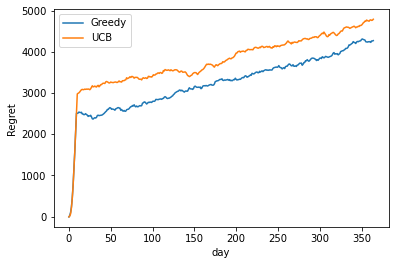

In [5]:
opt_per_round = test_instances[0][2].get_opt()
opt_per_day = opt_per_round * env_params['n_clicks']

#opt = [opt_per_day]*T

# Plotting the results
plt.figure()
plt.ylabel("Regret")
plt.xlabel("day")
plt.plot(np.cumsum(np.mean(opt_per_day - rewards_per_experiment['Greedy'], axis=0)))
plt.plot(np.cumsum(np.mean(opt_per_day - rewards_per_experiment['UCB'], axis=0)))
plt.legend(["Greedy", "UCB"])

In [6]:
opt_per_round * env_params['n_clicks']

659.7359999999999

In [7]:
env_params['n_clicks']

56